# Project-Group 2

In [3]:
import pandas as pd
import numpy as np
import urllib.request 
import urllib.parse
import urllib.error
import ssl
import re
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as BS
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="test")
import statistics

### For ignoring SSL certificate errors

In [2]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### Function takes url and returns the beautiful soup object

In [3]:
def house_doc(house_url):
    req = Request(house_url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    house_page_doc = BS(webpage,'html.parser')
    return house_page_doc

### Function takes mainurl and gives list of urls of all the pages 

In [4]:
def page_url(mainurl):
    mainurldoc = house_doc(mainurl)
    base_url = "https://www.redfin.com"
    url_list =[mainurl]
    for hrefs in mainurldoc.findAll("a",{"class":"clickable goToPage"}, href = True):
        next_page = base_url+hrefs['href']
        url_list.append(next_page)
    return url_list

In [5]:
mainurls =["https://www.redfin.com/city/6671/CA/Fremont/filter/property-type=house+condo,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/4561/CA/Cupertino/filter/property-type=house+condo,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/14325/CA/Palo-Alto/filter/property-type=house+condo,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/17675/CA/Santa-Clara/filter/property-type=house+condo,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/19457/CA/Sunnyvale/filter/property-type=house+condo,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/5159/CA/Dublin/filter/property-type=house+condo,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/8439/CA/Hayward/filter/property-type=house+condo,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/17420/CA/San-Jose/filter/property-type=house,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/17519/CA/San-Ramon/filter/property-type=house+condo,status=active+comingsoon+contingent+pending",
       "https://www.redfin.com/city/14986/CA/Pleasanton/filter/property-type=house+condo,status=active+comingsoon+contingent+pending"]
       

In [427]:
pageurls = []

In [11]:
#Mainurls along with all the page urls
for i in mainurls:
    pageurls = pageurls + page_url(i)
    time.sleep(5)
    print(i)
pageurls    

https://www.redfin.com/city/6671/CA/Fremont/filter/property-type=house+condo,status=active+comingsoon+contingent+pending
https://www.redfin.com/city/4561/CA/Cupertino/filter/property-type=house+condo,status=active+comingsoon+contingent+pending
https://www.redfin.com/city/14325/CA/Palo-Alto/filter/property-type=house+condo,status=active+comingsoon+contingent+pending
https://www.redfin.com/city/17675/CA/Santa-Clara/filter/property-type=house+condo,status=active+comingsoon+contingent+pending
https://www.redfin.com/city/19457/CA/Sunnyvale/filter/property-type=house+condo,status=active+comingsoon+contingent+pending
https://www.redfin.com/city/5159/CA/Dublin/filter/property-type=house+condo,status=active+comingsoon+contingent+pending
https://www.redfin.com/city/8439/CA/Hayward/filter/property-type=house+condo,status=active+comingsoon+contingent+pending
https://www.redfin.com/city/17420/CA/San-Jose/filter/property-type=house,status=active+comingsoon+contingent+pending
https://www.redfin.com/c

['https://www.redfin.com/city/6671/CA/Fremont/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/6671/CA/Fremont/page-2',
 'https://www.redfin.com/city/6671/CA/Fremont/page-3',
 'https://www.redfin.com/city/6671/CA/Fremont/page-4',
 'https://www.redfin.com/city/6671/CA/Fremont/page-5',
 'https://www.redfin.com/city/6671/CA/Fremont/page-6',
 'https://www.redfin.com/city/6671/CA/Fremont/page-7',
 'https://www.redfin.com/city/6671/CA/Fremont/page-8',
 'https://www.redfin.com/city/6671/CA/Fremont/page-9',
 'https://www.redfin.com/city/4561/CA/Cupertino/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/4561/CA/Cupertino/page-2',
 'https://www.redfin.com/city/14325/CA/Palo-Alto/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/14325/CA/Palo-Alto/page-2',
 'https://www.redfin.com/city/14325/CA/Palo-Alto/page-3',
 'https

In [11]:
len(pageurls)

82

In [6]:
#Copying the result into pageurls object to avoid repeated runs
pageurls = ['https://www.redfin.com/city/6671/CA/Fremont/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/6671/CA/Fremont/page-2',
 'https://www.redfin.com/city/6671/CA/Fremont/page-3',
 'https://www.redfin.com/city/6671/CA/Fremont/page-4',
 'https://www.redfin.com/city/6671/CA/Fremont/page-5',
 'https://www.redfin.com/city/6671/CA/Fremont/page-6',
 'https://www.redfin.com/city/6671/CA/Fremont/page-7',
 'https://www.redfin.com/city/6671/CA/Fremont/page-8',
 'https://www.redfin.com/city/6671/CA/Fremont/page-9',
 'https://www.redfin.com/city/4561/CA/Cupertino/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/4561/CA/Cupertino/page-2',
 'https://www.redfin.com/city/14325/CA/Palo-Alto/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/14325/CA/Palo-Alto/page-2',
 'https://www.redfin.com/city/14325/CA/Palo-Alto/page-3',
 'https://www.redfin.com/city/17675/CA/Santa-Clara/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/17675/CA/Santa-Clara/page-2',
 'https://www.redfin.com/city/17675/CA/Santa-Clara/page-3',
 'https://www.redfin.com/city/17675/CA/Santa-Clara/page-4',
 'https://www.redfin.com/city/17675/CA/Santa-Clara/page-5',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/page-2',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/page-3',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/page-4',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/page-5',
 'https://www.redfin.com/city/5159/CA/Dublin/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/8439/CA/Hayward/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/8439/CA/Hayward/page-2',
 'https://www.redfin.com/city/8439/CA/Hayward/page-3',
 'https://www.redfin.com/city/17420/CA/San-Jose/filter/property-type=house,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-2',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-3',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-4',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-5',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-6',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-7',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-8',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-9',
 'https://www.redfin.com/city/17519/CA/San-Ramon/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/17519/CA/San-Ramon/page-2',
 'https://www.redfin.com/city/17519/CA/San-Ramon/page-3',
 'https://www.redfin.com/city/14986/CA/Pleasanton/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/14986/CA/Pleasanton/page-2',
 'https://www.redfin.com/city/6671/CA/Fremont/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/6671/CA/Fremont/page-2',
 'https://www.redfin.com/city/6671/CA/Fremont/page-3',
 'https://www.redfin.com/city/6671/CA/Fremont/page-4',
 'https://www.redfin.com/city/4561/CA/Cupertino/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/4561/CA/Cupertino/page-2',
 'https://www.redfin.com/city/6671/CA/Fremont/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/6671/CA/Fremont/page-2',
 'https://www.redfin.com/city/6671/CA/Fremont/page-3',
 'https://www.redfin.com/city/6671/CA/Fremont/page-4',
 'https://www.redfin.com/city/4561/CA/Cupertino/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/4561/CA/Cupertino/page-2',
 'https://www.redfin.com/city/14325/CA/Palo-Alto/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/14325/CA/Palo-Alto/page-2',
 'https://www.redfin.com/city/17675/CA/Santa-Clara/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/17675/CA/Santa-Clara/page-2',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/page-2',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/page-3',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/page-4',
 'https://www.redfin.com/city/19457/CA/Sunnyvale/page-5',
 'https://www.redfin.com/city/5159/CA/Dublin/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/8439/CA/Hayward/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/8439/CA/Hayward/page-2',
 'https://www.redfin.com/city/8439/CA/Hayward/page-3',
 'https://www.redfin.com/city/8439/CA/Hayward/page-4',
 'https://www.redfin.com/city/8439/CA/Hayward/page-5',
 'https://www.redfin.com/city/8439/CA/Hayward/page-6',
 'https://www.redfin.com/city/17420/CA/San-Jose/filter/property-type=house,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-2',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-3',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-4',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-5',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-6',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-7',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-8',
 'https://www.redfin.com/city/17420/CA/San-Jose/page-9',
 'https://www.redfin.com/city/17519/CA/San-Ramon/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/14986/CA/Pleasanton/filter/property-type=house+condo,status=active+comingsoon+contingent+pending',
 'https://www.redfin.com/city/14986/CA/Pleasanton/page-2']

In [7]:
#Mainurls along with all the page urls
len(pageurls) 

82

### Function takes list of url list of pageurls (main url and page urls) and returns a list of urls of each house property

In [8]:
def price_address_url(url_list):
    house_urls =[]
    for urls in url_list:
        doc = house_doc(urls)
        url_list = doc.find_all('div', {'class':'bottomV2'})
        for divs in url_list:
            house_urls.append('https://www.redfin.com/'+divs.a["href"])
    return house_urls
   

In [14]:
property_url_list = price_address_url(pageurls)
property_url_list

['https://www.redfin.com//CA/Fremont/40519-Blacow-Rd-94538/home/1953063',
 'https://www.redfin.com//CA/Fremont/39951-Fremont-Blvd-94538/unit-325/home/1511710',
 'https://www.redfin.com//CA/Fremont/40219-Laiolo-Rd-94538/home/1109299',
 'https://www.redfin.com//CA/Fremont/5428-Twilight-Cmn-94555/home/1433676',
 'https://www.redfin.com//CA/Newark/39975-Cedar-Blvd-94560/unit-143/home/1158407',
 'https://www.redfin.com//CA/Fremont/43402-Lindenwood-St-94538/home/1054002',
 'https://www.redfin.com//CA/Fremont/77-Shaniko-Cmn-94539/unit-20/home/1014737',
 'https://www.redfin.com//CA/Fremont/2358-Velocity-CMN-94539/unit-306/home/166904282',
 'https://www.redfin.com//CA/Fremont/4634-Sloat-Rd-94538/home/2023466',
 'https://www.redfin.com//CA/Fremont/5416-Cleveland-Pl-94538/home/1771968',
 'https://www.redfin.com//CA/Fremont/1616-Sioux-Dr-94539/home/654837',
 'https://www.redfin.com//CA/Fremont/3651-Knollwood-Ter-94536/unit-112/home/1921696',
 'https://www.redfin.com//CA/Fremont/60-Aventura-Cmn-945

#### writing the urls of all the properties of all the cities in 'property_url_list' file

In [17]:
with open("D:\BAN 612\Project\PRoject jupyter files\property_url_list.txt", "w") as output:
    output.write(str(property_url_list))

#### Saving the property urls in 'property_url_list' object to use these urls repeatedly without scraping them again

In [9]:
property_url_list = ['https://www.redfin.com//CA/Fremont/40519-Blacow-Rd-94538/home/1953063', 'https://www.redfin.com//CA/Fremont/39951-Fremont-Blvd-94538/unit-325/home/1511710', 'https://www.redfin.com//CA/Fremont/40219-Laiolo-Rd-94538/home/1109299', 'https://www.redfin.com//CA/Fremont/5428-Twilight-Cmn-94555/home/1433676', 'https://www.redfin.com//CA/Newark/39975-Cedar-Blvd-94560/unit-143/home/1158407', 'https://www.redfin.com//CA/Fremont/43402-Lindenwood-St-94538/home/1054002', 'https://www.redfin.com//CA/Fremont/77-Shaniko-Cmn-94539/unit-20/home/1014737', 'https://www.redfin.com//CA/Fremont/2358-Velocity-CMN-94539/unit-306/home/166904282', 'https://www.redfin.com//CA/Fremont/4634-Sloat-Rd-94538/home/2023466', 'https://www.redfin.com//CA/Fremont/5416-Cleveland-Pl-94538/home/1771968', 'https://www.redfin.com//CA/Fremont/1616-Sioux-Dr-94539/home/654837', 'https://www.redfin.com//CA/Fremont/3651-Knollwood-Ter-94536/unit-112/home/1921696', 'https://www.redfin.com//CA/Fremont/60-Aventura-Cmn-94536/home/179273151', 'https://www.redfin.com//CA/Union-City/2772-Meadowlark-Dr-94587/home/1025455', 'https://www.redfin.com//CA/Fremont/4696-Amiens-Ave-94555/home/2010870', 'https://www.redfin.com//CA/Newark/35013-Dorchester-Ct-94560/home/951826', 'https://www.redfin.com//CA/Fremont/4706-Jaques-Ct-94555/home/1144489', 'https://www.redfin.com//CA/Fremont/4747-Cortez-Ave-94536/home/1990316', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-106-B4/home/179261781', 'https://www.redfin.com//CA/Fremont/442-D-St-94536/home/1474743', 'https://www.redfin.com//CA/Newark/6372-Buena-Vista-Dr-94560/unit-B/home/1927973', 'https://www.redfin.com//CA/Fremont/4449-Cherrywood-Ave-94538/home/1113660', 'https://www.redfin.com//CA/Fremont/38620-Canyon-Heights-Dr-94536/home/1470853', 'https://www.redfin.com//CA/Fremont/47465-Mantis-St-94539/home/1089971', 'https://www.redfin.com//CA/Fremont/3658-Capitol-Ave-94538/unit-402A/home/168824273', 'https://www.redfin.com//CA/Newark/36288-Saxon-Ct-94560/home/860305', 'https://www.redfin.com//CA/Fremont/3648-Birchwood-Ter-94536/unit-113/home/1214153', 'https://www.redfin.com//CA/Fremont/3580-Birchwood-Ter-94536/unit-206/home/1558678', 'https://www.redfin.com//CA/Fremont/3897-Jersey-Rd-94538/home/1513188', 'https://www.redfin.com//CA/Fremont/2633-Forrest-Ct-94536/home/1636220', 'https://www.redfin.com//CA/Fremont/34643-Musk-Ter-94555/home/1143770', 'https://www.redfin.com//CA/Fremont/2585-Cabot-Ct-94536/home/1061704', 'https://www.redfin.com//CA/Fremont/3754-Ferry-Ln-94555/home/1817726', 'https://www.redfin.com//CA/Fremont/63-Blaisdell-Way-94536/home/1926695', 'https://www.redfin.com//CA/Fremont/45188-Tom-Blalock-St-94539/unit-211/home/168828161', 'https://www.redfin.com//CA/Fremont/430-Panorama-Ct-94539/home/1216566', 'https://www.redfin.com//CA/Fremont/43437-Lindenwood-St-94538/home/1432472', 'https://www.redfin.com//CA/Newark/38130-Luma-Ter-94560/home/95473971', 'https://www.redfin.com//CA/Fremont/1935-Castillejo-Way-94539/home/95474035', 'https://www.redfin.com//CA/Fremont/49076-Larkspur-Ter-94539/home/2112535', 'https://www.redfin.com//CA/Fremont/2585-Cabot-Ct-94536/home/1061704', 'https://www.redfin.com//CA/Fremont/37908-Bright-Cmn-94536/home/1061903', 'https://www.redfin.com//CA/Fremont/3754-Ferry-Ln-94555/home/1817726', 'https://www.redfin.com//CA/Fremont/63-Blaisdell-Way-94536/home/1926695', 'https://www.redfin.com//CA/Fremont/45188-Tom-Blalock-St-94539/unit-211/home/168828161', 'https://www.redfin.com//CA/Fremont/430-Panorama-Ct-94539/home/1216566', 'https://www.redfin.com//CA/Fremont/43437-Lindenwood-St-94538/home/1432472', 'https://www.redfin.com//CA/Fremont/44819-S-Grimmer-Blvd-94538/unit-1005/home/179246354', 'https://www.redfin.com//CA/Fremont/39142-Declaration-St-94538/home/168824215', 'https://www.redfin.com//CA/Newark/38130-Luma-Ter-94560/home/95473971', 'https://www.redfin.com//CA/Fremont/1935-Castillejo-Way-94539/home/95474035', 'https://www.redfin.com//CA/Fremont/38627-Cherry-Ln-94536/unit-8/home/1814542', 'https://www.redfin.com//CA/Fremont/49076-Larkspur-Ter-94539/home/2112535', 'https://www.redfin.com//CA/Fremont/34192-Finnigan-Ter-94555/home/2010137', 'https://www.redfin.com//CA/Fremont/5634-Impatiens-Cmn-94538/home/742690', 'https://www.redfin.com//CA/Fremont/521-Emerson-St-94539/home/1666368', 'https://www.redfin.com//CA/Newark/5527-Azalea-Way-94560/home/143115530', 'https://www.redfin.com//CA/Fremont/35228-Erving-Ct-94536/home/1115167', 'https://www.redfin.com//CA/Fremont/38612-Country-Ter-94536/home/28442262', 'https://www.redfin.com//CA/Fremont/4789-Calaveras-Ave-94538/home/2021008', 'https://www.redfin.com//CA/Fremont/1150-Bennett-Ct-94536/home/897828', 'https://www.redfin.com//CA/Fremont/2045-Castillejo-Way-94539/home/1712303', 'https://www.redfin.com//CA/Fremont/38053-Davy-Ct-94536/home/938989', 'https://www.redfin.com//CA/Fremont/3748-Fulmar-Ter-94555/home/1149405', 'https://www.redfin.com//CA/Fremont/40326-Blacow-Rd-94538/home/1109722', 'https://www.redfin.com//CA/Fremont/4059-Lorenzo-Ter-94536/home/1582476', 'https://www.redfin.com//CA/Fremont/3280-Neal-Ter-94538/home/1105960', 'https://www.redfin.com//CA/Fremont/48252-Cottonwood-St-94539/home/1088807', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-304-B4/home/179177386', 'https://www.redfin.com//CA/Fremont/38372-Redwood-Ter-94536/unit-23/home/1887324', 'https://www.redfin.com//CA/Fremont/3237-Lake-Arrowhead-Ave-94555/home/1722455', 'https://www.redfin.com//CA/Fremont/44434-Camellia-Dr-94539/home/1900642', 'https://www.redfin.com//CA/Fremont/34378-Torrington-Ct-94555/home/1960119', 'https://www.redfin.com//CA/Newark/5632-Pandorea-Ter-94560/home/143117456', 'https://www.redfin.com//CA/Fremont/45138-Challenge-Cmn-94538/unit-1001/home/175930843', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-49/home/1397389', 'https://www.redfin.com//CA/Fremont/5278-Keystone-Dr-94536/home/1986301', 'https://www.redfin.com//CA/Fremont/38507-Overacker-Ave-94536/home/2009598', 'https://www.redfin.com//CA/Fremont/344-Goleta-Ter-94536/home/799873', 'https://www.redfin.com//CA/Fremont/47262-Mission-Falls-Ct-94539/home/178764593', 'https://www.redfin.com//CA/Fremont/38321-Timpanogas-Cir-94536/home/22713384', 'https://www.redfin.com//CA/Fremont/38630-Country-Cmn-94536/unit-311/home/1335305', 'https://www.redfin.com//CA/Fremont/230-Barton-Dr-94536/home/1990604', 'https://www.redfin.com//CA/Fremont/5235-Earle-St-94536/home/1301546', 'https://www.redfin.com//CA/Fremont/36509-Cabrillo-Dr-94536/home/1769862', 'https://www.redfin.com//CA/Fremont/32728-Shaver-Lake-St-94555/home/1132749', 'https://www.redfin.com//CA/Fremont/42102-Cam-Santa-Barbara-94539/home/1085321', 'https://www.redfin.com//CA/Fremont/34910-Sea-Cliff-Ter-94555/home/1540351', 'https://www.redfin.com//CA/Fremont/47282-Mission-Falls-Ct-94539/home/179138819', 'https://www.redfin.com//CA/Fremont/47292-Mission-Falls-Ct-94539/home/179138815', 'https://www.redfin.com//CA/Fremont/47312-Mission-Falls-Ct-94539/home/179138816', 'https://www.redfin.com//CA/Fremont/47302-Mission-Falls-Ct-94539/home/179138817', 'https://www.redfin.com//CA/Fremont/4435-Kennett-Ter-94536/home/112886472', 'https://www.redfin.com//CA/Fremont/5585-Beau-Ct-94538/home/1603007', 'https://www.redfin.com//CA/Fremont/3768-Capitol-Ave-94538/unit-518B/home/168824362', 'https://www.redfin.com//CA/Fremont/1460-Gilbert-Ave-94536/home/2034857', 'https://www.redfin.com//CA/Fremont/41260-Norman-Ct-94539/home/1792143', 'https://www.redfin.com//CA/Fremont/900-Hunter-Ln-94539/home/1324861', 'https://www.redfin.com//CA/Fremont/39224-Guardino-Dr-94538/unit-218/home/1233551', 'https://www.redfin.com//CA/Fremont/3445-Little-Ct-94538/home/1586595', 'https://www.redfin.com//CA/Fremont/5338-Sayre-Ave-94536/home/1058193', 'https://www.redfin.com//CA/Fremont/3800-Adams-Ave-94538/home/704456', 'https://www.redfin.com//CA/Fremont/37373-Sequoia-Rd-94536/home/12117639', 'https://www.redfin.com//CA/Fremont/38280-Corrigan-Ct-94536/home/527183', 'https://www.redfin.com//CA/Fremont/4226-Nerissa-Cir-94555/home/1109542', 'https://www.redfin.com//CA/Fremont/4141-Deep-Creek-Rd-94555/unit-145/home/1153572', 'https://www.redfin.com//CA/Fremont/45083-Cougar-Cir-94539/home/1559513', 'https://www.redfin.com//CA/Fremont/48867-Sauvignon-Ct-94539/home/1959642', 'https://www.redfin.com//CA/Fremont/289-Winnipeg-Ter-94538/unit-289/home/63744779', 'https://www.redfin.com//CA/Fremont/752-Topawa-Dr-94539/home/1263780', 'https://www.redfin.com//CA/Fremont/357-Paso-Roble-Cmn-94539/home/40627336', 'https://www.redfin.com//CA/Fremont/311-Sandstone-Dr-94536/home/1492571', 'https://www.redfin.com//CA/Fremont/34671-Agree-Ter-94555/unit-73/home/1355165', 'https://www.redfin.com//CA/Fremont/46885-Fernald-Cmn-94539/unit-46/home/1650559', 'https://www.redfin.com//CA/Fremont/45347-Lumen-Ter-94539/home/178993931', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/home/177943120', 'https://www.redfin.com//CA/Fremont/45318-Silhouette-Cmn-94539/unit-101-F1/home/178974349', 'https://www.redfin.com//CA/Fremont/1908-Reflection-Cmn-94539/unit-101-F3/home/178974115', 'https://www.redfin.com//CA/Fremont/45128-Warm-Springs-Blvd-94539/unit-406/home/168827911', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-307-B4/home/178960638', 'https://www.redfin.com//CA/Fremont/45249-Electric-Ter-94539/unit-101/home/168828105', 'https://www.redfin.com//CA/Fremont/2632-Middlefield-Ave-94539/home/1108109', 'https://www.redfin.com//CA/Fremont/37965-Stenhammer-Dr-94536/home/1260309', 'https://www.redfin.com//CA/Fremont/44873-Camellia-Dr-94539/home/883190', 'https://www.redfin.com//CA/Fremont/38739-Aurora-Ter-94536/unit-16/home/1858362', 'https://www.redfin.com//CA/Fremont/35879-Adobe-Dr-94536/home/1793925', 'https://www.redfin.com//CA/Fremont/47252-Mission-Falls-Ct-94539/home/178764595', 'https://www.redfin.com//CA/Fremont/4434-Kennett-Ter-94536/home/112886447', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-58/home/1921911', 'https://www.redfin.com//CA/Fremont/4767-Mendocino-Ter-94555/home/1603468', 'https://www.redfin.com//CA/Fremont/4117-Argyle-Ct-94536/unit-A/home/740249', 'https://www.redfin.com//CA/Fremont/661-Monticello-Ter-94539/home/1080643', 'https://www.redfin.com//CA/Fremont/3207-Washington-Blvd-94539/home/1377816', 'https://www.redfin.com//CA/Fremont/38539-Mission-Blvd-94536/home/1074436', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-209-B4/home/178601459', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-206-B4/home/178553372', 'https://www.redfin.com//CA/Fremont/28-Eagle-Grn-94538/home/57180338', 'https://www.redfin.com//CA/Fremont/240-Manitoba-Grn-94538/unit-240/home/178529656', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-56/home/126930350', 'https://www.redfin.com//CA/Fremont/202-Mission-Falls-Ln-94539/home/178482826', 'https://www.redfin.com//CA/Fremont/44936-Winding-Ln-94539/home/957815', 'https://www.redfin.com//CA/Union-City/489-Seema-Cir-94587/unit-489/home/39988743', 'https://www.redfin.com//CA/Fremont/3509-Pepperwood-Ter-94536/unit-206/home/1182011', 'https://www.redfin.com//CA/Fremont/3998-Fossano-Cmn-94538/home/143117736', 'https://www.redfin.com//CA/Newark/36614-Charles-St-94560/home/1612792', 'https://www.redfin.com//CA/Fremont/253-Corte-San-Pablo-94539/home/1977683', 'https://www.redfin.com//CA/Fremont/42410-Paseo-Padre-Pkwy-94539/home/1353712', 'https://www.redfin.com//CA/Fremont/772-Sunrise-Dr-94539/home/1721628', 'https://www.redfin.com//CA/Fremont/35578-Rockland-Ct-94536/home/1959310', 'https://www.redfin.com//CA/Fremont/39109-Guardino-Dr-94538/unit-335/home/2006755', 'https://www.redfin.com//CA/Fremont/4940-Everglades-Park-Dr-94538/home/2035134', 'https://www.redfin.com//CA/Fremont/5963-Via-Lugano-94555/home/17185478', 'https://www.redfin.com//CA/Fremont/3303-Owen-Cmn-94536/home/2039128', 'https://www.redfin.com//CA/Newark/5720-Oceanspray-Rd-94560/home/112885676', 'https://www.redfin.com//CA/Fremont/33308-Jamie-Cir-94555/home/1670311', 'https://www.redfin.com//CA/Fremont/42589-Fern-Cir-94538/home/1796637', 'https://www.redfin.com//CA/Fremont/3312-Trafalgar-Rd-94555/home/1817691', 'https://www.redfin.com//CA/Fremont/486-Niles-Cmn-94536/home/22656722', 'https://www.redfin.com//CA/Fremont/37860-Blacow-Rd-94536/home/1052934', 'https://www.redfin.com//CA/Fremont/5124-Eggers-Dr-94536/home/1432580', 'https://www.redfin.com//CA/Fremont/26-Essanay-Ave-94536/unit-8/home/1665659', 'https://www.redfin.com//CA/Newark/37924-Luma-Ter-94560/home/112885845', 'https://www.redfin.com//CA/Fremont/47232-Mission-Falls-Ct-94539/home/178764591', 'https://www.redfin.com//CA/Fremont/3467-Pennsylvania-Cmn-94536/unit-16A/home/545192', 'https://www.redfin.com//CA/Fremont/3975-Lake-Tahoe-Ter-94555/home/589272', 'https://www.redfin.com//CA/Fremont/4960-Friar-Ave-94555/home/646077', 'https://www.redfin.com//CA/Union-City/4920-Bridgepointe-Pl-94587/unit-41/home/768668', 'https://www.redfin.com//CA/Fremont/77-King-Ave-94536/home/882739', 'https://www.redfin.com//CA/Fremont/42638-Jefferson-St-94538/home/993587', 'https://www.redfin.com//CA/Fremont/4133-Mattos-Dr-94536/home/1053644', 'https://www.redfin.com//CA/Fremont/42980-Noria-Rd-94539/home/1082784', 'https://www.redfin.com//CA/Fremont/3333-Hogarth-Pl-94555/home/1134684', 'https://www.redfin.com//CA/Fremont/39059-Guardino-Dr-94538/unit-104/home/1415203', 'https://www.redfin.com//CA/Fremont/5116-Trade-Wind-Ln-94538/home/1560081', 'https://www.redfin.com//CA/Fremont/41265-Malcolmson-St-94538/home/1586607', 'https://www.redfin.com//CA/Fremont/39029-Guardino-Dr-94538/unit-224/home/1755078', 'https://www.redfin.com//CA/Fremont/4141-Sora-Cmn-94555/home/1757629', 'https://www.redfin.com//CA/Fremont/3548-Hart-Cmn-94538/home/1868995', 'https://www.redfin.com//CA/Fremont/188-Hackamore-Cmn-94539/unit-72/home/1952816', 'https://www.redfin.com//CA/Fremont/4318-Castanos-St-94536/home/1978408', 'https://www.redfin.com//CA/Fremont/40425-Chapel-Way-94538/unit-311/home/2020928', 'https://www.redfin.com//CA/Fremont/5341-Rancho-Del-Sur-Dr-94555/home/95474239', 'https://www.redfin.com//CA/Newark/37986-Luma-Ter-94560/home/108578023', 'https://www.redfin.com//CA/Fremont/3875-Parasol-Cmn-94555/home/143117762', 'https://www.redfin.com//CA/Fremont/3300-Howard-Cmn-94536/home/605050', 'https://www.redfin.com//CA/Fremont/38050-Edward-Ave-94536/home/653798', 'https://www.redfin.com//CA/Fremont/4645-Pardee-Ave-94538/home/721567', 'https://www.redfin.com//CA/Fremont/44153-Boitano-Dr-94539/home/761026', 'https://www.redfin.com//CA/Fremont/4160-Lark-Ct-94555/home/802038', 'https://www.redfin.com//CA/Fremont/38380-Fitzgerald-Cir-94536/home/1059564', 'https://www.redfin.com//CA/Fremont/37832-Bright-Cmn-94536/home/1060861', 'https://www.redfin.com//CA/Fremont/38566-Royal-Ann-Cmn-94536/home/1070597', 'https://www.redfin.com//CA/Fremont/43645-Hopkins-Ave-94538/home/1117172', 'https://www.redfin.com//CA/Fremont/5473-Borgia-Rd-94538/home/1126579', 'https://www.redfin.com//CA/Fremont/4352-Ladner-St-94538/home/1240148', 'https://www.redfin.com//CA/Fremont/1915-Lockwood-Ave-94539/home/1266555', 'https://www.redfin.com//CA/Fremont/989-Yucatan-Ct-94539/home/1351540', 'https://www.redfin.com//CA/Fremont/40825-Ingersoll-Ter-94538/home/1454286', 'https://www.redfin.com//CA/Fremont/5239-Colonial-Park-Ct-94538/home/1475748', 'https://www.redfin.com//CA/Union-City/4132-Venus-Pl-94587/home/1552485', 'https://www.redfin.com//CA/Fremont/40519-Blacow-Rd-94538/home/1953063', 'https://www.redfin.com//CA/Fremont/39951-Fremont-Blvd-94538/unit-325/home/1511710', 'https://www.redfin.com//CA/Fremont/37409-Ortega-Cmn-94536/home/168824163', 'https://www.redfin.com//CA/Fremont/40219-Laiolo-Rd-94538/home/1109299', 'https://www.redfin.com//CA/Fremont/5428-Twilight-Cmn-94555/home/1433676', 'https://www.redfin.com//CA/Newark/39975-Cedar-Blvd-94560/unit-143/home/1158407', 'https://www.redfin.com//CA/Fremont/36910-Bolina-Ter-94536/home/1350261', 'https://www.redfin.com//CA/Fremont/43402-Lindenwood-St-94538/home/1054002', 'https://www.redfin.com//CA/Fremont/77-Shaniko-Cmn-94539/unit-20/home/1014737', 'https://www.redfin.com//CA/Fremont/2820-Casita-Ter-94539/home/107472505', 'https://www.redfin.com//CA/Fremont/2358-Velocity-CMN-94539/unit-306/home/166904282', 'https://www.redfin.com//CA/Fremont/4634-Sloat-Rd-94538/home/2023466', 'https://www.redfin.com//CA/Fremont/3697-Access-CMN-94538/home/179289635', 'https://www.redfin.com//CA/Fremont/5416-Cleveland-Pl-94538/home/1771968', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-35/home/1077904', 'https://www.redfin.com//CA/Fremont/1616-Sioux-Dr-94539/home/654837', 'https://www.redfin.com//CA/Fremont/3651-Knollwood-Ter-94536/unit-112/home/1921696', 'https://www.redfin.com//CA/Fremont/60-Aventura-Cmn-94536/home/179273151', 'https://www.redfin.com//CA/Union-City/2772-Meadowlark-Dr-94587/home/1025455', 'https://www.redfin.com//CA/Fremont/4696-Amiens-Ave-94555/home/2010870', 'https://www.redfin.com//CA/Newark/35013-Dorchester-Ct-94560/home/951826', 'https://www.redfin.com//CA/Newark/37822-Taro-Ter-94560/home/108460008', 'https://www.redfin.com//CA/Fremont/4706-Jaques-Ct-94555/home/1144489', 'https://www.redfin.com//CA/Fremont/4747-Cortez-Ave-94536/home/1990316', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-106-B4/home/179261781', 'https://www.redfin.com//CA/Fremont/442-D-St-94536/home/1474743', 'https://www.redfin.com//CA/Fremont/1346-Ocaso-Camino-94539/home/1324748', 'https://www.redfin.com//CA/Newark/6372-Buena-Vista-Dr-94560/unit-B/home/1927973', 'https://www.redfin.com//CA/Fremont/4449-Cherrywood-Ave-94538/home/1113660', 'https://www.redfin.com//CA/Fremont/38620-Canyon-Heights-Dr-94536/home/1470853', 'https://www.redfin.com//CA/Fremont/47465-Mantis-St-94539/home/1089971', 'https://www.redfin.com//CA/Fremont/3658-Capitol-Ave-94538/unit-402A/home/168824273', 'https://www.redfin.com//CA/Newark/36288-Saxon-Ct-94560/home/860305', 'https://www.redfin.com//CA/Fremont/3648-Birchwood-Ter-94536/unit-113/home/1214153', 'https://www.redfin.com//CA/Fremont/3580-Birchwood-Ter-94536/unit-206/home/1558678', 'https://www.redfin.com//CA/Fremont/43220-Giovanni-Ter-94539/home/12115760', 'https://www.redfin.com//CA/Fremont/3897-Jersey-Rd-94538/home/1513188', 'https://www.redfin.com//CA/Fremont/2633-Forrest-Ct-94536/home/1636220', 'https://www.redfin.com//CA/Fremont/37972-Bright-Cmn-94536/home/1992490', 'https://www.redfin.com//CA/Fremont/34643-Musk-Ter-94555/home/1143770', 'https://www.redfin.com//CA/Fremont/47272-Mission-Falls-Ct-94539/home/179138818', 'https://www.redfin.com//CA/Fremont/265-Mortimer-Ave-94536/home/605357', 'https://www.redfin.com//CA/Union-City/2530-Begonia-St-94587/home/754091', 'https://www.redfin.com//CA/Fremont/490-Calistoga-Cir-94536/home/1077052', 'https://www.redfin.com//CA/Fremont/41140-Kathlean-St-94538/home/1113436', 'https://www.redfin.com//CA/Fremont/4846-Pardee-Ave-94538/home/1122550', 'https://www.redfin.com//CA/Fremont/42431-Grand-Teton-Park-St-94538/home/1183462', 'https://www.redfin.com//CA/Fremont/451-Rancho-Arroyo-Pkwy-94536/home/1239130', 'https://www.redfin.com//CA/Fremont/5090-Yellowstone-Park-Dr-94538/home/1519540', 'https://www.redfin.com//CA/Fremont/980-Joshua-Pl-94539/home/1599483', 'https://www.redfin.com//CA/Fremont/33601-Bardolph-Cir-94555/home/1698623', 'https://www.redfin.com//CA/Fremont/4523-Lodovico-Ct-94555/home/1754442', 'https://www.redfin.com//CA/Newark/39945-Parada-St-94560/unit-B/home/1772833', 'https://www.redfin.com//CA/Fremont/40472-Seville-Ct-94539/home/1878853', 'https://www.redfin.com//CA/Fremont/38400-Garway-Dr-94536/home/1958853', 'https://www.redfin.com//CA/Fremont/4263-Corrigan-Dr-94536/home/2023443', 'https://www.redfin.com//CA/Fremont/2826-Benchmark-Ave-94536/home/2023607', 'https://www.redfin.com//CA/Fremont/39029-Guardino-Dr-94538/unit-119/home/2038840', 'https://www.redfin.com//CA/Fremont/46908-Shale-Cmn-94539/unit-CM/home/126662558', 'https://www.redfin.com//CA/Fremont/45058-Fremont-Blvd-94538/unit-402/home/168827570', 'https://www.redfin.com//CA/Fremont/45128-Warm-Springs-Blvd-94539/unit-500/home/168827924', 'https://www.redfin.com//CA/Fremont/212-Mission-Falls-Ln-94539/home/178482799', 'https://www.redfin.com//CA/Fremont/4141-Deep-Creek-Rd-94555/unit-196/home/179000177', 'https://www.redfin.com//CA/Fremont/38027-Dundee-Cmn-94536/home/1062770', 'https://www.redfin.com//CA/Fremont/225-St-Henry-Dr-94539/home/1102280', 'https://www.redfin.com//CA/Fremont/230-D-St-94536/home/1107660', 'https://www.redfin.com//CA/Fremont/5657-Tilden-Pl-94538/home/1121662', 'https://www.redfin.com//CA/Fremont/35069-Sofia-Ct-94536/home/1134156', 'https://www.redfin.com//CA/Fremont/38016-Inez-Ave-94536/home/1211111', 'https://www.redfin.com//CA/Fremont/673-Orangewood-Dr-94536/home/1404300', 'https://www.redfin.com//CA/Fremont/47431-Cholla-St-94539/home/1598501', 'https://www.redfin.com//CA/Fremont/169-Linmore-Dr-94539/home/1602355', 'https://www.redfin.com//CA/Fremont/5401-Buckner-Ter-94555/home/1899347', 'https://www.redfin.com//CA/Fremont/34546-Pueblo-Ter-94555/unit-2/home/1982203', 'https://www.redfin.com//CA/Fremont/34141-Asti-Ter-94555/home/17184662', 'https://www.redfin.com//CA/Fremont/39191-Argonaut-Way-94538/unit-214/home/123085877', 'https://www.redfin.com//CA/Fremont/45049-Challenge-Cmn-94539/unit-201/home/168827578', 'https://www.redfin.com//CA/Fremont/45318-Silhouette-Cmn-94539/unit-302-F1/home/178690116', 'https://www.redfin.com//CA/Union-City/4870-Mendota-St-94587/home/1240724', 'https://www.redfin.com//CA/Fremont/37047-Contra-Costa-Ave-94536/home/1316750', 'https://www.redfin.com//CA/Fremont/40519-Blacow-Rd-94538/home/1953063', 'https://www.redfin.com//CA/Fremont/39951-Fremont-Blvd-94538/unit-325/home/1511710', 'https://www.redfin.com//CA/Fremont/37409-Ortega-Cmn-94536/home/168824163', 'https://www.redfin.com//CA/Fremont/40219-Laiolo-Rd-94538/home/1109299', 'https://www.redfin.com//CA/Fremont/5428-Twilight-Cmn-94555/home/1433676', 'https://www.redfin.com//CA/Newark/39975-Cedar-Blvd-94560/unit-143/home/1158407', 'https://www.redfin.com//CA/Fremont/36910-Bolina-Ter-94536/home/1350261', 'https://www.redfin.com//CA/Fremont/43402-Lindenwood-St-94538/home/1054002', 'https://www.redfin.com//CA/Fremont/77-Shaniko-Cmn-94539/unit-20/home/1014737', 'https://www.redfin.com//CA/Fremont/2820-Casita-Ter-94539/home/107472505', 'https://www.redfin.com//CA/Fremont/2358-Velocity-CMN-94539/unit-306/home/166904282', 'https://www.redfin.com//CA/Fremont/4634-Sloat-Rd-94538/home/2023466', 'https://www.redfin.com//CA/Fremont/3697-Access-CMN-94538/home/179289635', 'https://www.redfin.com//CA/Fremont/5416-Cleveland-Pl-94538/home/1771968', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-35/home/1077904', 'https://www.redfin.com//CA/Fremont/1616-Sioux-Dr-94539/home/654837', 'https://www.redfin.com//CA/Fremont/3651-Knollwood-Ter-94536/unit-112/home/1921696', 'https://www.redfin.com//CA/Fremont/60-Aventura-Cmn-94536/home/179273151', 'https://www.redfin.com//CA/Union-City/2772-Meadowlark-Dr-94587/home/1025455', 'https://www.redfin.com//CA/Fremont/4696-Amiens-Ave-94555/home/2010870', 'https://www.redfin.com//CA/Newark/35013-Dorchester-Ct-94560/home/951826', 'https://www.redfin.com//CA/Newark/37822-Taro-Ter-94560/home/108460008', 'https://www.redfin.com//CA/Fremont/4706-Jaques-Ct-94555/home/1144489', 'https://www.redfin.com//CA/Fremont/4747-Cortez-Ave-94536/home/1990316', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-106-B4/home/179261781', 'https://www.redfin.com//CA/Fremont/442-D-St-94536/home/1474743', 'https://www.redfin.com//CA/Fremont/1346-Ocaso-Camino-94539/home/1324748', 'https://www.redfin.com//CA/Newark/6372-Buena-Vista-Dr-94560/unit-B/home/1927973', 'https://www.redfin.com//CA/Fremont/4449-Cherrywood-Ave-94538/home/1113660', 'https://www.redfin.com//CA/Fremont/38620-Canyon-Heights-Dr-94536/home/1470853', 'https://www.redfin.com//CA/Fremont/47465-Mantis-St-94539/home/1089971', 'https://www.redfin.com//CA/Fremont/3658-Capitol-Ave-94538/unit-402A/home/168824273', 'https://www.redfin.com//CA/Newark/36288-Saxon-Ct-94560/home/860305', 'https://www.redfin.com//CA/Fremont/3648-Birchwood-Ter-94536/unit-113/home/1214153', 'https://www.redfin.com//CA/Fremont/3580-Birchwood-Ter-94536/unit-206/home/1558678', 'https://www.redfin.com//CA/Fremont/43220-Giovanni-Ter-94539/home/12115760', 'https://www.redfin.com//CA/Fremont/3897-Jersey-Rd-94538/home/1513188', 'https://www.redfin.com//CA/Fremont/2633-Forrest-Ct-94536/home/1636220', 'https://www.redfin.com//CA/Fremont/37972-Bright-Cmn-94536/home/1992490', 'https://www.redfin.com//CA/Fremont/34643-Musk-Ter-94555/home/1143770', 'https://www.redfin.com//CA/Fremont/45347-Lumen-Ter-94539/home/178993931', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/home/177943120', 'https://www.redfin.com//CA/Fremont/47560-Kinner-Falls-Cmn-94539/home/168827834', 'https://www.redfin.com//CA/Fremont/661-Monticello-Ter-94539/home/1080643', 'https://www.redfin.com//CA/Fremont/3207-Washington-Blvd-94539/home/1377816', 'https://www.redfin.com//CA/Fremont/38539-Mission-Blvd-94536/home/1074436', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-209-B4/home/178601459', 'https://www.redfin.com//CA/Fremont/41223-Roberts-Ave-94538/home/143117724', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-206-B4/home/178553372', 'https://www.redfin.com//CA/Fremont/28-Eagle-Grn-94538/home/57180338', 'https://www.redfin.com//CA/Fremont/240-Manitoba-Grn-94538/unit-240/home/178529656', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-56/home/126930350', 'https://www.redfin.com//CA/Fremont/202-Mission-Falls-Ln-94539/home/178482826', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-109-B4/home/178420556', 'https://www.redfin.com//CA/Fremont/37753-Niles-Blvd-94536/home/178276127', 'https://www.redfin.com//CA/Fremont/Victoria-Station-At-Metro-W-94538/unit-null/home/178647872', 'https://www.redfin.com//CA/Fremont/43674-Ellsworth-St-94539/unit-2/home/1697557', 'https://www.redfin.com//CA/Fremont/45651-Montclaire-Ter-94539/home/12113319', 'https://www.redfin.com//CA/FREMONT/MORRISON-CANYON-RD-94536/home/22700954', 'https://www.redfin.com//CA/Fremont/1981-Mandan-Ct-94539/home/22704791', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Sunderland/home/173429349', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Latimer-Elite/home/173429353', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Latimer/home/173429354', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Colchester/home/173429355', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Brixton/home/173429358', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Essex/home/174234719', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Clairemont/home/176071497', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Ashfield/home/176071498', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Tauton/home/178212395', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Kempton/home/178212396', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Hartwell/home/178212397', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Dartmoor/home/178212398', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Broadwell/home/178212399', 'https://www.redfin.com//CA/Fremont/Aventura-on-Mission/Plan-2/home/178311663', 'https://www.redfin.com//CA/Fremont/94-Delta-Grn-94538/unit-94/home/177663956', 'https://www.redfin.com//CA/Fremont/3312-Trafalgar-Rd-94555/home/1817691', 'https://www.redfin.com//CA/Fremont/47358-Grizzly-Falls-Cmn-94539/home/176858511', 'https://www.redfin.com//CA/Fremont/1838-Kilowatt-Way-94539/unit-302-F4/home/177915201', 'https://www.redfin.com//CA/Fremont/5059-Bronte-Ct-94538/home/1444229', 'https://www.redfin.com//CA/Fremont/47368-Grizzly-Falls-Cmn-94539/home/176858513', 'https://www.redfin.com//CA/Cupertino/21782-Lindy-Ln-95014/home/1579111', 'https://www.redfin.com//CA/San-Jose/6973-Chantel-Ct-95129/home/1740407', 'https://www.redfin.com//CA/Cupertino/10481-N-Stelling-Rd-95014/home/1752807', 'https://www.redfin.com//CA/Cupertino/10816-Linda-Vista-Dr-95014/home/1683912', 'https://www.redfin.com//CA/Cupertino/21426-Rumford-Dr-95014/home/774226', 'https://www.redfin.com//CA/Cupertino/19999-Stevens-Creek-Blvd-95014/unit-207/home/1547828', 'https://www.redfin.com//CA/Cupertino/10366-Heney-Creek-Pl-95014/home/861003', 'https://www.redfin.com//CA/Cupertino/7565-Tiptoe-Ln-95014/home/712562', 'https://www.redfin.com//CA/Cupertino/943-Brookgrove-Ln-95014/home/1065812', 'https://www.redfin.com//CA/CUPERTINO/22286-S-DE-ANZA-CIR-95014/home/781003', 'https://www.redfin.com//CA/Cupertino/10288-Richwood-Dr-95014/home/625344', 'https://www.redfin.com//CA/Cupertino/10583-Santa-Lucia-Rd-95014/home/176532539', 'https://www.redfin.com//CA/Cupertino/7503-Fallenleaf-Ln-95014/home/1097496', 'https://www.redfin.com//CA/Cupertino/20082-Forest-Ave-95014/home/763166', 'https://www.redfin.com//CA/Cupertino/10803-Northoak-Sq-95014/home/1486940', 'https://www.redfin.com//CA/Cupertino/10301-Stonydale-Dr-95014/home/774684', 'https://www.redfin.com//CA/Cupertino/22365-Regnart-Rd-95014/home/788161', 'https://www.redfin.com//CA/Cupertino/10270-Sterling-Blvd-95014/home/784829', 'https://www.redfin.com//CA/Cupertino/15681-Montebello-Rd-95014/home/11893969', 'https://www.redfin.com//CA/Los-Altos/915-St-Joseph-Ave-94024/home/1364924', 'https://www.redfin.com//CA/Cupertino/10395-Judy-Ave-95014/home/1294078', 'https://www.redfin.com//CA/Cupertino/21841-Alcazar-Ave-95014/home/1418086', 'https://www.redfin.com//CA/Cupertino/13360-Montebello-Rd-95014/home/551243', 'https://www.redfin.com//CA/Cupertino/10618-Gascoigne-Dr-95014/home/1214480', 'https://www.redfin.com//CA/Cupertino/10251-Nile-Dr-95014/home/789941', 'https://www.redfin.com//CA/Cupertino/17950-Stevens-Canyon-Rd-95014/home/786334', 'https://www.redfin.com//CA/Cupertino/11041-Stevens-Canyon-Rd-95014/home/12343865', 'https://www.redfin.com//CA/Sunnyvale/18771-4-Homestead-Rd-94087/home/174017849', 'https://www.redfin.com//CA/Cupertino/10530-Stokes-Ave-95014/home/776093', 'https://www.redfin.com//CA/Cupertino/13119-Montebello-Rd-95014/home/168878875', 'https://www.redfin.com//CA/Cupertino/6179-Shadygrove-Dr-95014/home/1550417', 'https://www.redfin.com//CA/San-Jose/1029-Miller-Ave-95129/home/793666', 'https://www.redfin.com//CA/Cupertino/20488-Stevens-Creek-Blvd-95014/unit-2201/home/1051667', 'https://www.redfin.com//CA/Cupertino/22248-Hammond-Way-95014/home/1503941', 'https://www.redfin.com//CA/Cupertino/10466-Byrne-Ave-95014/home/1025394', 'https://www.redfin.com//CA/Cupertino/7535-Kirwin-Ln-95014/home/1567366', 'https://www.redfin.com//CA/Cupertino/10425-Farallone-Dr-95014/home/1141371', 'https://www.redfin.com//CA/Cupertino/7974-Pumpkin-Dr-95014/home/785284', 'https://www.redfin.com//CA/Cupertino/10420-Oakville-Ave-95014/home/790544', 'https://www.redfin.com//CA/Cupertino/10640-Johansen-Dr-95014/home/796846', 'https://www.redfin.com//CA/Palo-Alto/55-Waverley-Oaks-94301/home/1338723', 'https://www.redfin.com//CA/Palo-Alto/1030-Paradise-Way-94306/home/1302363', 'https://www.redfin.com//CA/Palo-Alto/411-Stanford-Ave-94306/home/1082431', 'https://www.redfin.com//CA/Palo-Alto/2130-Bowdoin-St-94306/home/1005461', 'https://www.redfin.com//CA/Menlo-Park/108-Clover-Ln-94025/home/858661', 'https://www.redfin.com//CA/Palo-Alto/2261-St-Francis-Dr-94303/home/1171904', 'https://www.redfin.com//CA/Palo-Alto/931-Addison-Ave-94301/home/1004338', 'https://www.redfin.com//CA/Palo-Alto/295-W-Charleston-Rd-94306/home/2120697', 'https://www.redfin.com//CA/Palo-Alto/4250-El-Camino-Real-94306/unit-B217/home/1822627', 'https://www.redfin.com//CA/Palo-Alto/2380-Tasso-St-94301/home/592549', 'https://www.redfin.com//CA/Palo-Alto/1920-Bryant-St-94301/home/591373', 'https://www.redfin.com//CA/Los-Altos/3885-Page-Mill-Rd-94022/home/63844547', 'https://www.redfin.com//CA/Palo-Alto/1509-Edgewood-Dr-94303/home/542529', 'https://www.redfin.com//CA/Palo-Alto/4103-Middlefield-Rd-94303/home/593688', 'https://www.redfin.com//CA/Palo-Alto/1469-Dana-Ave-94301/home/853784', 'https://www.redfin.com//CA/Palo-Alto/2080-Channing-Ave-94303/home/80163166', 'https://www.redfin.com//CA/Palo-Alto/171-Everett-Ave-94301/home/1349323', 'https://www.redfin.com//CA/Palo-Alto/744-Guinda-St-94301/home/1343651', 'https://www.redfin.com//CA/Palo-Alto/3224-Emerson-St-94306/home/1470832', 'https://www.redfin.com//CA/Palo-Alto/1111-Alma-St-94301/home/1279432', 'https://www.redfin.com//CA/Palo-Alto/901-Hutchinson-Ave-94301/home/547385', 'https://www.redfin.com//CA/Palo-Alto/1427-Byron-St-94301/home/1465669', 'https://www.redfin.com//CA/Palo-Alto/770-Bryant-St-94301/home/590014', 'https://www.redfin.com//CA/Palo-Alto/101-Alma-St-94301/unit-204/home/1854009', 'https://www.redfin.com//CA/Menlo-Park/1909-Menalto-Ave-94025/home/172806074', 'https://www.redfin.com//CA/Palo-Alto/776-Rosewood-Dr-94303/home/779609', 'https://www.redfin.com//CA/Palo-Alto/2111-Barbara-Dr-94303/home/1650658', 'https://www.redfin.com//CA/Palo-Alto/4250-El-Camino-Real-94306/unit-A102/home/1749205', 'https://www.redfin.com//CA/Palo-Alto/3073-Middlefield-Rd-94306/unit-101/home/1136076', 'https://www.redfin.com//CA/Palo-Alto/685-High-St-94301/unit-5F/home/589719', 'https://www.redfin.com//CA/Palo-Alto/685-High-St-94301/unit-2C/home/688183', 'https://www.redfin.com//CA/Palo-Alto/280-Waverley-St-94301/home/588005', 'https://www.redfin.com//CA/Palo-Alto/274-Tennessee-Ln-94306/home/1466060', 'https://www.redfin.com//CA/Palo-Alto/1031-Embarcadero-Rd-94303/home/545253', 'https://www.redfin.com//CA/Palo-Alto/2388-Waverley-St-94301/home/911894', 'https://www.redfin.com//CA/Palo-Alto/606-Santa-Rita-Ave-94301/home/1665925', 'https://www.redfin.com//CA/Palo-Alto/919-Amarillo-Ave-94303/home/1056459', 'https://www.redfin.com//CA/Palo-Alto/2585-Park-Blvd-94306/unit-Z206/home/1103303', 'https://www.redfin.com//CA/Los-Altos/4388-El-Camino-Real-94022/unit-379/home/21672517', 'https://www.redfin.com//CA/Palo-Alto/937-Addison-Ave-94301/home/544360', 'https://www.redfin.com//CA/Palo-Alto/606-Santa-Rita-Ave-94301/home/1665925', 'https://www.redfin.com//CA/Palo-Alto/919-Amarillo-Ave-94303/home/1056459', 'https://www.redfin.com//CA/Palo-Alto/2585-Park-Blvd-94306/unit-Z206/home/1103303', 'https://www.redfin.com//CA/Palo-Alto/4211-McKellar-Ln-94306/home/1292385', 'https://www.redfin.com//CA/Palo-Alto/712-Los-Trancos-Rd-94304/home/640656', 'https://www.redfin.com//CA/Los-Altos/4388-El-Camino-Real-94022/unit-379/home/21672517', 'https://www.redfin.com//CA/Palo-Alto/937-Addison-Ave-94301/home/544360', 'https://www.redfin.com//CA/Palo-Alto/2470-Bryant-St-94301/home/1007427', 'https://www.redfin.com//CA/Palo-Alto/1181-Lincoln-Ave-94301/home/1620608', 'https://www.redfin.com//CA/East-Palo-Alto/1893-Woodland-Ave-94303/home/161294027', 'https://www.redfin.com//CA/East-Palo-Alto/660-Scofield-Ave-94303/home/1307769', 'https://www.redfin.com//CA/Palo-Alto/993-Los-Robles-Ave-94306/home/114352886', 'https://www.redfin.com//CA/Palo-Alto/500-Fulton-St-94301/unit-201/home/1525880', 'https://www.redfin.com//CA/Palo-Alto/765-San-Antonio-Rd-94303/unit-37/home/1470811', 'https://www.redfin.com//CA/Palo-Alto/2965-Emerson-St-94306/home/1574921', 'https://www.redfin.com//CA/Palo-Alto/1975-Webster-St-94301/home/591854', 'https://www.redfin.com//CA/Palo-Alto/470-Ruthven-Ave-94301/home/867973', 'https://www.redfin.com//CA/Palo-Alto/325-Channing-Ave-94301/unit-117/home/1735171', 'https://www.redfin.com//CA/Palo-Alto/1061-Alma-St-94301/home/589098', 'https://www.redfin.com//CA/Palo-Alto/2189-Webster-St-94301/home/590235', 'https://www.redfin.com//CA/Palo-Alto/518-Everett-Ave-94301/unit-D/home/587901', 'https://www.redfin.com//CA/Palo-Alto/101-Alma-St-94301/unit-102/home/1308274', 'https://www.redfin.com//CA/Palo-Alto/251-Middlefield-Rd-94301/home/605823', 'https://www.redfin.com//CA/Palo-Alto/184-Tennyson-Ave-94301/home/1279598', 'https://www.redfin.com//CA/Palo-Alto/1420-University-Ave-94301/home/1800373', 'https://www.redfin.com//CA/East-Palo-Alto/104-Abelia-Way-94303/home/871239', 'https://www.redfin.com//CA/Palo-Alto/485-Marion-Ave-94301/home/600143', 'https://www.redfin.com//CA/Palo-Alto/777-San-Antonio-Rd-94303/unit-4/home/1560560', 'https://www.redfin.com//CA/Palo-Alto/838-Boyce-Ave-94301/home/1275871', 'https://www.redfin.com//CA/Palo-Alto/2583-Alma-St-94301/home/1574684', 'https://www.redfin.com//CA/Palo-Alto/3303-Alma-St-94306/home/177964359', 'https://www.redfin.com//CA/Palo-Alto/530-Jefferson-Dr-94303/home/543621', 'https://www.redfin.com//CA/Palo-Alto/290-Curtner-Ave-94306/home/1103461', 'https://www.redfin.com//CA/Palo-Alto/220-Matadero-Ave-94306/home/1186150', 'https://www.redfin.com//CA/Palo-Alto/3151-Bryant-St-94306/home/1272093', 'https://www.redfin.com//CA/Palo-Alto/2001-Webster-St-94301/home/1464221', 'https://www.redfin.com//CA/Palo-Alto/1221-Waverley-St-94301/home/588473', 'https://www.redfin.com//CA/Palo-Alto/4275-Suzanne-Dr-94306/home/1708005', 'https://www.redfin.com//CA/Palo-Alto/3894-Corina-Way-94303/home/1258106', 'https://www.redfin.com//CA/Menlo-Park/98-University-Dr-94025/home/1259648', 'https://www.redfin.com//CA/Palo-Alto/55-Waverley-Oaks-94301/home/1338723', 'https://www.redfin.com//CA/Palo-Alto/1030-Paradise-Way-94306/home/1302363', 'https://www.redfin.com//CA/Palo-Alto/411-Stanford-Ave-94306/home/1082431', 'https://www.redfin.com//CA/Palo-Alto/759-Loma-Verde-Ave-94303/unit-A/home/820304', 'https://www.redfin.com//CA/Palo-Alto/2130-Bowdoin-St-94306/home/1005461', 'https://www.redfin.com//CA/Menlo-Park/108-Clover-Ln-94025/home/858661', 'https://www.redfin.com//CA/Palo-Alto/2261-St-Francis-Dr-94303/home/1171904', 'https://www.redfin.com//CA/Palo-Alto/931-Addison-Ave-94301/home/1004338', 'https://www.redfin.com//CA/Palo-Alto/295-W-Charleston-Rd-94306/home/2120697', 'https://www.redfin.com//CA/Palo-Alto/4250-El-Camino-Real-94306/unit-B217/home/1822627', 'https://www.redfin.com//CA/Palo-Alto/2380-Tasso-St-94301/home/592549', 'https://www.redfin.com//CA/Palo-Alto/1920-Bryant-St-94301/home/591373', 'https://www.redfin.com//CA/Los-Altos/3885-Page-Mill-Rd-94022/home/63844547', 'https://www.redfin.com//CA/Los-Altos/4388-El-Camino-Real-94022/unit-18/home/23047442', 'https://www.redfin.com//CA/Palo-Alto/1509-Edgewood-Dr-94303/home/542529', 'https://www.redfin.com//CA/Palo-Alto/4103-Middlefield-Rd-94303/home/593688', 'https://www.redfin.com//CA/Palo-Alto/1469-Dana-Ave-94301/home/853784', 'https://www.redfin.com//CA/Palo-Alto/2080-Channing-Ave-94303/home/80163166', 'https://www.redfin.com//CA/Palo-Alto/171-Everett-Ave-94301/home/1349323', 'https://www.redfin.com//CA/Palo-Alto/744-Guinda-St-94301/home/1343651', 'https://www.redfin.com//CA/Palo-Alto/3224-Emerson-St-94306/home/1470832', 'https://www.redfin.com//CA/Palo-Alto/643-Channing-Ave-94301/home/587616', 'https://www.redfin.com//CA/Palo-Alto/674-Webster-St-94301/home/1069397', 'https://www.redfin.com//CA/Palo-Alto/1111-Alma-St-94301/home/1279432', 'https://www.redfin.com//CA/Palo-Alto/901-Hutchinson-Ave-94301/home/547385', 'https://www.redfin.com//CA/Palo-Alto/1427-Byron-St-94301/home/1465669', 'https://www.redfin.com//CA/Palo-Alto/770-Bryant-St-94301/home/590014', 'https://www.redfin.com//CA/Palo-Alto/101-Alma-St-94301/unit-204/home/1854009', 'https://www.redfin.com//CA/Menlo-Park/1909-Menalto-Ave-94025/home/172806074', 'https://www.redfin.com//CA/Palo-Alto/776-Rosewood-Dr-94303/home/779609', 'https://www.redfin.com//CA/Palo-Alto/2111-Barbara-Dr-94303/home/1650658', 'https://www.redfin.com//CA/Palo-Alto/4250-El-Camino-Real-94306/unit-A102/home/1749205', 'https://www.redfin.com//CA/Palo-Alto/1345-Alma-St-94301/home/591197', 'https://www.redfin.com//CA/Palo-Alto/3073-Middlefield-Rd-94306/unit-101/home/1136076', 'https://www.redfin.com//CA/Palo-Alto/685-High-St-94301/unit-5F/home/589719', 'https://www.redfin.com//CA/Palo-Alto/685-High-St-94301/unit-2C/home/688183', 'https://www.redfin.com//CA/Palo-Alto/280-Waverley-St-94301/home/588005', 'https://www.redfin.com//CA/Palo-Alto/274-Tennessee-Ln-94306/home/1466060', 'https://www.redfin.com//CA/Palo-Alto/1031-Embarcadero-Rd-94303/home/545253', 'https://www.redfin.com//CA/Palo-Alto/2388-Waverley-St-94301/home/911894', 'https://www.redfin.com//CA/Santa-Clara/542-Woodhams-Rd-95051/home/1450005', 'https://www.redfin.com//CA/Santa-Clara/945-Live-Oak-Dr-95051/home/1149110', 'https://www.redfin.com//CA/Santa-Clara/636-Barto-St-95051/home/1324305', 'https://www.redfin.com//CA/Santa-Clara/386-Monroe-St-95050/home/1353312', 'https://www.redfin.com//CA/Santa-Clara/618-San-Miguel-Ave-95050/home/1086996', 'https://www.redfin.com//CA/Santa-Clara/3537-Druffel-Pl-95051/unit-1/home/28889824', 'https://www.redfin.com//CA/Santa-Clara/1751-Franck-Ave-95051/home/1175100', 'https://www.redfin.com//CA/Santa-Clara/3001-Kaiser-Dr-95051/unit-B/home/1686890', 'https://www.redfin.com//CA/Santa-Clara/1400-Bowe-Ave-95051/unit-1501/home/735914', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-408/home/167211566', 'https://www.redfin.com//CA/Santa-Clara/417-Los-Padres-Blvd-95050/home/860315', 'https://www.redfin.com//CA/Santa-Clara/3129-El-Sobrante-St-95051/home/1645499', 'https://www.redfin.com//CA/Santa-Clara/1720-Halford-Ave-95051/unit-222/home/670961', 'https://www.redfin.com//CA/Santa-Clara/4337-Watson-Cir-95054/home/1261303', 'https://www.redfin.com//CA/Santa-Clara/1400-Bowe-Ave-95051/unit-1105/home/1682764', 'https://www.redfin.com//CA/Santa-Clara/1715-Civic-Center-Dr-95050/home/680240', 'https://www.redfin.com//CA/Santa-Clara/1073-Sunlite-Dr-95050/home/733474', 'https://www.redfin.com//CA/Santa-Clara/1006-Live-Oak-Dr-95051/home/1565943', 'https://www.redfin.com//CA/Santa-Clara/1654-Scott-Blvd-95050/home/1603731', 'https://www.redfin.com//CA/Santa-Clara/3311-Tracy-Dr-95051/home/1264261', 'https://www.redfin.com//CA/Santa-Clara/2637-Landslide-Ct-95051/home/1115145', 'https://www.redfin.com//CA/Santa-Clara/3501-Willett-Pl-95051/home/1051622', 'https://www.redfin.com//CA/Santa-Clara/662-Starr-Ct-95051/home/1343494', 'https://www.redfin.com//CA/Santa-Clara/721-Enright-Ave-95050/home/1751629', 'https://www.redfin.com//CA/Santa-Clara/2187-Bray-Ave-95050/home/964798', 'https://www.redfin.com//CA/Santa-Clara/2240-Menzel-Pl-95050/home/1180640', 'https://www.redfin.com//CA/Santa-Clara/333-Kellogg-Way-95051/home/741894', 'https://www.redfin.com//CA/Santa-Clara/3029-Lamory-Pl-95051/home/172932037', 'https://www.redfin.com//CA/Santa-Clara/3901-Lick-Mill-Blvd-95054/unit-143/home/12177796', 'https://www.redfin.com//CA/San-Jose/1425-Dahlia-Loop-95126/home/21496430', 'https://www.redfin.com//CA/Santa-Clara/3531-Butcher-Dr-95051/home/1437142', 'https://www.redfin.com//CA/Santa-Clara/1760-Halford-Ave-95051/unit-274/home/671140', 'https://www.redfin.com//CA/Santa-Clara/2321-Amethyst-Dr-95051/home/672554', 'https://www.redfin.com//CA/Santa-Clara/2900-Sanor-Pl-95051/unit-106/home/168872613', 'https://www.redfin.com//CA/Santa-Clara/3457-Santa-Barbara-Ave-95051/home/1620070', 'https://www.redfin.com//CA/Santa-Clara/3358-Soares-Ct-95051/home/1139855', 'https://www.redfin.com//CA/Santa-Clara/1383-Maryann-Dr-95050/home/1200951', 'https://www.redfin.com//CA/Santa-Clara/2250-Monroe-St-95050/unit-192/home/1811581', 'https://www.redfin.com//CA/Santa-Clara/1883-Agnew-Rd-95054/unit-240/home/12179274', 'https://www.redfin.com//CA/Santa-Clara/733-Laurie-Ave-95054/home/2120267', 'https://www.redfin.com//CA/Santa-Clara/2250-Monroe-St-95050/unit-192/home/1811581', 'https://www.redfin.com//CA/Santa-Clara/1883-Agnew-Rd-95054/unit-240/home/12179274', 'https://www.redfin.com//CA/Santa-Clara/733-Laurie-Ave-95054/home/2120267', 'https://www.redfin.com//CA/Santa-Clara/1023-Helen-Ave-95051/home/561178', 'https://www.redfin.com//CA/Santa-Clara/1400-Bowe-Ave-95051/unit-903/home/1378757', 'https://www.redfin.com//CA/Santa-Clara/2094-Bohannon-Dr-95050/home/1791661', 'https://www.redfin.com//CA/Santa-Clara/2391-South-Dr-95051/home/672816', 'https://www.redfin.com//CA/Santa-Clara/1750-Halford-Ave-95051/unit-220/home/1224578', 'https://www.redfin.com//CA/San-Jose/2413-Boxwood-Dr-95128/home/1356996', 'https://www.redfin.com//CA/Santa-Clara/2125-Monroe-St-95050/home/1281931', 'https://www.redfin.com//CA/Santa-Clara/2127-Monroe-St-95050/home/1114370', 'https://www.redfin.com//CA/Santa-Clara/2250-Monroe-St-95050/unit-131/home/1055485', 'https://www.redfin.com//CA/Santa-Clara/2288-Bray-Ave-95050/home/1495798', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-718/home/179033350', 'https://www.redfin.com//CA/Santa-Clara/4483-Moulin-Pl-95054/home/2122770', 'https://www.redfin.com//CA/Santa-Clara/2962-Lamory-Pl-95051/home/172932076', 'https://www.redfin.com//CA/Santa-Clara/1905-Morse-St-95050/home/680912', 'https://www.redfin.com//CA/Santa-Clara/1806-Henning-Pl-95050/home/1277257', 'https://www.redfin.com//CA/Santa-Clara/972-Kiely-Blvd-95051/unit-F/home/1578033', 'https://www.redfin.com//CA/Santa-Clara/2920-Feliz-Rd-95051/home/168872598', 'https://www.redfin.com//CA/Santa-Clara/2305-Falling-Water-Ct-95054/home/1446071', 'https://www.redfin.com//CA/San-Jose/4691-Albany-Cir-95129/unit-135/home/624071', 'https://www.redfin.com//CA/Santa-Clara/1555-Washington-St-95050/home/1322337', 'https://www.redfin.com//CA/Santa-Clara/3498-San-Marcos-Way-95051/home/898026', 'https://www.redfin.com//CA/Santa-Clara/608-Harrison-St-95050/home/1211437', 'https://www.redfin.com//CA/Santa-Clara/1777-Lafayette-St-95050/unit-202/home/1609533', 'https://www.redfin.com//CA/San-Jose/2224-Newhall-St-95128/home/716521', 'https://www.redfin.com//CA/Santa-Clara/298-Madison-St-95050/home/1492169', 'https://www.redfin.com//CA/Santa-Clara/1075-Lincoln-St-95050/home/1139416', 'https://www.redfin.com//CA/Santa-Clara/2913-Noyce-Pl-95051/unit-217/home/178636312', 'https://www.redfin.com//CA/Santa-Clara/1550-Avina-Cir-95054/unit-4/home/28895289', 'https://www.redfin.com//CA/Santa-Clara/151-Buckingham-Dr-95051/unit-233/home/691836', 'https://www.redfin.com//CA/Santa-Clara/2755-Mauricia-Ave-95051/unit-A/home/1661975', 'https://www.redfin.com//CA/Sunnyvale/18771-E-Homestead-Rd-94087/unit-3/home/178280342', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-null/home/172345865', 'https://www.redfin.com//CA/Santa-Clara/Apex-at-Lawrence-Station/Ruby/home/176560375', 'https://www.redfin.com//CA/Santa-Clara/Apex-at-Lawrence-Station/Amethyst/home/176560376', 'https://www.redfin.com//CA/Santa-Clara/Apex-at-Lawrence-Station/Emerald/home/176560377', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-2/home/177536469', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-1/home/177536470', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-5/home/177536467', 'https://www.redfin.com//CA/Santa-Clara/542-Woodhams-Rd-95051/home/1450005', 'https://www.redfin.com//CA/Santa-Clara/945-Live-Oak-Dr-95051/home/1149110', 'https://www.redfin.com//CA/Santa-Clara/636-Barto-St-95051/home/1324305', 'https://www.redfin.com//CA/Santa-Clara/386-Monroe-St-95050/home/1353312', 'https://www.redfin.com//CA/Santa-Clara/618-San-Miguel-Ave-95050/home/1086996', 'https://www.redfin.com//CA/Santa-Clara/3537-Druffel-Pl-95051/unit-1/home/28889824', 'https://www.redfin.com//CA/Santa-Clara/1751-Franck-Ave-95051/home/1175100', 'https://www.redfin.com//CA/Santa-Clara/3001-Kaiser-Dr-95051/unit-B/home/1686890', 'https://www.redfin.com//CA/Santa-Clara/1400-Bowe-Ave-95051/unit-1501/home/735914', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-408/home/167211566', 'https://www.redfin.com//CA/Santa-Clara/2367-Shoreside-Ct-95054/home/825647', 'https://www.redfin.com//CA/Santa-Clara/417-Los-Padres-Blvd-95050/home/860315', 'https://www.redfin.com//CA/Santa-Clara/3129-El-Sobrante-St-95051/home/1645499', 'https://www.redfin.com//CA/Santa-Clara/1720-Halford-Ave-95051/unit-222/home/670961', 'https://www.redfin.com//CA/Santa-Clara/4337-Watson-Cir-95054/home/1261303', 'https://www.redfin.com//CA/Santa-Clara/1400-Bowe-Ave-95051/unit-1105/home/1682764', 'https://www.redfin.com//CA/Santa-Clara/1715-Civic-Center-Dr-95050/home/680240', 'https://www.redfin.com//CA/Santa-Clara/1073-Sunlite-Dr-95050/home/733474', 'https://www.redfin.com//CA/Santa-Clara/836-Pomeroy-Ave-95051/unit-67/home/645652', 'https://www.redfin.com//CA/Santa-Clara/1006-Live-Oak-Dr-95051/home/1565943', 'https://www.redfin.com//CA/Santa-Clara/1654-Scott-Blvd-95050/home/1603731', 'https://www.redfin.com//CA/Santa-Clara/3311-Tracy-Dr-95051/home/1264261', 'https://www.redfin.com//CA/Santa-Clara/2637-Landslide-Ct-95051/home/1115145', 'https://www.redfin.com//CA/Santa-Clara/3501-Willett-Pl-95051/home/1051622', 'https://www.redfin.com//CA/Santa-Clara/662-Starr-Ct-95051/home/1343494', 'https://www.redfin.com//CA/Santa-Clara/721-Enright-Ave-95050/home/1751629', 'https://www.redfin.com//CA/Santa-Clara/2187-Bray-Ave-95050/home/964798', 'https://www.redfin.com//CA/Santa-Clara/2240-Menzel-Pl-95050/home/1180640', 'https://www.redfin.com//CA/Santa-Clara/333-Kellogg-Way-95051/home/741894', 'https://www.redfin.com//CA/Santa-Clara/3029-Lamory-Pl-95051/home/172932037', 'https://www.redfin.com//CA/Santa-Clara/3901-Lick-Mill-Blvd-95054/unit-143/home/12177796', 'https://www.redfin.com//CA/San-Jose/1425-Dahlia-Loop-95126/home/21496430', 'https://www.redfin.com//CA/Santa-Clara/3531-Butcher-Dr-95051/home/1437142', 'https://www.redfin.com//CA/Santa-Clara/1760-Halford-Ave-95051/unit-274/home/671140', 'https://www.redfin.com//CA/Santa-Clara/2321-Amethyst-Dr-95051/home/672554', 'https://www.redfin.com//CA/Santa-Clara/2900-Sanor-Pl-95051/unit-106/home/168872613', 'https://www.redfin.com//CA/Santa-Clara/854-Bing-Dr-95051/unit-4/home/1695090', 'https://www.redfin.com//CA/Santa-Clara/3457-Santa-Barbara-Ave-95051/home/1620070', 'https://www.redfin.com//CA/Santa-Clara/3358-Soares-Ct-95051/home/1139855', 'https://www.redfin.com//CA/Santa-Clara/1383-Maryann-Dr-95050/home/1200951', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-128J/home/646624', 'https://www.redfin.com//CA/Sunnyvale/928-Kennard-Way-94087/home/1064763', 'https://www.redfin.com//CA/Sunnyvale/791-S-Wolfe-Rd-94086/home/662600', 'https://www.redfin.com//CA/Sunnyvale/1075-Darwin-TER-94085/unit-5/home/179300522', 'https://www.redfin.com//CA/Los-Altos/1945-Fallen-Leaf-Ln-94024/home/1178210', 'https://www.redfin.com//CA/Sunnyvale/902-Sunrose-Ter-94086/unit-101/home/1304244', 'https://www.redfin.com//CA/Sunnyvale/1075-Darwin-TER-94085/unit-4/home/179290138', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-408/home/167211566', 'https://www.redfin.com//CA/Sunnyvale/1139-Crespi-Dr-94086/home/1292295', 'https://www.redfin.com//CA/Sunnyvale/422-E-Evelyn-Ave-94086/unit-101/home/179259872', 'https://www.redfin.com//CA/Sunnyvale/547-W-Washington-Ave-94086/home/1326967', 'https://www.redfin.com//CA/Sunnyvale/918-Amador-Ave-94085/home/1559271', 'https://www.redfin.com//CA/Sunnyvale/921-Magnolia-TER-94086/unit-6/home/179250035', 'https://www.redfin.com//CA/Sunnyvale/882-Poplar-Ave-94086/home/856671', 'https://www.redfin.com//CA/Sunnyvale/742-Lakemuir-Dr-94089/home/1021322', 'https://www.redfin.com//CA/Mountain-View/1033-Crestview-Dr-94040/unit-110/home/1697065', 'https://www.redfin.com//CA/Sunnyvale/903-Sunrose-Ter-94086/unit-312/home/1835633', 'https://www.redfin.com//CA/Sunnyvale/1033-Scotia-Ter-94089/unit-102/home/23047746', 'https://www.redfin.com//CA/Sunnyvale/787-N-Fair-Oaks-Ave-94085/unit-8/home/780935', 'https://www.redfin.com//CA/Sunnyvale/774-Lakewood-Dr-94089/home/1163432', 'https://www.redfin.com//CA/Santa-Clara/2637-Landslide-Ct-95051/home/1115145', 'https://www.redfin.com//CA/Sunnyvale/826-Cathedral-Dr-94087/home/771301', 'https://www.redfin.com//CA/Sunnyvale/986-Azalea-Dr-94086/home/781228', 'https://www.redfin.com//CA/Sunnyvale/736-Inverness-Way-94087/home/1226066', 'https://www.redfin.com//CA/Sunnyvale/999-W-Evelyn-Ave-94086/unit-40/home/1773291', 'https://www.redfin.com//CA/Sunnyvale/1004-E-Cardinal-Dr-94087/home/1275598', 'https://www.redfin.com//CA/Sunnyvale/1120-Karby-Ter-94089/unit-302/home/95956975', 'https://www.redfin.com//CA/Santa-Clara/1760-Halford-Ave-95051/unit-274/home/671140', 'https://www.redfin.com//CA/Santa-Clara/2900-Sanor-Pl-95051/unit-106/home/168872613', 'https://www.redfin.com//CA/Sunnyvale/483-Rincon-Ave-94086/home/672920', 'https://www.redfin.com//CA/Sunnyvale/1040-Darwin-TER-94085/unit-3/home/179145307', 'https://www.redfin.com//CA/Sunnyvale/896-Firethorn-Ter-94086/home/2125193', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-438H/home/814737', 'https://www.redfin.com//CA/Sunnyvale/286-N-Pastoria-Ave-94086/home/1561873', 'https://www.redfin.com//CA/Sunnyvale/520-E-Evelyn-Ave-94086/home/880495', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-420E/home/608718', 'https://www.redfin.com//CA/Sunnyvale/1280-Socorro-Ave-94089/home/581039', 'https://www.redfin.com//CA/Sunnyvale/573-Manzanita-Ave-94085/home/1175302', 'https://www.redfin.com//CA/Sunnyvale/999-W-Evelyn-Ave-94086/unit-73/home/936198', 'https://www.redfin.com//CA/Sunnyvale/877-Shirley-Ave-94086/home/1575610', 'https://www.redfin.com//CA/Sunnyvale/1148-La-Rochelle-Ter-94089/unit-E/home/779391', 'https://www.redfin.com//CA/Sunnyvale/736-Inverness-Way-94087/home/1226066', 'https://www.redfin.com//CA/Sunnyvale/406-Topaz-Ter-94089/unit-803/home/41395861', 'https://www.redfin.com//CA/Sunnyvale/999-W-Evelyn-Ave-94086/unit-40/home/1773291', 'https://www.redfin.com//CA/Sunnyvale/1004-E-Cardinal-Dr-94087/home/1275598', 'https://www.redfin.com//CA/Sunnyvale/710-Satsuma-Ter-94087/home/95957172', 'https://www.redfin.com//CA/Sunnyvale/1120-Karby-Ter-94089/unit-302/home/95956975', 'https://www.redfin.com//CA/Santa-Clara/1760-Halford-Ave-95051/unit-274/home/671140', 'https://www.redfin.com//CA/Santa-Clara/2900-Sanor-Pl-95051/unit-106/home/168872613', 'https://www.redfin.com//CA/Sunnyvale/483-Rincon-Ave-94086/home/672920', 'https://www.redfin.com//CA/Sunnyvale/1040-Darwin-TER-94085/unit-3/home/179145307', 'https://www.redfin.com//CA/Sunnyvale/896-Firethorn-Ter-94086/home/2125193', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-438H/home/814737', 'https://www.redfin.com//CA/Sunnyvale/1225-Vienna-Dr-94089/unit-128/home/45482459', 'https://www.redfin.com//CA/Sunnyvale/286-N-Pastoria-Ave-94086/home/1561873', 'https://www.redfin.com//CA/Santa-Clara/1023-Helen-Ave-95051/home/561178', 'https://www.redfin.com//CA/Sunnyvale/520-E-Evelyn-Ave-94086/home/880495', 'https://www.redfin.com//CA/Sunnyvale/648-Yellowstone-Ter-94087/home/655856', 'https://www.redfin.com//CA/Cupertino/20239-NW-Sq-95014/home/1531059', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-420E/home/608718', 'https://www.redfin.com//CA/Sunnyvale/518-Porpoise-Bay-Ter-94089/unit-A/home/585343', 'https://www.redfin.com//CA/Sunnyvale/1280-Socorro-Ave-94089/home/581039', 'https://www.redfin.com//CA/Sunnyvale/573-Manzanita-Ave-94085/home/1175302', 'https://www.redfin.com//CA/Sunnyvale/999-W-Evelyn-Ave-94086/unit-73/home/936198', 'https://www.redfin.com//CA/Sunnyvale/857-Carlisle-Way-94087/unit-112/home/22738753', 'https://www.redfin.com//CA/Sunnyvale/1127-Munich-Ter-94089/home/1797426', 'https://www.redfin.com//CA/Sunnyvale/686-Reseda-Dr-94087/home/1835000', 'https://www.redfin.com//CA/Sunnyvale/877-Shirley-Ave-94086/home/1575610', 'https://www.redfin.com//CA/Sunnyvale/819-Pierino-Ave-94086/home/1763754', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-718/home/179033350', 'https://www.redfin.com//CA/Sunnyvale/595-Balsam-Ave-94085/home/1247204', 'https://www.redfin.com//CA/Sunnyvale/899-W-Washington-Ave-94086/home/1785397', 'https://www.redfin.com//CA/Sunnyvale/976-Belmont-Ter-94086/unit-6/home/1772520', 'https://www.redfin.com//CA/Sunnyvale/802-Lori-Ave-94086/home/821321', 'https://www.redfin.com//CA/Santa-Clara/2920-Feliz-Rd-95051/home/168872598', 'https://www.redfin.com//CA/Sunnyvale/1220-Tasman-Dr-94089/unit-325/home/583909', 'https://www.redfin.com//CA/Sunnyvale/1111-Morse-Ave-94089/unit-27/home/39581144', 'https://www.redfin.com//CA/Sunnyvale/767-S-Wolfe-Rd-94086/home/1427991', 'https://www.redfin.com//CA/Sunnyvale/1270-Coronado-Dr-94086/home/1601605', 'https://www.redfin.com//CA/Sunnyvale/102-Brisbane-Ter-94086/home/1180077', 'https://www.redfin.com//CA/Mountain-View/1033-Crestview-Dr-94040/unit-102/home/650736', 'https://www.redfin.com//CA/Sunnyvale/1225-Vienna-Dr-94089/unit-322/home/584408', 'https://www.redfin.com//CA/Mountain-View/1031-Crestview-Dr-94040/unit-112/home/1376293', 'https://www.redfin.com//CA/Sunnyvale/601-Arcadia-Ter-94085/unit-202/home/1737239', 'https://www.redfin.com//CA/Sunnyvale/1040-Darwin-TER-94085/unit-1/home/178775545', 'https://www.redfin.com//CA/Sunnyvale/1386-S-Wolfe-Rd-94087/home/761007', 'https://www.redfin.com//CA/Sunnyvale/1351-Norman-Dr-94087/home/550773', 'https://www.redfin.com//CA/Sunnyvale/1201-Prescott-Ave-94089/home/683758', 'https://www.redfin.com//CA/Sunnyvale/236-Red-Oak-Dr-94086/unit-L/home/113804438', 'https://www.redfin.com//CA/Sunnyvale/536-Hawthorn-Ave-94086/home/980459', 'https://www.redfin.com//CA/Sunnyvale/18771-E-Homestead-Rd-94087/unit-3/home/178280342', 'https://www.redfin.com//CA/Sunnyvale/251-Ficus-Ter-94086/home/2125183', 'https://www.redfin.com//CA/Sunnyvale/880-E-Fremont-Ave-94087/unit-304/home/2123927', 'https://www.redfin.com//CA/Sunnyvale/842-Sunnyvale-Saratoga-Rd-94087/home/664271', 'https://www.redfin.com//CA/Sunnyvale/1050-Borregas-Ave-94089/unit-124/home/56537930', 'https://www.redfin.com//CA/Sunnyvale/1220-Tasman-Dr-94089/unit-159/home/107592861', 'https://www.redfin.com//CA/Sunnyvale/295-Commercial-St-94085/home/168039052', 'https://www.redfin.com//CA/Sunnyvale/18771-4-Homestead-Rd-94087/home/174017849', 'https://www.redfin.com//CA/Sunnyvale/214-W-Ahwanee-Ave-94085/home/1508781', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-null/home/172345865', 'https://www.redfin.com//CA/Sunnyvale/1249-Lime-Dr-94087/home/654440', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-2/home/177536469', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-1/home/177536470', 'https://www.redfin.com//CA/Sunnyvale/Ov8tion-in-Sunnyvale/Residence-3/home/177817771', 'https://www.redfin.com//CA/Sunnyvale/Ov8tion-in-Sunnyvale/Residence-2/home/177817772', 'https://www.redfin.com//CA/Sunnyvale/Ov8tion-in-Sunnyvale/Residence-1/home/177817773', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-5/home/177536467', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-128J/home/646624', 'https://www.redfin.com//CA/Sunnyvale/600-E-Weddell-Dr-94089/unit-11/home/583986', 'https://www.redfin.com//CA/Sunnyvale/928-Kennard-Way-94087/home/1064763', 'https://www.redfin.com//CA/Sunnyvale/791-S-Wolfe-Rd-94086/home/662600', 'https://www.redfin.com//CA/Sunnyvale/865-Carlisle-Way-94087/unit-121/home/17290649', 'https://www.redfin.com//CA/Sunnyvale/823-Shooting-Star-Ter-94086/home/666443', 'https://www.redfin.com//CA/Sunnyvale/559-Manet-Ter-94087/home/667714', 'https://www.redfin.com//CA/Sunnyvale/1075-Darwin-TER-94085/unit-5/home/179300522', 'https://www.redfin.com//CA/Los-Altos/1945-Fallen-Leaf-Ln-94024/home/1178210', 'https://www.redfin.com//CA/Sunnyvale/600-E-Weddell-Dr-94089/unit-50/home/63743529', 'https://www.redfin.com//CA/Sunnyvale/125-Connemara-Way-94087/unit-172/home/1789860', 'https://www.redfin.com//CA/Sunnyvale/902-Sunrose-Ter-94086/unit-101/home/1304244', 'https://www.redfin.com//CA/Sunnyvale/1075-Darwin-TER-94085/unit-4/home/179290138', 'https://www.redfin.com//CA/Sunnyvale/1348-Sydney-Dr-94087/home/1331614', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-408/home/167211566', 'https://www.redfin.com//CA/Sunnyvale/1139-Crespi-Dr-94086/home/1292295', 'https://www.redfin.com//CA/Sunnyvale/422-E-Evelyn-Ave-94086/unit-101/home/179259872', 'https://www.redfin.com//CA/Sunnyvale/547-W-Washington-Ave-94086/home/1326967', 'https://www.redfin.com//CA/Sunnyvale/972-Asilomar-Ter-94086/unit-4/home/708723', 'https://www.redfin.com//CA/Sunnyvale/918-Amador-Ave-94085/home/1559271', 'https://www.redfin.com//CA/Sunnyvale/337-S-Mary-Ave-94086/home/1179224', 'https://www.redfin.com//CA/Sunnyvale/921-Magnolia-TER-94086/unit-6/home/179250035', 'https://www.redfin.com//CA/Sunnyvale/882-Poplar-Ave-94086/home/856671', 'https://www.redfin.com//CA/Sunnyvale/742-Lakemuir-Dr-94089/home/1021322', 'https://www.redfin.com//CA/Mountain-View/1033-Crestview-Dr-94040/unit-110/home/1697065', 'https://www.redfin.com//CA/Sunnyvale/612-S-Fair-Oaks-Ave-94086/home/1198870', 'https://www.redfin.com//CA/Sunnyvale/903-Sunrose-Ter-94086/unit-312/home/1835633', 'https://www.redfin.com//CA/Sunnyvale/1033-Scotia-Ter-94089/unit-102/home/23047746', 'https://www.redfin.com//CA/Sunnyvale/1225-Vienna-Dr-94089/unit-397/home/179248252', 'https://www.redfin.com//CA/Sunnyvale/923-La-Mesa-Ter-94086/unit-C/home/627975', 'https://www.redfin.com//CA/Sunnyvale/600-E-Weddell-Dr-94089/unit-39/home/1446084', 'https://www.redfin.com//CA/Sunnyvale/787-N-Fair-Oaks-Ave-94085/unit-8/home/780935', 'https://www.redfin.com//CA/Sunnyvale/774-Lakewood-Dr-94089/home/1163432', 'https://www.redfin.com//CA/Santa-Clara/2637-Landslide-Ct-95051/home/1115145', 'https://www.redfin.com//CA/Sunnyvale/1178-Glin-Ter-94089/home/41395662', 'https://www.redfin.com//CA/Sunnyvale/989-Asilomar-Ter-94086/unit-4/home/1834601', 'https://www.redfin.com//CA/Sunnyvale/125-Connemara-Way-94087/unit-170/home/1087641', 'https://www.redfin.com//CA/Sunnyvale/826-Cathedral-Dr-94087/home/771301', 'https://www.redfin.com//CA/Sunnyvale/986-Azalea-Dr-94086/home/781228', 'https://www.redfin.com//CA/Sunnyvale/971-Belmont-Ter-94086/unit-1/home/607557', 'https://www.redfin.com//CA/Dublin/5983-Sterling-St-94568/home/168834980', 'https://www.redfin.com//CA/Dublin/7412-Kenwood-Rd-94568/home/143118730', 'https://www.redfin.com//CA/Dublin/3369-Araldi-Ln-94568/home/40628339', 'https://www.redfin.com//CA/Dublin/11610-Estrella-Ct-94568/home/1772959', 'https://www.redfin.com//CA/Dublin/5770-Barley-Rd-94568/home/167331837', 'https://www.redfin.com//CA/Dublin/5568-Metropolitan-Way-94568/home/146473127', 'https://www.redfin.com//CA/Dublin/4403-Healdsburg-Way-94568/home/112887016', 'https://www.redfin.com//CA/Dublin/4399-Mono-Vista-St-94568/home/143118680', 'https://www.redfin.com//CA/Dublin/5876-Nugget-Way-94568/home/168834718', 'https://www.redfin.com//CA/Dublin/7942-Agate-Way-94568/home/1176951', 'https://www.redfin.com//CA/Dublin/3701-Central-Pkwy-94568/unit-16/home/17183819', 'https://www.redfin.com//CA/Dublin/7979-Countess-Ct-94568/home/1309594', 'https://www.redfin.com//CA/Dublin/7949-Shannon-Ct-94568/home/1901900', 'https://www.redfin.com//CA/Dublin/7711-Firebrand-Dr-94568/home/1859814', 'https://www.redfin.com//CA/Dublin/6955-N-Mariposa-Ln-94568/home/50264088', 'https://www.redfin.com//CA/Dublin/11601-Manzanita-Ln-94568/home/1652292', 'https://www.redfin.com//CA/Dublin/7431-Tehan-Ct-94568/unit-61/home/1934422', 'https://www.redfin.com//CA/Dublin/4251-Clarinbridge-Cir-94568/home/2112921', 'https://www.redfin.com//CA/Dublin/10828-Inspiration-Cir-94568/home/1456029', 'https://www.redfin.com//CA/Dublin/4255-Fitzwilliam-St-94568/home/2112895', 'https://www.redfin.com//CA/Dublin/3439-Finnian-Way-94568/home/2110654', 'https://www.redfin.com//CA/Dublin/7865-Tamarack-Dr-94568/home/1116060', 'https://www.redfin.com//CA/Dublin/8486-Wicklow-Ln-94568/home/1587879', 'https://www.redfin.com//CA/Dublin/2103-Carbondale-Cir-94568/home/143116045', 'https://www.redfin.com//CA/Dublin/3558-Capoterra-Way-94568/unit-3/home/17184877', 'https://www.redfin.com//CA/Dublin/7251-Burton-St-94568/home/590119', 'https://www.redfin.com//CA/Dublin/4068-Jordan-Ranch-Dr-94568/home/40628482', 'https://www.redfin.com//CA/San-Ramon/653-Greylyn-Dr-94583/home/1792129', 'https://www.redfin.com//CA/San-Ramon/8985-Alcosta-Blvd-94583/unit-182/home/951923', 'https://www.redfin.com//CA/Dublin/4216-Lorimer-Loop-94568/home/1117043', 'https://www.redfin.com//CA/Dublin/4385-Table-Mountain-Rd-94568/home/95474707', 'https://www.redfin.com//CA/Dublin/7061-Calistoga-Ln-94568/home/167330969', 'https://www.redfin.com//CA/Dublin/7003-Stagecoach-Rd-94568/unit-G/home/1473386', 'https://www.redfin.com//CA/Dublin/3360-Maguire-Way-94568/unit-128/home/12117852', 'https://www.redfin.com//CA/Dublin/3312-Araldi-Ln-94568/home/40364881', 'https://www.redfin.com//CA/Dublin/5316-Hazeltine-Ln-94568/home/22807256', 'https://www.redfin.com//CA/Dublin/5768-Huntley-Ave-94568/home/167331798', 'https://www.redfin.com//CA/Dublin/5553-Barrel-CT-94568/home/171268392', 'https://www.redfin.com//CA/Dublin/4783-Perugia-St-94568/home/17184858', 'https://www.redfin.com//CA/Dublin/10856-Glengarry-Ln-94568/unit-61/home/1477226', 'https://www.redfin.com//CA/Hayward/2947-Blanding-Ct-94541/home/957823', 'https://www.redfin.com//CA/Hayward/2632-Admiral-Cir-94545/home/114078377', 'https://www.redfin.com//CA/Hayward/28824-Vista-Grande-Dr-94544/home/143116840', 'https://www.redfin.com//CA/Hayward/27072-Belfast-Ln-94542/home/1007655', 'https://www.redfin.com//CA/Hayward/1366-Inglewood-St-94544/home/1009483', 'https://www.redfin.com//CA/Hayward/24494-Leona-Dr-94542/home/1784313', 'https://www.redfin.com//CA/Hayward/393-Cherry-Way-94541/home/1305142', 'https://www.redfin.com//CA/Hayward/508-Palmer-Ave-94541/home/109786238', 'https://www.redfin.com//CA/Hayward/656-Colette-Pl-94544/home/1557484', 'https://www.redfin.com//CA/Hayward/4100-Arbutus-Ct-94542/home/966985', 'https://www.redfin.com//CA/Hayward/1575-171st-Ave-94541/home/794692', 'https://www.redfin.com//CA/Hayward/21095-Gary-Dr-94546/unit-107/home/1969320', 'https://www.redfin.com//CA/Hayward/29566-Chance-St-94544/home/1752426', 'https://www.redfin.com//CA/Hayward/715-Pinedale-Ct-94544/home/1641560', 'https://www.redfin.com//CA/Hayward/950-Hotel-Ave-94541/home/1920409', 'https://www.redfin.com//CA/Hayward/3488-Skyline-Dr-94542/home/734998', 'https://www.redfin.com//CA/Hayward/24662-Broadmore-Ave-94544/home/990934', 'https://www.redfin.com//CA/Hayward/612-Janice-Ave-94544/home/1593861', 'https://www.redfin.com//CA/Hayward/27426-Capri-Ave-94545/home/2011441', 'https://www.redfin.com//CA/Hayward/22819-Kiwanis-St-94541/home/1395051', 'https://www.redfin.com//CA/Hayward/21103-Gary-Dr-94546/unit-313A/home/737730', 'https://www.redfin.com//CA/Hayward/27787-Vasona-Ct-94544/unit-13/home/1004344', 'https://www.redfin.com//CA/Hayward/19765-Camden-Ave-94541/home/946965', 'https://www.redfin.com//CA/Hayward/25850-Kay-Ave-94545/unit-334/home/1429659', 'https://www.redfin.com//CA/Hayward/27505-Tampa-Ave-94544/unit-39/home/1001272', 'https://www.redfin.com//CA/Hayward/29086-Hillview-St-94544/home/937918', 'https://www.redfin.com//CA/Hayward/2312-Nina-St-94541/home/719395', 'https://www.redfin.com//CA/Hayward/2648-Admiral-Cir-94545/home/168819797', 'https://www.redfin.com//CA/Hayward/726-Bishop-Ave-94544/home/543995', 'https://www.redfin.com//CA/Hayward/30544-Vanderbilt-St-94544/home/2007467', 'https://www.redfin.com//CA/Hayward/2862-Sea-Haven-Ct-94545/home/12114462', 'https://www.redfin.com//CA/Hayward/32337-Utica-St-94544/home/1907389', 'https://www.redfin.com//CA/Hayward/18229-Hunter-Ave-94541/home/1314273', 'https://www.redfin.com//CA/Hayward/4026-Freestone-Pl-94541/home/112886752', 'https://www.redfin.com//CA/Hayward/31437-Wheelon-Ave-94544/home/2027557', 'https://www.redfin.com//CA/Hayward/21339-Montgomery-Ave-94541/home/953474', 'https://www.redfin.com//CA/Hayward/2543-Admiral-Cir-94545/home/143117537', 'https://www.redfin.com//CA/Hayward/23420-Maud-Ave-94541/home/960178', 'https://www.redfin.com//CA/Hayward/1163-Roxanne-Ave-94542/home/998628', 'https://www.redfin.com//CA/Hayward/25793-Calaroga-Ave-94545/home/1504869', 'https://www.redfin.com//CA/Hayward/21339-Montgomery-Ave-94541/home/953474', 'https://www.redfin.com//CA/Hayward/2543-Admiral-Cir-94545/home/143117537', 'https://www.redfin.com//CA/Hayward/23420-Maud-Ave-94541/home/960178', 'https://www.redfin.com//CA/Hayward/3358-Saddle-Dr-94541/home/22811224', 'https://www.redfin.com//CA/Hayward/1517-Glenn-St-94545/home/112886911', 'https://www.redfin.com//CA/Hayward/1163-Roxanne-Ave-94542/home/998628', 'https://www.redfin.com//CA/Hayward/25793-Calaroga-Ave-94545/home/1504869', 'https://www.redfin.com//CA/Hayward/22771-Fuller-Ave-94541/home/1919519', 'https://www.redfin.com//CA/Hayward/26352-Regal-Ave-94544/home/1009173', 'https://www.redfin.com//CA/Hayward/24609-Diamond-Ridge-Dr-94544/home/1751644', 'https://www.redfin.com//CA/Hayward/28066-Thorup-Ln-94542/home/1295188', 'https://www.redfin.com//CA/Hayward/2398-Rainbow-Ct-94542/home/22675143', 'https://www.redfin.com//CA/Hayward/25037-Copa-Del-Oro-Dr-94545/unit-204/home/1813012', 'https://www.redfin.com//CA/Hayward/1470-Highland-Blvd-94542/home/1180480', 'https://www.redfin.com//CA/Hayward/22218-Prospect-St-94541/home/1664054', 'https://www.redfin.com//CA/Hayward/1506-Hayden-St-94545/home/95473549', 'https://www.redfin.com//CA/Hayward/465-Solano-Ave-94541/home/1909391', 'https://www.redfin.com//CA/Hayward/23840-Clayton-St-94541/home/1516082', 'https://www.redfin.com//CA/Hayward/292-Rousseau-St-94544/home/1747375', 'https://www.redfin.com//CA/Hayward/22265-Pearce-St-94541/home/971393', 'https://www.redfin.com//CA/Hayward/3584-Siskiyou-Ct-94542/home/1955986', 'https://www.redfin.com//CA/Hayward/277-Drummond-Dr-94542/home/22810079', 'https://www.redfin.com//CA/Hayward/20652-Morva-Dr-94541/home/950251', 'https://www.redfin.com//CA/Hayward/25265-Parklane-Dr-94544/home/168818444', 'https://www.redfin.com//CA/Hayward/24729-Magnolia-St-94545/home/1942200', 'https://www.redfin.com//CA/Hayward/2935-Winchester-Dr-94541/home/1908013', 'https://www.redfin.com//CA/Hayward/527-Delve-CT-94544/home/179105679', 'https://www.redfin.com//CA/Hayward/28147-Murcia-St-94544/unit-324/home/179103314', 'https://www.redfin.com//CA/Hayward/28553-Anchorage-Ln-94545/home/22808741', 'https://www.redfin.com//CA/Hayward/25860-Gettysburg-Ave-94545/home/984320', 'https://www.redfin.com//CA/Hayward/3672-Skyline-Dr-94542/home/817623', 'https://www.redfin.com//CA/Hayward/22784-Prime-Ave-94541/home/1556528', 'https://www.redfin.com//CA/Hayward/3110-D-St-94541/home/957029', 'https://www.redfin.com//CA/Hayward/177-El-Dorado-Ave-94541/home/982967', 'https://www.redfin.com//CA/Hayward/2818-Chronicle-Ave-94542/home/814941', 'https://www.redfin.com//CA/Hayward/607-Delve-CT-94544/home/178993659', 'https://www.redfin.com//CA/Hayward/1280-Stanhope-Ln-94545/unit-136/home/1894149', 'https://www.redfin.com//CA/Hayward/27732-Dickens-Ave-94544/home/1020989', 'https://www.redfin.com//CA/Hayward/1414-Salamanca-Ave-94544/unit-115/home/178707353', 'https://www.redfin.com//CA/Hayward/290-Shepherd-Ave-94544/home/1453383', 'https://www.redfin.com//CA/Hayward/727-Oneil-Cmns-94544/home/22646040', 'https://www.redfin.com//CA/Hayward/29908-Larrabee-St-94544/home/820177', 'https://www.redfin.com//CA/Hayward/200-Old-Oak-Ln-94541/unit-4/home/22657667', 'https://www.redfin.com//CA/Hayward/3066-Chronicle-Ave-94542/home/1102413', 'https://www.redfin.com//CA/Hayward/2141-E-St-94541/home/971194', 'https://www.redfin.com//CA/Hayward/933-Cheryl-Ann-Cir-94544/unit-6/home/2032766', 'https://www.redfin.com//CA/Hayward/17225-Santa-Fe-St-94541/home/778634', 'https://www.redfin.com//CA/Hayward/1003-Cheryl-Ann-Cir-94544/unit-55/home/1264740', 'https://www.redfin.com//CA/Hayward/20443-Haviland-Ave-94541/home/2022927', 'https://www.redfin.com//CA/Hayward/20865-Hathaway-Ave-94541/home/2011196', 'https://www.redfin.com//CA/Hayward/608-Atherton-Pl-94541/home/974205', 'https://www.redfin.com//CA/Hayward/1430-Jerez-Ct-94544/home/40409092', 'https://www.redfin.com//CA/Hayward/24456-Alves-St-94544/home/1991195', 'https://www.redfin.com//CA/Hayward/29071-Lassen-St-94544/home/1985979', 'https://www.redfin.com//CA/Hayward/2290-D-St-94541/home/959362', 'https://www.redfin.com//CA/Hayward/25530-Dario-Ter-94541/home/1957661', 'https://www.redfin.com//CA/Hayward/984-Major-Ave-94542/home/895801', 'https://www.redfin.com//CA/Hayward/887-E-Lewelling-Blvd-94541/home/1420095', 'https://www.redfin.com//CA/Hayward/1711-B-St-94541/home/55478607', 'https://www.redfin.com//CA/Hayward/24375-Silva-Ave-94544/home/901252', 'https://www.redfin.com//CA/Hayward/29265-Vagabond-Ln-94544/home/1693751', 'https://www.redfin.com//CA/Hayward/561-Delve-CT-94544/home/178984949', 'https://www.redfin.com//CA/Hayward/1730-W-Winton-Ave-94545/home/1597130', 'https://www.redfin.com//CA/Hayward/21588-Banyan-St-94541/home/975844', 'https://www.redfin.com//CA/Hayward/325-Valle-Vista-Ave-94544/unit-104/home/1461331', 'https://www.redfin.com//CA/Hayward/230-Smalley-Ave-94541/home/1875654', 'https://www.redfin.com//CA/Hayward/1151-Tamalpais-Pl-94542/home/112886715', 'https://www.redfin.com//CA/Hayward/24412-Karina-St-94542/home/22726923', 'https://www.redfin.com//CA/Hayward/27950-Lancelot-Ct-94544/home/1848843', 'https://www.redfin.com//CA/Hayward/Unknown-94541/home/178306938', 'https://www.redfin.com//CA/Hayward/24731-2nd-St-94541/home/177844913', 'https://www.redfin.com//CA/Hayward/21628-Vallejo-St-94541/home/974034', 'https://www.redfin.com//CA/Hayward/26736-Hayward-Blvd-94542/home/22691436', 'https://www.redfin.com//CA/Hayward/24072-Myrtle-St-94541/home/177621464', 'https://www.redfin.com//CA/Hayward/27828-Mandarin-Ave-94544/home/1664853', 'https://www.redfin.com//CA/Hayward/23965-2nd-St-94541/home/995216', 'https://www.redfin.com//CA/HAYWARD/OVERHILL-DR-94544/home/22677230', 'https://www.redfin.com//CA/Hayward/26520-Fairview-Ave-94542/home/1989755', 'https://www.redfin.com//CA/Hayward/Mission-Crossing/Residence-4/home/171424242', 'https://www.redfin.com//CA/Hayward/Mission-Crossing/Residence-3/home/171424243', 'https://www.redfin.com//CA/San-Jose/2262-Mt-Davidson-Dr-95124/home/1582493', 'https://www.redfin.com//CA/San-Jose/3294-Mirage-Way-95135/home/962164', 'https://www.redfin.com//CA/San-Jose/15148-Bel-Escou-Dr-95124/home/833562', 'https://www.redfin.com//CA/San-Jose/3826-Carrera-Ct-95148/home/1800001', 'https://www.redfin.com//CA/San-Jose/2323-Marshglen-Ct-95133/home/1527253', 'https://www.redfin.com//CA/San-Jose/3167-Whiteleaf-Ct-95148/home/1263116', 'https://www.redfin.com//CA/San-Jose/1618-Shasta-Ave-95128/home/691093', 'https://www.redfin.com//CA/San-Jose/427-Page-St-95126/home/1232274', 'https://www.redfin.com//CA/San-Jose/160-Whirlaway-Dr-95111/home/981207', 'https://www.redfin.com//CA/San-Jose/3280-Flintdale-Dr-95148/home/951197', 'https://www.redfin.com//CA/San-Jose/317-Avenida-Pinos-95123/home/1664985', 'https://www.redfin.com//CA/San-Jose/7055-Glenview-Dr-95120/home/933501', 'https://www.redfin.com//CA/San-Jose/3727-Chambord-Ct-95127/home/946858', 'https://www.redfin.com//CA/San-Jose/2181-Carobwood-Ln-95132/home/1689715', 'https://www.redfin.com//CA/San-Jose/1560-Coleman-Rd-95120/home/1066324', 'https://www.redfin.com//CA/San-Jose/2549-Castleton-Dr-95148/home/1092226', 'https://www.redfin.com//CA/San-Jose/3130-Brandywine-Dr-95121/home/1153983', 'https://www.redfin.com//CA/San-Jose/125-Cadwell-Ct-95138/home/1331906', 'https://www.redfin.com//CA/San-Jose/3285-Woodmont-Dr-95118/home/857001', 'https://www.redfin.com//CA/San-Jose/8815-Wine-Valley-Cir-95135/home/750886', 'https://www.redfin.com//CA/San-Jose/1885-Kirkland-Ave-95125/home/1234776', 'https://www.redfin.com//CA/San-Jose/699-Azule-Ave-95123/home/655684', 'https://www.redfin.com//CA/San-Jose/1925-Trenton-Dr-95124/home/1286055', 'https://www.redfin.com//CA/San-Jose/1248-Malone-Rd-95125/home/1648307', 'https://www.redfin.com//CA/San-Jose/83-Cashew-Blossom-Dr-95123/home/1019116', 'https://www.redfin.com//CA/San-Jose/14936-Donner-Dr-95124/home/1088942', 'https://www.redfin.com//CA/San-Jose/1053-Wallace-Dr-95120/home/1694532', 'https://www.redfin.com//CA/Saratoga/18941-Fernbrook-Ct-95070/home/1466595', 'https://www.redfin.com//CA/San-Jose/14650-E-Hills-Dr-95127/home/948063', 'https://www.redfin.com//CA/San-Jose/1056-Foxhurst-Way-95120/home/930795', 'https://www.redfin.com//CA/San-Jose/183-Venado-Way-95123/home/1184300', 'https://www.redfin.com//CA/Campbell/679-Elden-Dr-95008/home/167451576', 'https://www.redfin.com//CA/San-Jose/774-Pershing-Ave-95126/home/1788679', 'https://www.redfin.com//CA/San-Jose/5414-Century-Meadow-Ct-95111/home/1520797', 'https://www.redfin.com//CA/San-Jose/3335-Quesada-Dr-95148/home/953277', 'https://www.redfin.com//CA/San-Jose/131-Brice-Ct-95111/home/1255590', 'https://www.redfin.com//CA/San-Jose/1451-Sunny-Ct-95116/home/17292401', 'https://www.redfin.com//CA/San-Jose/3415-Gradell-Pl-95148/home/1650998', 'https://www.redfin.com//CA/San-Jose/2246-Timberpeak-Ct-95116/home/1035802', 'https://www.redfin.com//CA/San-Jose/1308-Whitegate-Ave-95125/home/1676268', 'https://www.redfin.com//CA/San-Jose/14936-Donner-Dr-95124/home/1088942', 'https://www.redfin.com//CA/San-Jose/1053-Wallace-Dr-95120/home/1694532', 'https://www.redfin.com//CA/Saratoga/18941-Fernbrook-Ct-95070/home/1466595', 'https://www.redfin.com//CA/San-Jose/2370-Winepol-Loop-95125/home/167457256', 'https://www.redfin.com//CA/San-Jose/6973-Chantel-Ct-95129/home/1740407', 'https://www.redfin.com//CA/San-Jose/14650-E-Hills-Dr-95127/home/948063', 'https://www.redfin.com//CA/San-Jose/1056-Foxhurst-Way-95120/home/930795', 'https://www.redfin.com//CA/San-Jose/91-Castlebridge-Dr-95116/home/885864', 'https://www.redfin.com//CA/San-Jose/183-Venado-Way-95123/home/1184300', 'https://www.redfin.com//CA/San-Jose/2729-Ginoso-Ct-95111/unit-6/home/167458115', 'https://www.redfin.com//CA/San-Jose/174-N-18th-St-95112/home/179306661', 'https://www.redfin.com//CA/Campbell/679-Elden-Dr-95008/home/167451576', 'https://www.redfin.com//CA/San-Jose/585-Adeline-Ave-95136/home/836390', 'https://www.redfin.com//CA/San-Jose/774-Pershing-Ave-95126/home/1788679', 'https://www.redfin.com//CA/San-Jose/1730-E-William-St-95116/home/1404664', 'https://www.redfin.com//CA/San-Jose/5414-Century-Meadow-Ct-95111/home/1520797', 'https://www.redfin.com//CA/San-Jose/3335-Quesada-Dr-95148/home/953277', 'https://www.redfin.com//CA/San-Jose/131-Brice-Ct-95111/home/1255590', 'https://www.redfin.com//CA/San-Jose/1451-Sunny-Ct-95116/home/17292401', 'https://www.redfin.com//CA/San-Jose/3415-Gradell-Pl-95148/home/1650998', 'https://www.redfin.com//CA/San-Jose/1390-Crucero-Dr-95122/unit-C/home/1038422', 'https://www.redfin.com//CA/San-Jose/2246-Timberpeak-Ct-95116/home/1035802', 'https://www.redfin.com//CA/San-Jose/3310-Kimber-Ct-95124/unit-138/home/1542190', 'https://www.redfin.com//CA/San-Jose/1308-Whitegate-Ave-95125/home/1676268', 'https://www.redfin.com//CA/San-Jose/330-Serrano-Ave-95127/home/905233', 'https://www.redfin.com//CA/San-Jose/4441-Lazy-Ln-95135/home/955366', 'https://www.redfin.com//CA/San-Jose/2342-Bear-Valley-Ln-95133/home/1774317', 'https://www.redfin.com//CA/San-Jose/5338-Monterey-Rd-95111/unit-6/home/1608060', 'https://www.redfin.com//CA/San-Jose/2131-Samaritan-Dr-95124/home/17288455', 'https://www.redfin.com//CA/San-Jose/4801-Alexandria-Ln-95129/home/848041', 'https://www.redfin.com//CA/San-Jose/4010-Hobart-Ave-95127/home/1794850', 'https://www.redfin.com//CA/San-Jose/2885-Hani-Ct-95111/home/903291', 'https://www.redfin.com//CA/San-Jose/964-Summerleaf-Dr-95120/home/1115507', 'https://www.redfin.com//CA/San-Jose/5403-Colony-Park-Cir-95123/home/636991', 'https://www.redfin.com//CA/Campbell/224-Chalet-Woods-Pl-95008/home/872748', 'https://www.redfin.com//CA/San-Jose/3345-Thrift-Pl-95148/home/953060', 'https://www.redfin.com//CA/San-Jose/1405-La-Terrace-Cir-95123/home/1099825', 'https://www.redfin.com//CA/San-Jose/5413-Cribari-Ct-95135/home/1693237', 'https://www.redfin.com//CA/San-Jose/1659-Estates-Ct-95127/home/1181339', 'https://www.redfin.com//CA/San-Jose/53-Scharff-Ave-95116/home/1339328', 'https://www.redfin.com//CA/San-Jose/2855-Senter-Rd-95111/unit-160/home/179286247', 'https://www.redfin.com//CA/San-Jose/1021-Delna-Manor-Ln-95128/home/1200775', 'https://www.redfin.com//CA/San-Jose/711-Spindrift-St-95134/unit-711/home/179277336', 'https://www.redfin.com//CA/San-Jose/7150-Rainbow-Dr-95129/unit-42/home/1155578', 'https://www.redfin.com//CA/San-Jose/103-Tiffin-Dr-95136/home/1472351', 'https://www.redfin.com//CA/San-Jose/5971-Drytown-Pl-95120/home/1819208', 'https://www.redfin.com//CA/San-Jose/5677-Hoffman-Ct-95118/home/1781038', 'https://www.redfin.com//CA/San-Jose/1867-Potrero-Dr-95124/home/1452855', 'https://www.redfin.com//CA/San-Jose/1638-Briarpoint-Dr-95131/home/1548111', 'https://www.redfin.com//CA/San-Jose/1242-Spaich-Dr-95117/home/1233022', 'https://www.redfin.com//CA/San-Jose/802-S-Third-St-95112/home/1315975', 'https://www.redfin.com//CA/San-Jose/487-Whitechapel-Ave-95136/unit-305/home/1080988', 'https://www.redfin.com//CA/San-Jose/302-Morning-Star-Dr-95131/unit-302/home/179273235', 'https://www.redfin.com//CA/San-Jose/3819-Underwood-Dr-95117/home/746434', 'https://www.redfin.com//CA/San-Jose/336-Avenida-Nogales-95123/home/803589', 'https://www.redfin.com//CA/San-Jose/3845-Glengrove-Way-95121/home/1627289', 'https://www.redfin.com//CA/San-Jose/540-Bonita-Ave-95116/unit-323/home/179271921', 'https://www.redfin.com//CA/San-Jose/3319-Methilhaven-Ln-95121/home/1067195', 'https://www.redfin.com//CA/San-Jose/460-Pinefield-Rd-95134/unit-460/home/148553724', 'https://www.redfin.com//CA/San-Jose/3136-Landess-Ave-95132/unit-B/home/1800769', 'https://www.redfin.com//CA/San-Jose/1610-Flower-Garden-Ln-95124/home/668051', 'https://www.redfin.com//CA/San-Jose/1725-Hallmark-Ln-95124/home/1698382', 'https://www.redfin.com//CA/San-Jose/1279-Foxwood-Dr-95118/home/1617766', 'https://www.redfin.com//CA/San-Jose/3703-Yerba-Buena-Ave-95121/home/950670', 'https://www.redfin.com//CA/San-Jose/2114-Stratton-Pl-95131/home/647177', 'https://www.redfin.com//CA/San-Jose/1779-Gable-Ln-95124/home/1261824', 'https://www.redfin.com//CA/San-Jose/635-S-11th-St-95112/home/1296293', 'https://www.redfin.com//CA/San-Jose/6125-Montgomery-Ct-95135/home/1087814', 'https://www.redfin.com//CA/San-Jose/1015-Wilsham-Dr-95132/home/1678735', 'https://www.redfin.com//CA/Los-Gatos/430-Hershner-Dr-95032/home/1625893', 'https://www.redfin.com//CA/San-Jose/716-Whitewater-Ct-95133/home/1082003', 'https://www.redfin.com//CA/San-Jose/5518-Deep-Purple-Way-95123/home/1339052', 'https://www.redfin.com//CA/San-Jose/19619-Bruce-Way-95120/home/143040130', 'https://www.redfin.com//CA/San-Jose/720-Grandview-Ter-95133/home/23049312', 'https://www.redfin.com//CA/San-Jose/1755-Crucero-Dr-95122/home/1121196', 'https://www.redfin.com//CA/San-Jose/5581-Spinnaker-Dr-95123/unit-3/home/989277', 'https://www.redfin.com//CA/San-Jose/871-College-Dr-95128/home/728208', 'https://www.redfin.com//CA/San-Jose/43-Park-Essex-Pl-95136/home/1240966', 'https://www.redfin.com//CA/San-Jose/838-Bucks-Lake-Ct-95123/home/1608587', 'https://www.redfin.com//CA/San-Jose/2045-Stonewood-Ln-95132/home/572541', 'https://www.redfin.com//CA/San-Jose/6693-Mt-Forest-Dr-95120/home/1089114', 'https://www.redfin.com//CA/San-Jose/609-La-Maison-Dr-95128/home/1502367', 'https://www.redfin.com//CA/San-Jose/5598-Sunny-Oaks-Dr-95123/home/112871014', 'https://www.redfin.com//CA/San-Jose/1678-Vintner-Way-95124/home/919940', 'https://www.redfin.com//CA/San-Jose/481-Rosewood-Ave-95117/home/750251', 'https://www.redfin.com//CA/San-Jose/1070-Phelps-Ave-95117/home/824400', 'https://www.redfin.com//CA/San-Jose/1307-Bottle-Brush-Ln-95118/home/1639255', 'https://www.redfin.com//CA/San-Jose/391-Lewis-Rd-95111/home/716788', 'https://www.redfin.com//CA/Campbell/140-S-Peter-Dr-95008/home/1565793', 'https://www.redfin.com//CA/San-Jose/15877-Miradero-Ave-95127/home/17039815', 'https://www.redfin.com//CA/San-Jose/1422-Cherry-Garden-Ln-95125/home/1624237', 'https://www.redfin.com//CA/San-Jose/2135-Sufonet-Dr-95124/home/1473221', 'https://www.redfin.com//CA/San-Jose/3137-Rasmus-Cir-95148/home/1648789', 'https://www.redfin.com//CA/Milpitas/1379-Nestwood-Way-95035/home/167191052', 'https://www.redfin.com//CA/San-Jose/196-Benbow-Ave-95123/home/995340', 'https://www.redfin.com//CA/San-Jose/262-Bluefield-Dr-95136/home/1050617', 'https://www.redfin.com//CA/San-Jose/729-Gier-Ct-95111/home/948930', 'https://www.redfin.com//CA/San-Jose/5578-Spinnaker-Dr-95123/unit-2/home/1194512', 'https://www.redfin.com//CA/San-Jose/3226-Kimber-Ct-95124/unit-104/home/1467118', 'https://www.redfin.com//CA/San-Jose/456-Coyote-Creek-Cir-95116/home/1116665', 'https://www.redfin.com//CA/San-Jose/263-Kenbrook-Cir-95111/home/1285091', 'https://www.redfin.com//CA/San-Jose/7303-Urshan-Way-95138/home/603626', 'https://www.redfin.com//CA/San-Jose/1262-Chateau-Dr-95120/home/1370270', 'https://www.redfin.com//CA/San-Jose/1129-Valley-Quail-Cir-95120/home/935462', 'https://www.redfin.com//CA/San-Jose/4425-Norwalk-Dr-95129/unit-29/home/1280580', 'https://www.redfin.com//CA/San-Jose/7217-Silver-Lode-Ln-95120/home/1572952', 'https://www.redfin.com//CA/Los-Gatos/147-Old-Orchard-Dr-95032/home/1317348', 'https://www.redfin.com//CA/San-Jose/3514-Williams-Rd-95117/home/745293', 'https://www.redfin.com//CA/San-Jose/1146-Quail-Creek-Cir-95120/home/935463', 'https://www.redfin.com//CA/San-Jose/1375-Phelps-Ave-95117/unit-10/home/1594407', 'https://www.redfin.com//CA/San-Jose/157-Llano-de-los-Robles-Ave-95136/unit-4/home/167187537', 'https://www.redfin.com//CA/San-Jose/6192-Franciscan-Way-95120/home/1569801', 'https://www.redfin.com//CA/San-Jose/1032-Curtner-Ave-95125/home/848771', 'https://www.redfin.com//CA/San-Jose/200-Hayes-Ave-95123/home/961005', 'https://www.redfin.com//CA/San-Jose/5288-Pebbletree-Way-95111/home/974105', 'https://www.redfin.com//CA/San-Jose/5634-Morton-Way-95123/home/1365099', 'https://www.redfin.com//CA/San-Jose/3001-Greentree-Way-95128/home/1829059', 'https://www.redfin.com//CA/San-Jose/48-Saron-Ave-95116/home/678928', 'https://www.redfin.com//CA/San-Jose/1417-Sprucewood-Dr-95118/home/920972', 'https://www.redfin.com//CA/San-Jose/9058-Village-View-Loop-95135/home/1586235', 'https://www.redfin.com//CA/San-Jose/2159-Laurelei-Ave-95128/home/718575', 'https://www.redfin.com//CA/San-Jose/971-Bellhurst-Ave-95122/home/1649121', 'https://www.redfin.com//CA/San-Jose/65-E-Taylor-St-95112/home/884357', 'https://www.redfin.com//CA/San-Jose/1443-Florida-Ave-95122/home/888964', 'https://www.redfin.com//CA/San-Jose/1443-Hamilton-Way-95125/home/844106', 'https://www.redfin.com//CA/San-Jose/2020-Heather-Glen-Dr-95130/home/2124180', 'https://www.redfin.com//CA/San-Jose/606-Obsidian-Dr-95133/home/143042670', 'https://www.redfin.com//CA/San-Jose/1583-Willowdale-Dr-95118/home/1357990', 'https://www.redfin.com//CA/San-Jose/357-Race-St-95126/home/1599446', 'https://www.redfin.com//CA/San-Jose/1515-Lochner-Dr-95127/home/1824502', 'https://www.redfin.com//CA/San-Jose/19975-McKean-Rd-95120/home/576079', 'https://www.redfin.com//CA/San-Jose/7179-Blue-Hill-Dr-95129/home/1487558', 'https://www.redfin.com//CA/San-Jose/260-Beegum-Way-95123/home/994010', 'https://www.redfin.com//CA/San-Jose/1510-Puerto-Vallarta-Dr-95120/home/1330434', 'https://www.redfin.com//CA/San-Jose/475-Milan-Dr-95134/unit-219/home/1557002', 'https://www.redfin.com//CA/San-Jose/537-Coakley-Dr-95117/home/1357882', 'https://www.redfin.com//CA/San-Jose/481-Conlin-Ct-95123/home/1436707', 'https://www.redfin.com//CA/San-Jose/6586-Gillis-Dr-95120/home/930219', 'https://www.redfin.com//CA/San-Jose/1808-Ocean-Cape-Cmn-95131/home/1415457', 'https://www.redfin.com//CA/San-Jose/1011-Mt-Carmel-Dr-95120/home/1003520', 'https://www.redfin.com//CA/San-Jose/5569-Bigoak-Dr-95129/home/1084424', 'https://www.redfin.com//CA/San-Jose/170-S-Morrison-Ave-95126/home/1198476', 'https://www.redfin.com//CA/San-Jose/7358-Prindiville-Dr-95138/home/589089', 'https://www.redfin.com//CA/San-Jose/1253-Boynton-Ave-95117/home/1306446', 'https://www.redfin.com//CA/San-Jose/297-Omira-Dr-95123/home/1546161', 'https://www.redfin.com//CA/San-Jose/1554-Sawgrass-Dr-95116/home/1181098', 'https://www.redfin.com//CA/San-Jose/2610-Riparian-Ct-95133/home/12180039', 'https://www.redfin.com//CA/San-Jose/529-S-10th-St-95112/home/874884', 'https://www.redfin.com//CA/San-Jose/8205-Claret-Ct-95135/home/1053234', 'https://www.redfin.com//CA/Cupertino/20638-Gardenside-Cir-95014/home/786802', 'https://www.redfin.com//CA/San-Jose/1661-Sweetbriar-Dr-95125/home/1050467', 'https://www.redfin.com//CA/San-Jose/761-Pershing-Ave-95126/home/1563603', 'https://www.redfin.com//CA/San-Jose/4735-Blanco-Dr-95129/home/1566331', 'https://www.redfin.com//CA/San-Jose/3329-Nesta-Dr-95118/home/1648560', 'https://www.redfin.com//CA/San-Jose/3588-Pleasant-Echo-Dr-95148/home/1745198', 'https://www.redfin.com//CA/San-Jose/1798-Chevalier-Dr-95124/home/1206291', 'https://www.redfin.com//CA/San-Jose/1815-Coastland-Ave-95125/home/1741512', 'https://www.redfin.com//CA/San-Jose/1214-Brenton-Ave-95129/home/802070', 'https://www.redfin.com//CA/San-Jose/1469-Sunbeam-Cir-95122/unit-1469/home/63742459', 'https://www.redfin.com//CA/San-Jose/6024-Pineland-Ave-95123/home/1782271', 'https://www.redfin.com//CA/San-Jose/1572-Timber-Creek-Dr-95131/home/1166156', 'https://www.redfin.com//CA/San-Jose/37-Bassett-St-95110/home/17289287', 'https://www.redfin.com//CA/San-Jose/1038-Strayer-Dr-95129/home/798751', 'https://www.redfin.com//CA/San-Jose/2747-Sherlock-Dr-95121/home/1253839', 'https://www.redfin.com//CA/San-Jose/3094-Balmoral-Dr-95132/home/1182646', 'https://www.redfin.com//CA/San-Jose/1528-Grace-Ave-95125/home/1200814', 'https://www.redfin.com//CA/San-Jose/39-Cheltenham-Way-95139/home/1006809', 'https://www.redfin.com//CA/Milpitas/1816-Snell-Pl-95035/home/167193408', 'https://www.redfin.com//CA/San-Jose/6334-Solano-Dr-95119/home/1093163', 'https://www.redfin.com//CA/San-Jose/3300-Narvaez-Ave-95136/unit-44/home/866595', 'https://www.redfin.com//CA/San-Jose/1310-Saddle-Rack-St-95126/unit-132/home/1278396', 'https://www.redfin.com//CA/San-Jose/1129-Oakbluff-Ct-95131/home/1025276', 'https://www.redfin.com//CA/San-Jose/2173-Winepol-Loop-95125/home/167457304', 'https://www.redfin.com//CA/San-Jose/3322-Woodside-Ln-95121/home/1132253', 'https://www.redfin.com//CA/San-Jose/5498-Yale-Dr-95118/home/918496', 'https://www.redfin.com//CA/San-Jose/2773-Ferrara-Cir-95111/home/167457912', 'https://www.redfin.com//CA/San-Jose/850-Cape-Verde-Pl-95133/home/1166279', 'https://www.redfin.com//CA/San-Jose/1811-Woodridge-Way-95127/home/667181', 'https://www.redfin.com//CA/San-Jose/2661-Baton-Rouge-Dr-95133/home/939523', 'https://www.redfin.com//CA/San-Jose/409-N-12th-St-95112/home/696986', 'https://www.redfin.com//CA/San-Jose/1301-Poe-Ln-95130/home/1121373', 'https://www.redfin.com//CA/San-Jose/179-Nexus-Lp-95110/home/172937882', 'https://www.redfin.com//CA/San-Jose/4111-Haines-Ave-95136/home/1367411', 'https://www.redfin.com//CA/San-Jose/5177-Apennines-Cir-95138/home/1219170', 'https://www.redfin.com//CA/San-Jose/6233-Shadelands-Dr-95123/home/1703004', 'https://www.redfin.com//CA/San-Jose/850-Richmond-Ave-95128/home/1474789', 'https://www.redfin.com//CA/San-Jose/1166-Elysian-Pl-95125/home/1048125', 'https://www.redfin.com//CA/San-Jose/11140-Mt-Hamilton-Rd-95127/home/12180963', 'https://www.redfin.com//CA/San-Jose/403-N-12th-St-95112/home/1399209', 'https://www.redfin.com//CA/San-Jose/5808-Alcazar-Dr-95123/home/985979', 'https://www.redfin.com//CA/Saratoga/13335-Quito-Rd-95070/home/1431800', 'https://www.redfin.com//CA/San-Jose/2539-Huran-Ct-95122/home/1627177', 'https://www.redfin.com//CA/San-Jose/6477-Dartmoor-Way-95129/home/1697131', 'https://www.redfin.com//CA/San-Jose/2744-Lansford-Ave-95125/home/873410', 'https://www.redfin.com//CA/San-Jose/581-Continental-Dr-95111/home/979451', 'https://www.redfin.com//CA/San-Jose/2430-Old-Crest-Pl-95132/home/647137', 'https://www.redfin.com//CA/San-Jose/1187-Krebs-Ct-95131/home/1484992', 'https://www.redfin.com//CA/San-Jose/4856-Birmingham-Dr-95136/home/869990', 'https://www.redfin.com//CA/San-Jose/1171-Greenbriar-Ave-95128/home/721510', 'https://www.redfin.com//CA/San-Jose/3707-Victorian-Pines-Pl-95117/home/1739363', 'https://www.redfin.com//CA/San-Jose/5150-Calicowood-Pl-95111/home/1472016', 'https://www.redfin.com//CA/San-Jose/1649-Forman-Ave-95124/home/701991', 'https://www.redfin.com//CA/SAN-JOSE/12731-CHAPARRAL-AVE-95130/home/1427178', 'https://www.redfin.com//CA/San-Jose/6059-Whitehaven-Ct-95138/home/1053802', 'https://www.redfin.com//CA/San-Jose/4063-Alberstone-Dr-95130/home/1023240', 'https://www.redfin.com//CA/San-Jose/3087-Mattique-Dr-95135/home/1781088', 'https://www.redfin.com//CA/Campbell/2068-Via-D-Este-95008/home/569596', 'https://www.redfin.com//CA/San-Jose/1248-Willowhaven-Dr-95126/home/1846287', 'https://www.redfin.com//CA/San-Jose/116-Monte-Verano-Ct-95116/home/12178205', 'https://www.redfin.com//CA/San-Jose/713-Dorothy-Ave-95125/home/1235637', 'https://www.redfin.com//CA/San-Jose/3008-Oliver-Dr-95135/home/1787464', 'https://www.redfin.com//CA/San-Jose/1725-Glen-Una-Ave-95125/home/956783', 'https://www.redfin.com//CA/San-Jose/7727-Kilmarnok-Dr-95135/home/965457', 'https://www.redfin.com//CA/San-Jose/20-Sunnyslope-Ave-95127/home/1235955', 'https://www.redfin.com//CA/San-Jose/1526-Hummingbird-Pl-95129/home/23048978', 'https://www.redfin.com//CA/San-Jose/559-Ezie-St-95111/home/1065592', 'https://www.redfin.com//CA/San-Jose/5761-Barnswell-Way-95138/home/975248', 'https://www.redfin.com//CA/Santa-Clara/3901-Lick-Mill-Blvd-95054/unit-143/home/12177796', 'https://www.redfin.com//CA/San-Jose/1684-Forman-Ave-95124/home/1686004', 'https://www.redfin.com//CA/San-Jose/7117-Via-Portada-95135/home/1218702', 'https://www.redfin.com//CA/San-Jose/1425-Dahlia-Loop-95126/home/21496430', 'https://www.redfin.com//CA/San-Jose/1624-Trona-Way-95125/home/853302', 'https://www.redfin.com//CA/San-Jose/1747-Clovis-Ave-95124/home/918688', 'https://www.redfin.com//CA/San-Jose/3481-Payne-Ave-95117/home/171948672', 'https://www.redfin.com//CA/San-Jose/1522-San-Joaquin-Ave-95118/home/1085443', 'https://www.redfin.com//CA/San-Jose/715-N-11th-St-95112/home/57215300', 'https://www.redfin.com//CA/San-Jose/6546-Kaneko-Dr-95119/home/1008772', 'https://www.redfin.com//CA/San-Jose/1643-Shasta-Ave-95128/home/1416178', 'https://www.redfin.com//CA/San-Jose/2954-Sunwood-Dr-95111/home/695965', 'https://www.redfin.com//CA/Milpitas/645-Fernleaf-Dr-95035/home/167191084', 'https://www.redfin.com//CA/San-Jose/1017-McCreery-Ave-95116/home/1266500', 'https://www.redfin.com//CA/San-Jose/1284-Pembridge-Dr-95118/home/735280', 'https://www.redfin.com//CA/San-Jose/995-Chapman-St-95126/home/683821', 'https://www.redfin.com//CA/San-Jose/111-Cahill-Park-Dr-95126/home/1598664', 'https://www.redfin.com//CA/San-Jose/1407-Ford-Ave-95110/home/1077066', 'https://www.redfin.com//CA/San-Jose/148-Clayton-Ave-95110/home/1790666', 'https://www.redfin.com//CA/San-Jose/1571-Husted-Ave-95125/home/1766171', 'https://www.redfin.com//CA/San-Jose/1401-Ford-Ave-95110/home/1385297', 'https://www.redfin.com//CA/San-Jose/1074-Glen-Echo-Ave-95125/home/1469475', 'https://www.redfin.com//CA/San-Jose/1126-Dinkel-Ct-95118/home/1288879', 'https://www.redfin.com//CA/San-Jose/1148-Holly-Ann-Pl-95120/home/1145427', 'https://www.redfin.com//CA/Campbell/600-Lisa-Way-95008/home/756458', 'https://www.redfin.com//CA/San-Jose/5945-Drytown-Pl-95120/home/929084', 'https://www.redfin.com//CA/San-Jose/503-Paiute-Ln-95123/home/986814', 'https://www.redfin.com//CA/San-Jose/867-Pinewood-Dr-95129/home/1531885', 'https://www.redfin.com//CA/San-Jose/481-N-18th-St-95112/home/565999', 'https://www.redfin.com//CA/San-Jose/14305-Branham-Ln-95124/home/651185', 'https://www.redfin.com//CA/Cupertino/943-Brookgrove-Ln-95014/home/1065812', 'https://www.redfin.com//CA/San-Jose/1456-Kinsport-Ln-95120/home/1712897', 'https://www.redfin.com//CA/San-Jose/3596-Calico-Ave-95124/home/828061', 'https://www.redfin.com//CA/San-Jose/818-Fountain-Palm-Ct-95133/home/1241799', 'https://www.redfin.com//CA/San-Jose/1505-Michigan-Ave-95002/home/1733895', 'https://www.redfin.com//CA/San-Jose/1399-Beattie-Ct-95120/home/1503760', 'https://www.redfin.com//CA/San-Jose/1722-Canna-Ln-95124/home/1187166', 'https://www.redfin.com//CA/San-Jose/2785-Flint-Ave-95148/home/1599178', 'https://www.redfin.com//CA/San-Jose/1038-Summermist-Ct-95122/home/1339249', 'https://www.redfin.com//CA/San-Jose/1445-Jeffery-Ave-95118/home/1419807', 'https://www.redfin.com//CA/San-Jose/4943-Scarlett-Way-95111/home/1768779', 'https://www.redfin.com//CA/San-Jose/1037-Cumberland-Pl-95125/home/849943', 'https://www.redfin.com//CA/San-Jose/6918-Rainbow-Dr-95129/home/1714708', 'https://www.redfin.com//CA/San-Jose/1494-Medallion-Dr-95120/home/1535123', 'https://www.redfin.com//CA/San-Jose/435-Colony-Cove-Dr-95123/home/1085807', 'https://www.redfin.com//CA/San-Jose/166-Sunwood-Meadows-Pl-95119/home/1810377', 'https://www.redfin.com//CA/San-Jose/784-Colleen-Dr-95123/home/1492378', 'https://www.redfin.com//CA/San-Jose/3371-Kuykendall-Pl-95148/home/1678288', 'https://www.redfin.com//CA/San-Jose/461-Northlake-Dr-95117/unit-52/home/1499451', 'https://www.redfin.com//CA/San-Jose/285-E-St-James-St-95112/unit-1/home/841273', 'https://www.redfin.com//CA/San-Jose/130-E-San-Fernando-St-95112/unit-404/home/1379040', 'https://www.redfin.com//CA/San-Jose/1182-Leigh-Ave-95126/unit-3/home/729117', 'https://www.redfin.com//CA/San-Jose/756-Villa-Teresa-Way-95123/unit-756/home/179310910', 'https://www.redfin.com//CA/San-Jose/655-S-34th-St-95116/unit-67/home/179256399', 'https://www.redfin.com//CA/San-Jose/3453-Ravendale-Ct-95111/home/1387031', 'https://www.redfin.com//CA/San-Jose/2803-Cicero-Way-95148/home/797094', 'https://www.redfin.com//CA/San-Jose/555-Marble-Arch-Ave-95136/home/1047918', 'https://www.redfin.com//CA/San-Jose/57-Deer-Run-Cir-95136/home/985890', 'https://www.redfin.com//CA/San-Jose/5244-Makati-Cir-95123/home/1115345', 'https://www.redfin.com//CA/San-Jose/6128-Glen-Harbor-Dr-95123/home/1668993', 'https://www.redfin.com//CA/Campbell/230-S-Midway-St-95008/home/1682478', 'https://www.redfin.com//CA/Campbell/2713-Montavo-Pl-95008/home/12180568', 'https://www.redfin.com//CA/San-Jose/1629-Andalusia-Way-95125/home/570810', 'https://www.redfin.com//CA/San-Jose/6525-Camden-Ave-95120/home/1585213', 'https://www.redfin.com//CA/San-Jose/5651-La-Seyne-Pl-95138/home/978891', 'https://www.redfin.com//CA/San-Jose/750-N-23rd-St-95112/home/965349', 'https://www.redfin.com//CA/San-Jose/3800-MacBeth-Dr-95127/home/1636552', 'https://www.redfin.com//CA/San-Jose/2661-Carol-Dr-95125/home/167457207', 'https://www.redfin.com//CA/San-Jose/510-Saddlebrook-Dr-95136/unit-351/home/177969914', 'https://www.redfin.com//CA/San-Jose/200-Ford-Rd-95138/unit-109/home/973907', 'https://www.redfin.com//CA/SAN-JOSE/KALANA-AVE-95037/home/1376298', 'https://www.redfin.com//CA/MORGAN-HILL/KALANA-AVE-95037/home/161079871', 'https://www.redfin.com//CA/MORGAN-HILL/RICHMOND-AVE-95037/home/40424754', 'https://www.redfin.com//CA/San-Jose/1701-Ringwood-Ave-95131/home/172934072', 'https://www.redfin.com//CA/San-Jose/1709-Ringwood-Ave-95131/home/172934070', 'https://www.redfin.com//CA/San-Jose/1713-Ringwood-Ave-95131/home/172934071', 'https://www.redfin.com//CA/San-Jose/211-Proximity-Way-95110/home/169797013', 'https://www.redfin.com//CA/SAN-JOSE/CLAITOR-WAY-95132/home/161056642', 'https://www.redfin.com//CA/SAN-JOSE/BOULDER-DR-95132/home/161056638', 'https://www.redfin.com//CA/San-Jose/540-Bonita-Ave-95116/unit-411/home/172724235', 'https://www.redfin.com//CA/San-Jose/3300-Narvaez-Ave-95136/unit-159/home/866589', 'https://www.redfin.com//CA/San-Jose/1169-Yarwood-Ct-95128/home/12180338', 'https://www.redfin.com//CA/San-Jose/2580-Senter-Rd-95111/unit-516/home/40393914', 'https://www.redfin.com//CA/San-Jose/976-N-4th-St-95112/home/167066922', 'https://www.redfin.com//CA/San-Jose/416-Leigh-Ave-95128/home/1858647', 'https://www.redfin.com//CA/Alviso/1170-N-Taylor-St-95002/home/175561392', 'https://www.redfin.com//CA/Alviso/1160-N-Taylor-St-95002/home/177303223', 'https://www.redfin.com//CA/San-Jose/527-McLaughlin-Ave-95116/unit-502/home/166862776', 'https://www.redfin.com//CA/San-Jose/510-Saddlebrook-Dr-95136/unit-324/home/63742320', 'https://www.redfin.com//CA/SAN-JOSE/METCALF-RD-95138/home/161003052', 'https://www.redfin.com//CA/San-Jose/1129-Almaden-Oaks-Ln-95120/home/21839663', 'https://www.redfin.com//CA/San-Jose/4075-Soelro-Ct-95127/home/23129828', 'https://www.redfin.com//CA/San-Jose/10714-Crothers-Rd-95127/home/947921', 'https://www.redfin.com//CA/San-Ramon/109-Rush-Creek-Ct-94582/home/1172040', 'https://www.redfin.com//CA/San-Ramon/4716-Norris-Canyon-Rd-94583/unit-202/home/56527873', 'https://www.redfin.com//CA/San-Ramon/260-Mara-Pl-94583/home/1940844', 'https://www.redfin.com//CA/San-Ramon/48-Longwood-Ct-94582/home/961405', 'https://www.redfin.com//CA/San-Ramon/9592-Ernwood-St-94583/home/1696061', 'https://www.redfin.com//CA/San-Ramon/3081-Wrangler-Rd-94582/home/1458639', 'https://www.redfin.com//CA/San-Ramon/51103-Via-Vicenza-94583/home/179260091', 'https://www.redfin.com//CA/San-Ramon/9819-Broadmoor-Dr-94583/home/831009', 'https://www.redfin.com//CA/San-Ramon/290-Ludlow-Pl-94583/home/955159', 'https://www.redfin.com//CA/San-Ramon/201-Via-Encanto-94583/home/168816401', 'https://www.redfin.com//CA/San-Ramon/844-Ladera-Corte-94583/home/1304235', 'https://www.redfin.com//CA/San-Ramon/205-Hat-Creek-Ct-94582/home/880764', 'https://www.redfin.com//CA/San-Ramon/4840-Cornflower-St-94582/home/40090937', 'https://www.redfin.com//CA/San-Ramon/5030-Rowan-Dr-94582/home/95952558', 'https://www.redfin.com//CA/San-Ramon/1018-Lakeridge-Pl-94582/home/1398278', 'https://www.redfin.com//CA/San-Ramon/1489-Allanmere-Dr-94582/home/1712964', 'https://www.redfin.com//CA/San-Ramon/542-Casella-Ct-94582/home/1817137', 'https://www.redfin.com//CA/San-Ramon/537-Santander-Dr-94583/home/940685', 'https://www.redfin.com//CA/San-Ramon/3832-Aragon-Ln-94583/home/940643', 'https://www.redfin.com//CA/San-Ramon/238-Copper-Ridge-Rd-94582/home/2109286', 'https://www.redfin.com//CA/San-Ramon/3268-El-Suyo-Dr-94583/home/1923651', 'https://www.redfin.com//CA/San-Ramon/653-Greylyn-Dr-94583/home/1792129', 'https://www.redfin.com//CA/San-Ramon/8985-Alcosta-Blvd-94583/unit-182/home/951923', 'https://www.redfin.com//CA/San-Ramon/216-Copper-Ridge-Rd-94582/home/2109264', 'https://www.redfin.com//CA/San-Ramon/9725-Alcosta-Blvd-94583/home/1878245', 'https://www.redfin.com//CA/San-Ramon/608-Sunflower-Ct-94582/home/1977658', 'https://www.redfin.com//CA/San-Ramon/2131-Canyon-Crest-Ave-94582/home/1516784', 'https://www.redfin.com//CA/San-Ramon/721-Ardleigh-Ct-94583/home/2102676', 'https://www.redfin.com//CA/Danville/1520-Lawrence-Rd-94506/home/1969347', 'https://www.redfin.com//CA/San-Ramon/The-Preserve-Hillcrest/Residence-2X/home/177186259', 'https://www.redfin.com//CA/San-Ramon/The-Preserve-Hillcrest/Residence-3/home/177305655', 'https://www.redfin.com//CA/San-Ramon/The-Preserve-Hillcrest/Residence-1X/home/177305656', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Tarpan-2/home/177489374', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Pampas-2/home/177489375', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Madelena-2/home/177489376', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Madelena-1/home/177489377', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Hickory-2/home/177489378', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Boxelder-2/home/177489379', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Tarpan-1/home/177664036', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Pampas-3/home/177664037', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Pampas-1/home/177664038', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Madelena-3/home/177664039', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Hickory-1/home/177664040', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Boxelder-3/home/177664041', 'https://www.redfin.com//CA/San-Ramon/Twin-Oaks-Grove/Boxelder-1/home/177860776', 'https://www.redfin.com//CA/San-Ramon/109-Rush-Creek-Ct-94582/home/1172040', 'https://www.redfin.com//CA/San-Ramon/4716-Norris-Canyon-Rd-94583/unit-202/home/56527873', 'https://www.redfin.com//CA/San-Ramon/901-Cloverberry-Way-94582/home/1962251', 'https://www.redfin.com//CA/San-Ramon/752-Lakemont-Pl-94582/unit-6/home/966830', 'https://www.redfin.com//CA/San-Ramon/260-Mara-Pl-94583/home/1940844', 'https://www.redfin.com//CA/San-Ramon/522-La-Copita-Ct-94583/home/684167', 'https://www.redfin.com//CA/San-Ramon/48-Longwood-Ct-94582/home/961405', 'https://www.redfin.com//CA/San-Ramon/9592-Ernwood-St-94583/home/1696061', 'https://www.redfin.com//CA/San-Ramon/3081-Wrangler-Rd-94582/home/1458639', 'https://www.redfin.com//CA/San-Ramon/51103-Via-Vicenza-94583/home/179260091', 'https://www.redfin.com//CA/San-Ramon/225-Ryan-Ter-94583/home/142979199', 'https://www.redfin.com//CA/San-Ramon/9819-Broadmoor-Dr-94583/home/831009', 'https://www.redfin.com//CA/San-Ramon/290-Ludlow-Pl-94583/home/955159', 'https://www.redfin.com//CA/San-Ramon/201-Via-Encanto-94583/home/168816401', 'https://www.redfin.com//CA/San-Ramon/844-Ladera-Corte-94583/home/1304235', 'https://www.redfin.com//CA/San-Ramon/2945-Fountainhead-Dr-94583/home/1597672', 'https://www.redfin.com//CA/San-Ramon/205-Hat-Creek-Ct-94582/home/880764', 'https://www.redfin.com//CA/San-Ramon/4840-Cornflower-St-94582/home/40090937', 'https://www.redfin.com//CA/San-Ramon/5030-Rowan-Dr-94582/home/95952558', 'https://www.redfin.com//CA/San-Ramon/1018-Lakeridge-Pl-94582/home/1398278', 'https://www.redfin.com//CA/San-Ramon/1489-Allanmere-Dr-94582/home/1712964', 'https://www.redfin.com//CA/San-Ramon/12101-Almeria-Way-94583/home/176072402', 'https://www.redfin.com//CA/San-Ramon/542-Casella-Ct-94582/home/1817137', 'https://www.redfin.com//CA/San-Ramon/537-Santander-Dr-94583/home/940685', 'https://www.redfin.com//CA/San-Ramon/3832-Aragon-Ln-94583/home/940643', 'https://www.redfin.com//CA/San-Ramon/238-Copper-Ridge-Rd-94582/home/2109286', 'https://www.redfin.com//CA/San-Ramon/3268-El-Suyo-Dr-94583/home/1923651', 'https://www.redfin.com//CA/San-Ramon/653-Greylyn-Dr-94583/home/1792129', 'https://www.redfin.com//CA/San-Ramon/8985-Alcosta-Blvd-94583/unit-182/home/951923', 'https://www.redfin.com//CA/Pleasanton/0-Highland-RD-94583/home/179076712', 'https://www.redfin.com//CA/San-Ramon/216-Copper-Ridge-Rd-94582/home/2109264', 'https://www.redfin.com//CA/San-Ramon/18895-Bollinger-Canyon-Rd-94583/home/1444111', 'https://www.redfin.com//CA/San-Ramon/9725-Alcosta-Blvd-94583/home/1878245', 'https://www.redfin.com//CA/San-Ramon/608-Sunflower-Ct-94582/home/1977658', 'https://www.redfin.com//CA/San-Ramon/2131-Canyon-Crest-Ave-94582/home/1516784', 'https://www.redfin.com//CA/San-Ramon/721-Ardleigh-Ct-94583/home/2102676', 'https://www.redfin.com//CA/San-Ramon/0-Bollinger-Estates-CT-94583/home/178680360', 'https://www.redfin.com//CA/Danville/1520-Lawrence-Rd-94506/home/1969347', 'https://www.redfin.com//CA/SAN-RAMON/Finley-RD-94583/home/177646748', 'https://www.redfin.com//CA/SAN-RAMON/1700-finley-RD-94583/home/177151049', 'https://www.redfin.com//CA/Pleasanton/3128-Joanne-Cir-94588/home/1199195', 'https://www.redfin.com//CA/Pleasanton/4029-Moselle-Ct-94566/home/1669068', 'https://www.redfin.com//CA/Pleasanton/6082-Allbrook-Cir-94588/home/746059', 'https://www.redfin.com//CA/Pleasanton/2219-Segundo-Ct-94588/unit-3/home/179312231', 'https://www.redfin.com//CA/Dublin/7412-Kenwood-Rd-94568/home/143118730', 'https://www.redfin.com//CA/Pleasanton/1224-Harvest-Rd-94566/home/1923639', 'https://www.redfin.com//CA/Pleasanton/1398-Benedict-Ct-94566/home/1755694', 'https://www.redfin.com//CA/Dublin/4403-Healdsburg-Way-94568/home/112887016', 'https://www.redfin.com//CA/Pleasanton/789-Bonita-Ave-94566/home/1407879', 'https://www.redfin.com//CA/Pleasanton/410-Vineyard-Pl-94566/home/1396132', 'https://www.redfin.com//CA/Pleasanton/2511-Yolanda-Ct-94566/home/22690495', 'https://www.redfin.com//CA/Pleasanton/4270-Krause-Ct-94588/home/1275310', 'https://www.redfin.com//CA/Pleasanton/7-Deer-Oaks-Dr-94588/home/1601038', 'https://www.redfin.com//CA/Pleasanton/1622-Tanglewood-Ct-94566/home/1456477', 'https://www.redfin.com//CA/Pleasanton/5492-Greenfield-Way-94566/home/675537', 'https://www.redfin.com//CA/Pleasanton/7795-Olive-Dr-94588/home/1171753', 'https://www.redfin.com//CA/Pleasanton/3209-Monmouth-Ct-94588/home/1185876', 'https://www.redfin.com//CA/Pleasanton/277-Mavis-Dr-94566/home/1407799', 'https://www.redfin.com//CA/Pleasanton/4065-Churchill-Dr-94588/home/1806924', 'https://www.redfin.com//CA/Pleasanton/715-Sycamore-Rd-94566/home/729778', 'https://www.redfin.com//CA/Pleasanton/5812-Corte-Mente-94566/home/1911692', 'https://www.redfin.com//CA/Pleasanton/7251-Beaumont-Ct-94566/home/784004', 'https://www.redfin.com//CA/Pleasanton/6832-Corte-de-Flores-94566/home/1687091', 'https://www.redfin.com//CA/Pleasanton/6930-Corte-Mercado-94566/home/1998563', 'https://www.redfin.com//CA/Pleasanton/544-Sycamore-Rd-94566/home/747006', 'https://www.redfin.com//CA/Pleasanton/1084-Riesling-Dr-94566/home/2044313', 'https://www.redfin.com//CA/Pleasanton/1650-Calle-Santa-Anna-94566/home/1195081', 'https://www.redfin.com//CA/Pleasanton/4427-Downing-Ct-94588/home/1268461', 'https://www.redfin.com//CA/Pleasanton/6053-Sterling-Greens-Cir-94566/home/1287225', 'https://www.redfin.com//CA/Pleasanton/4092-Graham-St-94566/home/1766759', 'https://www.redfin.com//CA/Pleasanton/6831-Herrin-Way-94588/home/1954394', 'https://www.redfin.com//CA/Pleasanton/3772-Stanley-Blvd-94566/home/161408661', 'https://www.redfin.com//CA/Pleasanton/5327-Blackbird-Dr-94566/home/1880261', 'https://www.redfin.com//CA/Pleasanton/4708-Del-Valle-Pkwy-94566/home/1562115', 'https://www.redfin.com//CA/Pleasanton/878-E-Angela-St-94566/home/1191550', 'https://www.redfin.com//CA/Pleasanton/2509-Leona-Pl-94566/home/2114639', 'https://www.redfin.com//CA/Pleasanton/1344-Orloff-Dr-94566/home/1473919', 'https://www.redfin.com//CA/Pleasanton/5538-Paseo-Navarro-94566/home/1196648', 'https://www.redfin.com//CA/Pleasanton/211-Tomas-Way-94566/home/1202693', 'https://www.redfin.com//CA/Pleasanton/6014-Sequoia-Ct-94588/home/1896878', 'https://www.redfin.com//CA/Pleasanton/2509-Leona-Pl-94566/home/2114639', 'https://www.redfin.com//CA/Pleasanton/1344-Orloff-Dr-94566/home/1473919', 'https://www.redfin.com//CA/Pleasanton/5538-Paseo-Navarro-94566/home/1196648', 'https://www.redfin.com//CA/Pleasanton/211-Tomas-Way-94566/home/1202693', 'https://www.redfin.com//CA/Pleasanton/6014-Sequoia-Ct-94588/home/1896878', 'https://www.redfin.com//CA/Dublin/7061-Calistoga-Ln-94568/home/167330969', 'https://www.redfin.com//CA/Pleasanton/4649-Denker-Dr-94588/home/1583340', 'https://www.redfin.com//CA/Pleasanton/4115-School-St-94566/home/1782112', 'https://www.redfin.com//CA/Pleasanton/4150-Alba-Ct-94588/home/1184501', 'https://www.redfin.com//CA/Pleasanton/5474-Greenfield-Way-94566/home/2012805', 'https://www.redfin.com//CA/Pleasanton/103-Castlewood-Dr-94566/home/177303076', 'https://www.redfin.com//CA/Pleasanton/4937-Monaco-Dr-94566/home/2039967', 'https://www.redfin.com//CA/Pleasanton/1926-Clover-Ct-94588/home/1469272', 'https://www.redfin.com//CA/Pleasanton/3984-Foothill-Rd-94588/home/22691781', 'https://www.redfin.com//CA/Danville/5621-HIGHLAND-Rd-94506/home/35616237', 'https://www.redfin.com//CA/Danville/3100-Finley-Rd-94506/home/28508283', 'https://www.redfin.com//CA/DANVILLE/6909-JOHNSTON-Rd-94506/home/17518226', 'https://www.redfin.com//CA/Pleasanton/Diamond-Canyon/Dresden/home/177955150', 'https://www.redfin.com//CA/Pleasanton/Diamond-Canyon/Regent/home/177955151', 'https://www.redfin.com//CA/Pleasanton/Diamond-Canyon/Fortuna/home/177955152', 'https://www.redfin.com//CA/Pleasanton/Twin-Oaks-Arbor/Sable-2/home/178961071', 'https://www.redfin.com//CA/Pleasanton/Twin-Oaks-Arbor/Sable-1/home/178961072', 'https://www.redfin.com//CA/Pleasanton/Twin-Oaks-Arbor/Victoria-2/home/178961073', 'https://www.redfin.com//CA/Pleasanton/Twin-Oaks-Arbor/Victoria-1/home/178961074', 'https://www.redfin.com//CA/Dublin/10856-Glengarry-Ln-94568/unit-61/home/1477226', 'https://www.redfin.com//CA/Pleasanton/4726-McHenry-Gate-Way-94566/home/1985849', 'https://www.redfin.com//CA/Dublin/4029-Chalk-Hl-Way-94568/home/143118941', 'https://www.redfin.com//CA/Pleasanton/5467-Springdale-Ave-94588/home/1059907', 'https://www.redfin.com//CA/Pleasanton/3205-Omega-Cir-94588/home/1238252', 'https://www.redfin.com//CA/Pleasanton/8145-Mountain-View-Dr-94588/unit-B/home/1544372', 'https://www.redfin.com//CA/Pleasanton/7901-Paragon-Cir-94588/home/1669134', 'https://www.redfin.com//CA/Pleasanton/3459-Virgil-Cir-94588/home/534959', 'https://www.redfin.com//CA/Pleasanton/3410-Zion-Canyon-Ct-94588/home/1901934', 'https://www.redfin.com//CA/Pleasanton/6265-Guyson-Ct-94588/home/1960706', 'https://www.redfin.com//CA/Pleasanton/1693-E-Gate-Way-94566/home/1224826', 'https://www.redfin.com//CA/Pleasanton/8063-Regency-Dr-94588/home/1408082', 'https://www.redfin.com//CA/Pleasanton/3459-Old-Foothill-Rd-94588/unit-7/home/177898249', 'https://www.redfin.com//CA/Pleasanton/3459-Old-Foothill-Rd-94588/unit-4/home/177898268', 'https://www.redfin.com//CA/Pleasanton/3459-Old-Foothill-Rd-94588/unit-1/home/177936845', 'https://www.redfin.com//CA/Pleasanton/1155-Mataro-Ct-94566/home/528078', 'https://www.redfin.com//CA/Fremont/40519-Blacow-Rd-94538/home/1953063', 'https://www.redfin.com//CA/Fremont/39951-Fremont-Blvd-94538/unit-325/home/1511710', 'https://www.redfin.com//CA/Fremont/40219-Laiolo-Rd-94538/home/1109299', 'https://www.redfin.com//CA/Fremont/5428-Twilight-Cmn-94555/home/1433676', 'https://www.redfin.com//CA/Newark/39975-Cedar-Blvd-94560/unit-143/home/1158407', 'https://www.redfin.com//CA/Fremont/43402-Lindenwood-St-94538/home/1054002', 'https://www.redfin.com//CA/Fremont/77-Shaniko-Cmn-94539/unit-20/home/1014737', 'https://www.redfin.com//CA/Fremont/2358-Velocity-CMN-94539/unit-306/home/166904282', 'https://www.redfin.com//CA/Fremont/4634-Sloat-Rd-94538/home/2023466', 'https://www.redfin.com//CA/Fremont/5416-Cleveland-Pl-94538/home/1771968', 'https://www.redfin.com//CA/Fremont/1616-Sioux-Dr-94539/home/654837', 'https://www.redfin.com//CA/Fremont/3651-Knollwood-Ter-94536/unit-112/home/1921696', 'https://www.redfin.com//CA/Fremont/60-Aventura-Cmn-94536/home/179273151', 'https://www.redfin.com//CA/Union-City/2772-Meadowlark-Dr-94587/home/1025455', 'https://www.redfin.com//CA/Fremont/4696-Amiens-Ave-94555/home/2010870', 'https://www.redfin.com//CA/Newark/35013-Dorchester-Ct-94560/home/951826', 'https://www.redfin.com//CA/Fremont/4706-Jaques-Ct-94555/home/1144489', 'https://www.redfin.com//CA/Fremont/4747-Cortez-Ave-94536/home/1990316', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-106-B4/home/179261781', 'https://www.redfin.com//CA/Fremont/442-D-St-94536/home/1474743', 'https://www.redfin.com//CA/Newark/6372-Buena-Vista-Dr-94560/unit-B/home/1927973', 'https://www.redfin.com//CA/Fremont/4449-Cherrywood-Ave-94538/home/1113660', 'https://www.redfin.com//CA/Fremont/38620-Canyon-Heights-Dr-94536/home/1470853', 'https://www.redfin.com//CA/Fremont/47465-Mantis-St-94539/home/1089971', 'https://www.redfin.com//CA/Fremont/3658-Capitol-Ave-94538/unit-402A/home/168824273', 'https://www.redfin.com//CA/Newark/36288-Saxon-Ct-94560/home/860305', 'https://www.redfin.com//CA/Fremont/3648-Birchwood-Ter-94536/unit-113/home/1214153', 'https://www.redfin.com//CA/Fremont/3580-Birchwood-Ter-94536/unit-206/home/1558678', 'https://www.redfin.com//CA/Fremont/3897-Jersey-Rd-94538/home/1513188', 'https://www.redfin.com//CA/Fremont/2633-Forrest-Ct-94536/home/1636220', 'https://www.redfin.com//CA/Fremont/34643-Musk-Ter-94555/home/1143770', 'https://www.redfin.com//CA/Fremont/2585-Cabot-Ct-94536/home/1061704', 'https://www.redfin.com//CA/Fremont/3754-Ferry-Ln-94555/home/1817726', 'https://www.redfin.com//CA/Fremont/63-Blaisdell-Way-94536/home/1926695', 'https://www.redfin.com//CA/Fremont/45188-Tom-Blalock-St-94539/unit-211/home/168828161', 'https://www.redfin.com//CA/Fremont/430-Panorama-Ct-94539/home/1216566', 'https://www.redfin.com//CA/Fremont/43437-Lindenwood-St-94538/home/1432472', 'https://www.redfin.com//CA/Newark/38130-Luma-Ter-94560/home/95473971', 'https://www.redfin.com//CA/Fremont/1935-Castillejo-Way-94539/home/95474035', 'https://www.redfin.com//CA/Fremont/49076-Larkspur-Ter-94539/home/2112535', 'https://www.redfin.com//CA/Fremont/2585-Cabot-Ct-94536/home/1061704', 'https://www.redfin.com//CA/Fremont/37908-Bright-Cmn-94536/home/1061903', 'https://www.redfin.com//CA/Fremont/3754-Ferry-Ln-94555/home/1817726', 'https://www.redfin.com//CA/Fremont/63-Blaisdell-Way-94536/home/1926695', 'https://www.redfin.com//CA/Fremont/45188-Tom-Blalock-St-94539/unit-211/home/168828161', 'https://www.redfin.com//CA/Fremont/430-Panorama-Ct-94539/home/1216566', 'https://www.redfin.com//CA/Fremont/43437-Lindenwood-St-94538/home/1432472', 'https://www.redfin.com//CA/Fremont/44819-S-Grimmer-Blvd-94538/unit-1005/home/179246354', 'https://www.redfin.com//CA/Fremont/39142-Declaration-St-94538/home/168824215', 'https://www.redfin.com//CA/Newark/38130-Luma-Ter-94560/home/95473971', 'https://www.redfin.com//CA/Fremont/1935-Castillejo-Way-94539/home/95474035', 'https://www.redfin.com//CA/Fremont/38627-Cherry-Ln-94536/unit-8/home/1814542', 'https://www.redfin.com//CA/Fremont/49076-Larkspur-Ter-94539/home/2112535', 'https://www.redfin.com//CA/Fremont/34192-Finnigan-Ter-94555/home/2010137', 'https://www.redfin.com//CA/Fremont/5634-Impatiens-Cmn-94538/home/742690', 'https://www.redfin.com//CA/Fremont/521-Emerson-St-94539/home/1666368', 'https://www.redfin.com//CA/Newark/5527-Azalea-Way-94560/home/143115530', 'https://www.redfin.com//CA/Fremont/35228-Erving-Ct-94536/home/1115167', 'https://www.redfin.com//CA/Fremont/38612-Country-Ter-94536/home/28442262', 'https://www.redfin.com//CA/Fremont/4789-Calaveras-Ave-94538/home/2021008', 'https://www.redfin.com//CA/Fremont/1150-Bennett-Ct-94536/home/897828', 'https://www.redfin.com//CA/Fremont/2045-Castillejo-Way-94539/home/1712303', 'https://www.redfin.com//CA/Fremont/38053-Davy-Ct-94536/home/938989', 'https://www.redfin.com//CA/Fremont/3748-Fulmar-Ter-94555/home/1149405', 'https://www.redfin.com//CA/Fremont/40326-Blacow-Rd-94538/home/1109722', 'https://www.redfin.com//CA/Fremont/4059-Lorenzo-Ter-94536/home/1582476', 'https://www.redfin.com//CA/Fremont/3280-Neal-Ter-94538/home/1105960', 'https://www.redfin.com//CA/Fremont/48252-Cottonwood-St-94539/home/1088807', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-304-B4/home/179177386', 'https://www.redfin.com//CA/Fremont/38372-Redwood-Ter-94536/unit-23/home/1887324', 'https://www.redfin.com//CA/Fremont/3237-Lake-Arrowhead-Ave-94555/home/1722455', 'https://www.redfin.com//CA/Fremont/44434-Camellia-Dr-94539/home/1900642', 'https://www.redfin.com//CA/Fremont/34378-Torrington-Ct-94555/home/1960119', 'https://www.redfin.com//CA/Newark/5632-Pandorea-Ter-94560/home/143117456', 'https://www.redfin.com//CA/Fremont/45138-Challenge-Cmn-94538/unit-1001/home/175930843', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-49/home/1397389', 'https://www.redfin.com//CA/Fremont/5278-Keystone-Dr-94536/home/1986301', 'https://www.redfin.com//CA/Fremont/38507-Overacker-Ave-94536/home/2009598', 'https://www.redfin.com//CA/Fremont/344-Goleta-Ter-94536/home/799873', 'https://www.redfin.com//CA/Fremont/47262-Mission-Falls-Ct-94539/home/178764593', 'https://www.redfin.com//CA/Fremont/38321-Timpanogas-Cir-94536/home/22713384', 'https://www.redfin.com//CA/Fremont/38630-Country-Cmn-94536/unit-311/home/1335305', 'https://www.redfin.com//CA/Fremont/230-Barton-Dr-94536/home/1990604', 'https://www.redfin.com//CA/Fremont/5235-Earle-St-94536/home/1301546', 'https://www.redfin.com//CA/Fremont/36509-Cabrillo-Dr-94536/home/1769862', 'https://www.redfin.com//CA/Fremont/32728-Shaver-Lake-St-94555/home/1132749', 'https://www.redfin.com//CA/Fremont/42102-Cam-Santa-Barbara-94539/home/1085321', 'https://www.redfin.com//CA/Fremont/34910-Sea-Cliff-Ter-94555/home/1540351', 'https://www.redfin.com//CA/Fremont/47292-Mission-Falls-Ct-94539/home/179138815', 'https://www.redfin.com//CA/Fremont/47312-Mission-Falls-Ct-94539/home/179138816', 'https://www.redfin.com//CA/Fremont/47302-Mission-Falls-Ct-94539/home/179138817', 'https://www.redfin.com//CA/Fremont/47282-Mission-Falls-Ct-94539/home/179138819', 'https://www.redfin.com//CA/Fremont/4435-Kennett-Ter-94536/home/112886472', 'https://www.redfin.com//CA/Fremont/5585-Beau-Ct-94538/home/1603007', 'https://www.redfin.com//CA/Fremont/3768-Capitol-Ave-94538/unit-518B/home/168824362', 'https://www.redfin.com//CA/Fremont/1460-Gilbert-Ave-94536/home/2034857', 'https://www.redfin.com//CA/Fremont/41260-Norman-Ct-94539/home/1792143', 'https://www.redfin.com//CA/Fremont/900-Hunter-Ln-94539/home/1324861', 'https://www.redfin.com//CA/Fremont/39224-Guardino-Dr-94538/unit-218/home/1233551', 'https://www.redfin.com//CA/Fremont/3445-Little-Ct-94538/home/1586595', 'https://www.redfin.com//CA/Fremont/5338-Sayre-Ave-94536/home/1058193', 'https://www.redfin.com//CA/Fremont/3800-Adams-Ave-94538/home/704456', 'https://www.redfin.com//CA/Fremont/37373-Sequoia-Rd-94536/home/12117639', 'https://www.redfin.com//CA/Fremont/38280-Corrigan-Ct-94536/home/527183', 'https://www.redfin.com//CA/Fremont/4226-Nerissa-Cir-94555/home/1109542', 'https://www.redfin.com//CA/Fremont/4141-Deep-Creek-Rd-94555/unit-145/home/1153572', 'https://www.redfin.com//CA/Fremont/45083-Cougar-Cir-94539/home/1559513', 'https://www.redfin.com//CA/Fremont/48867-Sauvignon-Ct-94539/home/1959642', 'https://www.redfin.com//CA/Fremont/289-Winnipeg-Ter-94538/unit-289/home/63744779', 'https://www.redfin.com//CA/Fremont/752-Topawa-Dr-94539/home/1263780', 'https://www.redfin.com//CA/Fremont/357-Paso-Roble-Cmn-94539/home/40627336', 'https://www.redfin.com//CA/Fremont/311-Sandstone-Dr-94536/home/1492571', 'https://www.redfin.com//CA/Fremont/34671-Agree-Ter-94555/unit-73/home/1355165', 'https://www.redfin.com//CA/Fremont/46885-Fernald-Cmn-94539/unit-46/home/1650559', 'https://www.redfin.com//CA/Fremont/45347-Lumen-Ter-94539/home/178993931', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/home/177943120', 'https://www.redfin.com//CA/Fremont/45318-Silhouette-Cmn-94539/unit-101-F1/home/178974349', 'https://www.redfin.com//CA/Fremont/1908-Reflection-Cmn-94539/unit-101-F3/home/178974115', 'https://www.redfin.com//CA/Fremont/45128-Warm-Springs-Blvd-94539/unit-406/home/168827911', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-307-B4/home/178960638', 'https://www.redfin.com//CA/Fremont/4880-Richland-Ter-94555/home/1944291', 'https://www.redfin.com//CA/Fremont/45346-Lumen-Ter-94539/unit-102-F10/home/178956096', 'https://www.redfin.com//CA/Fremont/45249-Electric-Ter-94539/unit-101/home/168828105', 'https://www.redfin.com//CA/Fremont/2632-Middlefield-Ave-94539/home/1108109', 'https://www.redfin.com//CA/Fremont/37965-Stenhammer-Dr-94536/home/1260309', 'https://www.redfin.com//CA/Fremont/44873-Camellia-Dr-94539/home/883190', 'https://www.redfin.com//CA/Fremont/38739-Aurora-Ter-94536/unit-16/home/1858362', 'https://www.redfin.com//CA/Fremont/35879-Adobe-Dr-94536/home/1793925', 'https://www.redfin.com//CA/Fremont/47560-Kinner-Falls-Cmn-94539/home/168827834', 'https://www.redfin.com//CA/Fremont/47252-Mission-Falls-Ct-94539/home/178764595', 'https://www.redfin.com//CA/Fremont/4434-Kennett-Ter-94536/home/112886447', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-58/home/1921911', 'https://www.redfin.com//CA/Fremont/4767-Mendocino-Ter-94555/home/1603468', 'https://www.redfin.com//CA/Fremont/4117-Argyle-Ct-94536/unit-A/home/740249', 'https://www.redfin.com//CA/Fremont/661-Monticello-Ter-94539/home/1080643', 'https://www.redfin.com//CA/Fremont/3207-Washington-Blvd-94539/home/1377816', 'https://www.redfin.com//CA/Fremont/38539-Mission-Blvd-94536/home/1074436', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-209-B4/home/178601459', 'https://www.redfin.com//CA/Fremont/41223-Roberts-Ave-94538/home/143117724', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-206-B4/home/178553372', 'https://www.redfin.com//CA/Fremont/28-Eagle-Grn-94538/home/57180338', 'https://www.redfin.com//CA/Fremont/240-Manitoba-Grn-94538/unit-240/home/178529656', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-56/home/126930350', 'https://www.redfin.com//CA/Fremont/202-Mission-Falls-Ln-94539/home/178482826', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-109-B4/home/178420556', 'https://www.redfin.com//CA/Fremont/37753-Niles-Blvd-94536/home/178276127', 'https://www.redfin.com//CA/Fremont/Victoria-Station-At-Metro-W-94538/unit-null/home/178647872', 'https://www.redfin.com//CA/Fremont/43674-Ellsworth-St-94539/unit-2/home/1697557', 'https://www.redfin.com//CA/Fremont/45651-Montclaire-Ter-94539/home/12113319', 'https://www.redfin.com//CA/FREMONT/MORRISON-CANYON-RD-94536/home/22700954', 'https://www.redfin.com//CA/Fremont/1981-Mandan-Ct-94539/home/22704791', 'https://www.redfin.com//CA/Fremont/44936-Winding-Ln-94539/home/957815', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Sunderland/home/173429349', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Latimer-Elite/home/173429353', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Latimer/home/173429354', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Colchester/home/173429355', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Brixton/home/173429358', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Essex/home/174234719', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Clairemont/home/176071497', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Ashfield/home/176071498', 'https://www.redfin.com//CA/Cupertino/21782-Lindy-Ln-95014/home/1579111', 'https://www.redfin.com//CA/San-Jose/6973-Chantel-Ct-95129/home/1740407', 'https://www.redfin.com//CA/Cupertino/10481-N-Stelling-Rd-95014/home/1752807', 'https://www.redfin.com//CA/Cupertino/10816-Linda-Vista-Dr-95014/home/1683912', 'https://www.redfin.com//CA/Cupertino/21426-Rumford-Dr-95014/home/774226', 'https://www.redfin.com//CA/Cupertino/19999-Stevens-Creek-Blvd-95014/unit-207/home/1547828', 'https://www.redfin.com//CA/Cupertino/10366-Heney-Creek-Pl-95014/home/861003', 'https://www.redfin.com//CA/Cupertino/7565-Tiptoe-Ln-95014/home/712562', 'https://www.redfin.com//CA/Cupertino/943-Brookgrove-Ln-95014/home/1065812', 'https://www.redfin.com//CA/CUPERTINO/22286-S-DE-ANZA-CIR-95014/home/781003', 'https://www.redfin.com//CA/Cupertino/10288-Richwood-Dr-95014/home/625344', 'https://www.redfin.com//CA/Cupertino/10583-Santa-Lucia-Rd-95014/home/176532539', 'https://www.redfin.com//CA/Cupertino/7503-Fallenleaf-Ln-95014/home/1097496', 'https://www.redfin.com//CA/Cupertino/20082-Forest-Ave-95014/home/763166', 'https://www.redfin.com//CA/Cupertino/10803-Northoak-Sq-95014/home/1486940', 'https://www.redfin.com//CA/Cupertino/10301-Stonydale-Dr-95014/home/774684', 'https://www.redfin.com//CA/Cupertino/22365-Regnart-Rd-95014/home/788161', 'https://www.redfin.com//CA/Cupertino/10270-Sterling-Blvd-95014/home/784829', 'https://www.redfin.com//CA/Cupertino/15681-Montebello-Rd-95014/home/11893969', 'https://www.redfin.com//CA/Los-Altos/915-St-Joseph-Ave-94024/home/1364924', 'https://www.redfin.com//CA/Cupertino/10395-Judy-Ave-95014/home/1294078', 'https://www.redfin.com//CA/Cupertino/21841-Alcazar-Ave-95014/home/1418086', 'https://www.redfin.com//CA/Cupertino/13360-Montebello-Rd-95014/home/551243', 'https://www.redfin.com//CA/Cupertino/10618-Gascoigne-Dr-95014/home/1214480', 'https://www.redfin.com//CA/Cupertino/10251-Nile-Dr-95014/home/789941', 'https://www.redfin.com//CA/Cupertino/17950-Stevens-Canyon-Rd-95014/home/786334', 'https://www.redfin.com//CA/Cupertino/11041-Stevens-Canyon-Rd-95014/home/12343865', 'https://www.redfin.com//CA/Sunnyvale/18771-4-Homestead-Rd-94087/home/174017849', 'https://www.redfin.com//CA/Cupertino/21782-Lindy-Ln-95014/home/1579111', 'https://www.redfin.com//CA/San-Jose/6973-Chantel-Ct-95129/home/1740407', 'https://www.redfin.com//CA/Cupertino/22855-Poplar-Grove-Sq-95014/home/1500023', 'https://www.redfin.com//CA/Cupertino/10481-N-Stelling-Rd-95014/home/1752807', 'https://www.redfin.com//CA/Cupertino/10816-Linda-Vista-Dr-95014/home/1683912', 'https://www.redfin.com//CA/Cupertino/21426-Rumford-Dr-95014/home/774226', 'https://www.redfin.com//CA/Cupertino/20638-Gardenside-Cir-95014/home/786802', 'https://www.redfin.com//CA/Cupertino/19999-Stevens-Creek-Blvd-95014/unit-207/home/1547828', 'https://www.redfin.com//CA/Cupertino/10697-Par-3-Dr-95014/home/1726175', 'https://www.redfin.com//CA/Cupertino/10366-Heney-Creek-Pl-95014/home/861003', 'https://www.redfin.com//CA/Cupertino/7565-Tiptoe-Ln-95014/home/712562', 'https://www.redfin.com//CA/Cupertino/943-Brookgrove-Ln-95014/home/1065812', 'https://www.redfin.com//CA/CUPERTINO/22286-S-DE-ANZA-CIR-95014/home/781003', 'https://www.redfin.com//CA/Cupertino/10288-Richwood-Dr-95014/home/625344', 'https://www.redfin.com//CA/Cupertino/20239-NW-Sq-95014/home/1531059', 'https://www.redfin.com//CA/Cupertino/10583-Santa-Lucia-Rd-95014/home/176532539', 'https://www.redfin.com//CA/Cupertino/7503-Fallenleaf-Ln-95014/home/1097496', 'https://www.redfin.com//CA/Cupertino/20082-Forest-Ave-95014/home/763166', 'https://www.redfin.com//CA/Cupertino/10803-Northoak-Sq-95014/home/1486940', 'https://www.redfin.com//CA/Cupertino/10301-Stonydale-Dr-95014/home/774684', 'https://www.redfin.com//CA/Cupertino/10380-Lockwood-Dr-95014/home/784490', 'https://www.redfin.com//CA/Cupertino/22040-Regnart-Rd-95014/home/160798787', 'https://www.redfin.com//CA/Cupertino/22365-Regnart-Rd-95014/home/788161', 'https://www.redfin.com//CA/Cupertino/10270-Sterling-Blvd-95014/home/784829', 'https://www.redfin.com//CA/Cupertino/22772-Majestic-Oak-Way-95014/home/1594396', 'https://www.redfin.com//CA/Cupertino/15681-Montebello-Rd-95014/home/11893969', 'https://www.redfin.com//CA/Los-Altos/915-St-Joseph-Ave-94024/home/1364924', 'https://www.redfin.com//CA/Cupertino/10234-Scenic-Blvd-95014/home/782329', 'https://www.redfin.com//CA/Cupertino/10395-Judy-Ave-95014/home/1294078', 'https://www.redfin.com//CA/Cupertino/21841-Alcazar-Ave-95014/home/1418086', 'https://www.redfin.com//CA/Cupertino/13360-Montebello-Rd-95014/home/551243', 'https://www.redfin.com//CA/Unknown/Lot-6-Peacock-Ct-95014/home/175103719', 'https://www.redfin.com//CA/Cupertino/10618-Gascoigne-Dr-95014/home/1214480', 'https://www.redfin.com//CA/Cupertino/10251-Nile-Dr-95014/home/789941', 'https://www.redfin.com//CA/Cupertino/17950-Stevens-Canyon-Rd-95014/home/786334', 'https://www.redfin.com//CA/Cupertino/11041-Stevens-Canyon-Rd-95014/home/12343865', 'https://www.redfin.com//CA/Sunnyvale/18771-4-Homestead-Rd-94087/home/174017849', 'https://www.redfin.com//CA/Cupertino/22700-San-Juan-Rd-95014/home/160451560', 'https://www.redfin.com//CA/Fremont/40519-Blacow-Rd-94538/home/1953063', 'https://www.redfin.com//CA/Fremont/39951-Fremont-Blvd-94538/unit-325/home/1511710', 'https://www.redfin.com//CA/Fremont/40219-Laiolo-Rd-94538/home/1109299', 'https://www.redfin.com//CA/Fremont/5428-Twilight-Cmn-94555/home/1433676', 'https://www.redfin.com//CA/Newark/39975-Cedar-Blvd-94560/unit-143/home/1158407', 'https://www.redfin.com//CA/Fremont/43402-Lindenwood-St-94538/home/1054002', 'https://www.redfin.com//CA/Fremont/77-Shaniko-Cmn-94539/unit-20/home/1014737', 'https://www.redfin.com//CA/Fremont/2358-Velocity-CMN-94539/unit-306/home/166904282', 'https://www.redfin.com//CA/Fremont/4634-Sloat-Rd-94538/home/2023466', 'https://www.redfin.com//CA/Fremont/5416-Cleveland-Pl-94538/home/1771968', 'https://www.redfin.com//CA/Fremont/1616-Sioux-Dr-94539/home/654837', 'https://www.redfin.com//CA/Fremont/3651-Knollwood-Ter-94536/unit-112/home/1921696', 'https://www.redfin.com//CA/Fremont/60-Aventura-Cmn-94536/home/179273151', 'https://www.redfin.com//CA/Union-City/2772-Meadowlark-Dr-94587/home/1025455', 'https://www.redfin.com//CA/Fremont/4696-Amiens-Ave-94555/home/2010870', 'https://www.redfin.com//CA/Newark/35013-Dorchester-Ct-94560/home/951826', 'https://www.redfin.com//CA/Fremont/4706-Jaques-Ct-94555/home/1144489', 'https://www.redfin.com//CA/Fremont/4747-Cortez-Ave-94536/home/1990316', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-106-B4/home/179261781', 'https://www.redfin.com//CA/Fremont/442-D-St-94536/home/1474743', 'https://www.redfin.com//CA/Newark/6372-Buena-Vista-Dr-94560/unit-B/home/1927973', 'https://www.redfin.com//CA/Fremont/4449-Cherrywood-Ave-94538/home/1113660', 'https://www.redfin.com//CA/Fremont/38620-Canyon-Heights-Dr-94536/home/1470853', 'https://www.redfin.com//CA/Fremont/47465-Mantis-St-94539/home/1089971', 'https://www.redfin.com//CA/Fremont/3658-Capitol-Ave-94538/unit-402A/home/168824273', 'https://www.redfin.com//CA/Newark/36288-Saxon-Ct-94560/home/860305', 'https://www.redfin.com//CA/Fremont/3648-Birchwood-Ter-94536/unit-113/home/1214153', 'https://www.redfin.com//CA/Fremont/3580-Birchwood-Ter-94536/unit-206/home/1558678', 'https://www.redfin.com//CA/Fremont/3897-Jersey-Rd-94538/home/1513188', 'https://www.redfin.com//CA/Fremont/2633-Forrest-Ct-94536/home/1636220', 'https://www.redfin.com//CA/Fremont/34643-Musk-Ter-94555/home/1143770', 'https://www.redfin.com//CA/Fremont/2585-Cabot-Ct-94536/home/1061704', 'https://www.redfin.com//CA/Fremont/3754-Ferry-Ln-94555/home/1817726', 'https://www.redfin.com//CA/Fremont/63-Blaisdell-Way-94536/home/1926695', 'https://www.redfin.com//CA/Fremont/45188-Tom-Blalock-St-94539/unit-211/home/168828161', 'https://www.redfin.com//CA/Fremont/430-Panorama-Ct-94539/home/1216566', 'https://www.redfin.com//CA/Fremont/43437-Lindenwood-St-94538/home/1432472', 'https://www.redfin.com//CA/Newark/38130-Luma-Ter-94560/home/95473971', 'https://www.redfin.com//CA/Fremont/1935-Castillejo-Way-94539/home/95474035', 'https://www.redfin.com//CA/Fremont/49076-Larkspur-Ter-94539/home/2112535', 'https://www.redfin.com//CA/Fremont/2585-Cabot-Ct-94536/home/1061704', 'https://www.redfin.com//CA/Fremont/37908-Bright-Cmn-94536/home/1061903', 'https://www.redfin.com//CA/Fremont/3754-Ferry-Ln-94555/home/1817726', 'https://www.redfin.com//CA/Fremont/63-Blaisdell-Way-94536/home/1926695', 'https://www.redfin.com//CA/Fremont/45188-Tom-Blalock-St-94539/unit-211/home/168828161', 'https://www.redfin.com//CA/Fremont/430-Panorama-Ct-94539/home/1216566', 'https://www.redfin.com//CA/Fremont/43437-Lindenwood-St-94538/home/1432472', 'https://www.redfin.com//CA/Fremont/44819-S-Grimmer-Blvd-94538/unit-1005/home/179246354', 'https://www.redfin.com//CA/Fremont/39142-Declaration-St-94538/home/168824215', 'https://www.redfin.com//CA/Newark/38130-Luma-Ter-94560/home/95473971', 'https://www.redfin.com//CA/Fremont/1935-Castillejo-Way-94539/home/95474035', 'https://www.redfin.com//CA/Fremont/38627-Cherry-Ln-94536/unit-8/home/1814542', 'https://www.redfin.com//CA/Fremont/49076-Larkspur-Ter-94539/home/2112535', 'https://www.redfin.com//CA/Fremont/34192-Finnigan-Ter-94555/home/2010137', 'https://www.redfin.com//CA/Fremont/5634-Impatiens-Cmn-94538/home/742690', 'https://www.redfin.com//CA/Fremont/521-Emerson-St-94539/home/1666368', 'https://www.redfin.com//CA/Newark/5527-Azalea-Way-94560/home/143115530', 'https://www.redfin.com//CA/Fremont/35228-Erving-Ct-94536/home/1115167', 'https://www.redfin.com//CA/Fremont/38612-Country-Ter-94536/home/28442262', 'https://www.redfin.com//CA/Fremont/4789-Calaveras-Ave-94538/home/2021008', 'https://www.redfin.com//CA/Fremont/1150-Bennett-Ct-94536/home/897828', 'https://www.redfin.com//CA/Fremont/2045-Castillejo-Way-94539/home/1712303', 'https://www.redfin.com//CA/Fremont/38053-Davy-Ct-94536/home/938989', 'https://www.redfin.com//CA/Fremont/3748-Fulmar-Ter-94555/home/1149405', 'https://www.redfin.com//CA/Fremont/40326-Blacow-Rd-94538/home/1109722', 'https://www.redfin.com//CA/Fremont/4059-Lorenzo-Ter-94536/home/1582476', 'https://www.redfin.com//CA/Fremont/3280-Neal-Ter-94538/home/1105960', 'https://www.redfin.com//CA/Fremont/48252-Cottonwood-St-94539/home/1088807', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-304-B4/home/179177386', 'https://www.redfin.com//CA/Fremont/38372-Redwood-Ter-94536/unit-23/home/1887324', 'https://www.redfin.com//CA/Fremont/3237-Lake-Arrowhead-Ave-94555/home/1722455', 'https://www.redfin.com//CA/Fremont/44434-Camellia-Dr-94539/home/1900642', 'https://www.redfin.com//CA/Fremont/34378-Torrington-Ct-94555/home/1960119', 'https://www.redfin.com//CA/Newark/5632-Pandorea-Ter-94560/home/143117456', 'https://www.redfin.com//CA/Fremont/45138-Challenge-Cmn-94538/unit-1001/home/175930843', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-49/home/1397389', 'https://www.redfin.com//CA/Fremont/5278-Keystone-Dr-94536/home/1986301', 'https://www.redfin.com//CA/Fremont/38507-Overacker-Ave-94536/home/2009598', 'https://www.redfin.com//CA/Fremont/344-Goleta-Ter-94536/home/799873', 'https://www.redfin.com//CA/Fremont/47262-Mission-Falls-Ct-94539/home/178764593', 'https://www.redfin.com//CA/Fremont/38321-Timpanogas-Cir-94536/home/22713384', 'https://www.redfin.com//CA/Fremont/38630-Country-Cmn-94536/unit-311/home/1335305', 'https://www.redfin.com//CA/Fremont/230-Barton-Dr-94536/home/1990604', 'https://www.redfin.com//CA/Fremont/5235-Earle-St-94536/home/1301546', 'https://www.redfin.com//CA/Fremont/36509-Cabrillo-Dr-94536/home/1769862', 'https://www.redfin.com//CA/Fremont/32728-Shaver-Lake-St-94555/home/1132749', 'https://www.redfin.com//CA/Fremont/42102-Cam-Santa-Barbara-94539/home/1085321', 'https://www.redfin.com//CA/Fremont/34910-Sea-Cliff-Ter-94555/home/1540351', 'https://www.redfin.com//CA/Fremont/47312-Mission-Falls-Ct-94539/home/179138816', 'https://www.redfin.com//CA/Fremont/47302-Mission-Falls-Ct-94539/home/179138817', 'https://www.redfin.com//CA/Fremont/47282-Mission-Falls-Ct-94539/home/179138819', 'https://www.redfin.com//CA/Fremont/47292-Mission-Falls-Ct-94539/home/179138815', 'https://www.redfin.com//CA/Fremont/4435-Kennett-Ter-94536/home/112886472', 'https://www.redfin.com//CA/Fremont/5585-Beau-Ct-94538/home/1603007', 'https://www.redfin.com//CA/Fremont/3768-Capitol-Ave-94538/unit-518B/home/168824362', 'https://www.redfin.com//CA/Fremont/1460-Gilbert-Ave-94536/home/2034857', 'https://www.redfin.com//CA/Fremont/41260-Norman-Ct-94539/home/1792143', 'https://www.redfin.com//CA/Fremont/900-Hunter-Ln-94539/home/1324861', 'https://www.redfin.com//CA/Fremont/39224-Guardino-Dr-94538/unit-218/home/1233551', 'https://www.redfin.com//CA/Fremont/3445-Little-Ct-94538/home/1586595', 'https://www.redfin.com//CA/Fremont/5338-Sayre-Ave-94536/home/1058193', 'https://www.redfin.com//CA/Fremont/3800-Adams-Ave-94538/home/704456', 'https://www.redfin.com//CA/Fremont/37373-Sequoia-Rd-94536/home/12117639', 'https://www.redfin.com//CA/Fremont/38280-Corrigan-Ct-94536/home/527183', 'https://www.redfin.com//CA/Fremont/4226-Nerissa-Cir-94555/home/1109542', 'https://www.redfin.com//CA/Fremont/4141-Deep-Creek-Rd-94555/unit-145/home/1153572', 'https://www.redfin.com//CA/Fremont/45083-Cougar-Cir-94539/home/1559513', 'https://www.redfin.com//CA/Fremont/48867-Sauvignon-Ct-94539/home/1959642', 'https://www.redfin.com//CA/Fremont/289-Winnipeg-Ter-94538/unit-289/home/63744779', 'https://www.redfin.com//CA/Fremont/752-Topawa-Dr-94539/home/1263780', 'https://www.redfin.com//CA/Fremont/357-Paso-Roble-Cmn-94539/home/40627336', 'https://www.redfin.com//CA/Fremont/311-Sandstone-Dr-94536/home/1492571', 'https://www.redfin.com//CA/Fremont/34671-Agree-Ter-94555/unit-73/home/1355165', 'https://www.redfin.com//CA/Fremont/46885-Fernald-Cmn-94539/unit-46/home/1650559', 'https://www.redfin.com//CA/Fremont/45347-Lumen-Ter-94539/home/178993931', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/home/177943120', 'https://www.redfin.com//CA/Fremont/45318-Silhouette-Cmn-94539/unit-101-F1/home/178974349', 'https://www.redfin.com//CA/Fremont/1908-Reflection-Cmn-94539/unit-101-F3/home/178974115', 'https://www.redfin.com//CA/Fremont/45128-Warm-Springs-Blvd-94539/unit-406/home/168827911', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-307-B4/home/178960638', 'https://www.redfin.com//CA/Fremont/4880-Richland-Ter-94555/home/1944291', 'https://www.redfin.com//CA/Fremont/45346-Lumen-Ter-94539/unit-102-F10/home/178956096', 'https://www.redfin.com//CA/Fremont/45249-Electric-Ter-94539/unit-101/home/168828105', 'https://www.redfin.com//CA/Fremont/2632-Middlefield-Ave-94539/home/1108109', 'https://www.redfin.com//CA/Fremont/37965-Stenhammer-Dr-94536/home/1260309', 'https://www.redfin.com//CA/Fremont/44873-Camellia-Dr-94539/home/883190', 'https://www.redfin.com//CA/Fremont/38739-Aurora-Ter-94536/unit-16/home/1858362', 'https://www.redfin.com//CA/Fremont/35879-Adobe-Dr-94536/home/1793925', 'https://www.redfin.com//CA/Fremont/47560-Kinner-Falls-Cmn-94539/home/168827834', 'https://www.redfin.com//CA/Fremont/47252-Mission-Falls-Ct-94539/home/178764595', 'https://www.redfin.com//CA/Fremont/4434-Kennett-Ter-94536/home/112886447', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-58/home/1921911', 'https://www.redfin.com//CA/Fremont/4767-Mendocino-Ter-94555/home/1603468', 'https://www.redfin.com//CA/Fremont/4117-Argyle-Ct-94536/unit-A/home/740249', 'https://www.redfin.com//CA/Fremont/661-Monticello-Ter-94539/home/1080643', 'https://www.redfin.com//CA/Fremont/3207-Washington-Blvd-94539/home/1377816', 'https://www.redfin.com//CA/Fremont/38539-Mission-Blvd-94536/home/1074436', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-209-B4/home/178601459', 'https://www.redfin.com//CA/Fremont/41223-Roberts-Ave-94538/home/143117724', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-206-B4/home/178553372', 'https://www.redfin.com//CA/Fremont/28-Eagle-Grn-94538/home/57180338', 'https://www.redfin.com//CA/Fremont/240-Manitoba-Grn-94538/unit-240/home/178529656', 'https://www.redfin.com//CA/Fremont/711-Old-Canyon-Rd-94536/unit-56/home/126930350', 'https://www.redfin.com//CA/Fremont/202-Mission-Falls-Ln-94539/home/178482826', 'https://www.redfin.com//CA/Fremont/45158-Tom-Blalock-St-94539/unit-109-B4/home/178420556', 'https://www.redfin.com//CA/Fremont/37753-Niles-Blvd-94536/home/178276127', 'https://www.redfin.com//CA/Fremont/Victoria-Station-At-Metro-W-94538/unit-null/home/178647872', 'https://www.redfin.com//CA/Fremont/43674-Ellsworth-St-94539/unit-2/home/1697557', 'https://www.redfin.com//CA/Fremont/45651-Montclaire-Ter-94539/home/12113319', 'https://www.redfin.com//CA/FREMONT/MORRISON-CANYON-RD-94536/home/22700954', 'https://www.redfin.com//CA/Fremont/1981-Mandan-Ct-94539/home/22704791', 'https://www.redfin.com//CA/Fremont/44936-Winding-Ln-94539/home/957815', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Sunderland/home/173429349', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Latimer-Elite/home/173429353', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Latimer/home/173429354', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Colchester/home/173429355', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Brixton/home/173429358', 'https://www.redfin.com//CA/Fremont/Kensington-Station-at-Metro-West/Essex/home/174234719', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Clairemont/home/176071497', 'https://www.redfin.com//CA/Fremont/Victoria-Station-at-Metro-West/Ashfield/home/176071498', 'https://www.redfin.com//CA/Cupertino/21782-Lindy-Ln-95014/home/1579111', 'https://www.redfin.com//CA/San-Jose/6973-Chantel-Ct-95129/home/1740407', 'https://www.redfin.com//CA/Cupertino/10481-N-Stelling-Rd-95014/home/1752807', 'https://www.redfin.com//CA/Cupertino/10816-Linda-Vista-Dr-95014/home/1683912', 'https://www.redfin.com//CA/Cupertino/21426-Rumford-Dr-95014/home/774226', 'https://www.redfin.com//CA/Cupertino/19999-Stevens-Creek-Blvd-95014/unit-207/home/1547828', 'https://www.redfin.com//CA/Cupertino/10366-Heney-Creek-Pl-95014/home/861003', 'https://www.redfin.com//CA/Cupertino/7565-Tiptoe-Ln-95014/home/712562', 'https://www.redfin.com//CA/Cupertino/943-Brookgrove-Ln-95014/home/1065812', 'https://www.redfin.com//CA/CUPERTINO/22286-S-DE-ANZA-CIR-95014/home/781003', 'https://www.redfin.com//CA/Cupertino/10288-Richwood-Dr-95014/home/625344', 'https://www.redfin.com//CA/Cupertino/10583-Santa-Lucia-Rd-95014/home/176532539', 'https://www.redfin.com//CA/Cupertino/7503-Fallenleaf-Ln-95014/home/1097496', 'https://www.redfin.com//CA/Cupertino/20082-Forest-Ave-95014/home/763166', 'https://www.redfin.com//CA/Cupertino/10803-Northoak-Sq-95014/home/1486940', 'https://www.redfin.com//CA/Cupertino/10301-Stonydale-Dr-95014/home/774684', 'https://www.redfin.com//CA/Cupertino/22365-Regnart-Rd-95014/home/788161', 'https://www.redfin.com//CA/Cupertino/10270-Sterling-Blvd-95014/home/784829', 'https://www.redfin.com//CA/Cupertino/15681-Montebello-Rd-95014/home/11893969', 'https://www.redfin.com//CA/Los-Altos/915-St-Joseph-Ave-94024/home/1364924', 'https://www.redfin.com//CA/Cupertino/10395-Judy-Ave-95014/home/1294078', 'https://www.redfin.com//CA/Cupertino/21841-Alcazar-Ave-95014/home/1418086', 'https://www.redfin.com//CA/Cupertino/13360-Montebello-Rd-95014/home/551243', 'https://www.redfin.com//CA/Cupertino/10618-Gascoigne-Dr-95014/home/1214480', 'https://www.redfin.com//CA/Cupertino/10251-Nile-Dr-95014/home/789941', 'https://www.redfin.com//CA/Cupertino/17950-Stevens-Canyon-Rd-95014/home/786334', 'https://www.redfin.com//CA/Cupertino/11041-Stevens-Canyon-Rd-95014/home/12343865', 'https://www.redfin.com//CA/Sunnyvale/18771-4-Homestead-Rd-94087/home/174017849', 'https://www.redfin.com//CA/Cupertino/20579-Cedar-Brook-Ter-95014/home/1687834', 'https://www.redfin.com//CA/Cupertino/6179-Shadygrove-Dr-95014/home/1550417', 'https://www.redfin.com//CA/San-Jose/1029-Miller-Ave-95129/home/793666', 'https://www.redfin.com//CA/Cupertino/20488-Stevens-Creek-Blvd-95014/unit-2201/home/1051667', 'https://www.redfin.com//CA/Cupertino/22248-Hammond-Way-95014/home/1503941', 'https://www.redfin.com//CA/Cupertino/10466-Byrne-Ave-95014/home/1025394', 'https://www.redfin.com//CA/Cupertino/7535-Kirwin-Ln-95014/home/1567366', 'https://www.redfin.com//CA/Cupertino/22651-Queens-Oak-Ct-95014/home/779418', 'https://www.redfin.com//CA/Cupertino/10425-Farallone-Dr-95014/home/1141371', 'https://www.redfin.com//CA/San-Jose/1259-Water-Lily-Way-95129/home/17288535', 'https://www.redfin.com//CA/Cupertino/7974-Pumpkin-Dr-95014/home/785284', 'https://www.redfin.com//CA/Cupertino/10420-Oakville-Ave-95014/home/790544', 'https://www.redfin.com//CA/Cupertino/10640-Johansen-Dr-95014/home/796846', 'https://www.redfin.com//CA/Cupertino/1694-Jamestown-Dr-95014/home/847704', 'https://www.redfin.com//CA/Los-Altos/10564-Ainsworth-Dr-94024/home/1635655', 'https://www.redfin.com//CA/Cupertino/10218-Pasadena-Ave-95014/home/40175855', 'https://www.redfin.com//CA/Cupertino/10060-Firwood-Dr-95014/home/792189', 'https://www.redfin.com//CA/Cupertino/22266-Hartman-Dr-95014/home/996037', 'https://www.redfin.com//CA/Cupertino/10559-Rampart-Ave-95014/home/1476789', 'https://www.redfin.com//CA/Cupertino/11245-Mt-Crest-Pl-95014/home/1726203', 'https://www.redfin.com//CA/Cupertino/10599-N-Stelling-Rd-95014/home/972296', 'https://www.redfin.com//CA/Cupertino/11126-Flowering-Pear-Dr-95014/home/983482', 'https://www.redfin.com//CA/Sunnyvale/1672-Lachine-Dr-94087/home/1499782', 'https://www.redfin.com//CA/Cupertino/19937-La-Mar-Dr-95014/home/1531607', 'https://www.redfin.com//CA/Cupertino/10980-Via-Sorrento-95014/home/1615154', 'https://www.redfin.com//CA/Cupertino/10651-Stokes-Ave-95014/home/775407', 'https://www.redfin.com//CA/Cupertino/16201-Stevens-Canyon-Rd-95014/home/1480620', 'https://www.redfin.com//CA/Cupertino/20262-Northcove-Sq-95014/home/1683541', 'https://www.redfin.com//CA/Cupertino/10047-Crescent-Rd-95014/home/1293440', 'https://www.redfin.com//CA/Cupertino/20865-McClellan-Rd-95014/home/784099', 'https://www.redfin.com//CA/Sunnyvale/18771-1-E-Homestead-Rd-94087/home/174017850', 'https://www.redfin.com//CA/CUPERTINO/STEVENS-CANYON-RD-95014/home/23049261', 'https://www.redfin.com//CA/Palo-Alto/55-Waverley-Oaks-94301/home/1338723', 'https://www.redfin.com//CA/Palo-Alto/1030-Paradise-Way-94306/home/1302363', 'https://www.redfin.com//CA/Palo-Alto/411-Stanford-Ave-94306/home/1082431', 'https://www.redfin.com//CA/Palo-Alto/2130-Bowdoin-St-94306/home/1005461', 'https://www.redfin.com//CA/Menlo-Park/108-Clover-Ln-94025/home/858661', 'https://www.redfin.com//CA/Palo-Alto/2261-St-Francis-Dr-94303/home/1171904', 'https://www.redfin.com//CA/Palo-Alto/931-Addison-Ave-94301/home/1004338', 'https://www.redfin.com//CA/Palo-Alto/295-W-Charleston-Rd-94306/home/2120697', 'https://www.redfin.com//CA/Palo-Alto/4250-El-Camino-Real-94306/unit-B217/home/1822627', 'https://www.redfin.com//CA/Palo-Alto/2380-Tasso-St-94301/home/592549', 'https://www.redfin.com//CA/Palo-Alto/1920-Bryant-St-94301/home/591373', 'https://www.redfin.com//CA/Los-Altos/3885-Page-Mill-Rd-94022/home/63844547', 'https://www.redfin.com//CA/Palo-Alto/1509-Edgewood-Dr-94303/home/542529', 'https://www.redfin.com//CA/Palo-Alto/4103-Middlefield-Rd-94303/home/593688', 'https://www.redfin.com//CA/Palo-Alto/1469-Dana-Ave-94301/home/853784', 'https://www.redfin.com//CA/Palo-Alto/2080-Channing-Ave-94303/home/80163166', 'https://www.redfin.com//CA/Palo-Alto/171-Everett-Ave-94301/home/1349323', 'https://www.redfin.com//CA/Palo-Alto/744-Guinda-St-94301/home/1343651', 'https://www.redfin.com//CA/Palo-Alto/3224-Emerson-St-94306/home/1470832', 'https://www.redfin.com//CA/Palo-Alto/1111-Alma-St-94301/home/1279432', 'https://www.redfin.com//CA/Palo-Alto/901-Hutchinson-Ave-94301/home/547385', 'https://www.redfin.com//CA/Palo-Alto/1427-Byron-St-94301/home/1465669', 'https://www.redfin.com//CA/Palo-Alto/770-Bryant-St-94301/home/590014', 'https://www.redfin.com//CA/Palo-Alto/101-Alma-St-94301/unit-204/home/1854009', 'https://www.redfin.com//CA/Menlo-Park/1909-Menalto-Ave-94025/home/172806074', 'https://www.redfin.com//CA/Palo-Alto/776-Rosewood-Dr-94303/home/779609', 'https://www.redfin.com//CA/Palo-Alto/2111-Barbara-Dr-94303/home/1650658', 'https://www.redfin.com//CA/Palo-Alto/4250-El-Camino-Real-94306/unit-A102/home/1749205', 'https://www.redfin.com//CA/Palo-Alto/3073-Middlefield-Rd-94306/unit-101/home/1136076', 'https://www.redfin.com//CA/Palo-Alto/685-High-St-94301/unit-5F/home/589719', 'https://www.redfin.com//CA/Palo-Alto/685-High-St-94301/unit-2C/home/688183', 'https://www.redfin.com//CA/Palo-Alto/280-Waverley-St-94301/home/588005', 'https://www.redfin.com//CA/Palo-Alto/274-Tennessee-Ln-94306/home/1466060', 'https://www.redfin.com//CA/Palo-Alto/1031-Embarcadero-Rd-94303/home/545253', 'https://www.redfin.com//CA/Palo-Alto/2388-Waverley-St-94301/home/911894', 'https://www.redfin.com//CA/Palo-Alto/606-Santa-Rita-Ave-94301/home/1665925', 'https://www.redfin.com//CA/Palo-Alto/919-Amarillo-Ave-94303/home/1056459', 'https://www.redfin.com//CA/Palo-Alto/2585-Park-Blvd-94306/unit-Z206/home/1103303', 'https://www.redfin.com//CA/Los-Altos/4388-El-Camino-Real-94022/unit-379/home/21672517', 'https://www.redfin.com//CA/Palo-Alto/937-Addison-Ave-94301/home/544360', 'https://www.redfin.com//CA/Palo-Alto/606-Santa-Rita-Ave-94301/home/1665925', 'https://www.redfin.com//CA/Palo-Alto/919-Amarillo-Ave-94303/home/1056459', 'https://www.redfin.com//CA/Palo-Alto/2585-Park-Blvd-94306/unit-Z206/home/1103303', 'https://www.redfin.com//CA/Palo-Alto/4211-McKellar-Ln-94306/home/1292385', 'https://www.redfin.com//CA/Palo-Alto/712-Los-Trancos-Rd-94304/home/640656', 'https://www.redfin.com//CA/Los-Altos/4388-El-Camino-Real-94022/unit-379/home/21672517', 'https://www.redfin.com//CA/Palo-Alto/937-Addison-Ave-94301/home/544360', 'https://www.redfin.com//CA/Palo-Alto/2470-Bryant-St-94301/home/1007427', 'https://www.redfin.com//CA/Palo-Alto/1181-Lincoln-Ave-94301/home/1620608', 'https://www.redfin.com//CA/East-Palo-Alto/1893-Woodland-Ave-94303/home/161294027', 'https://www.redfin.com//CA/East-Palo-Alto/660-Scofield-Ave-94303/home/1307769', 'https://www.redfin.com//CA/Palo-Alto/993-Los-Robles-Ave-94306/home/114352886', 'https://www.redfin.com//CA/Palo-Alto/500-Fulton-St-94301/unit-201/home/1525880', 'https://www.redfin.com//CA/Palo-Alto/765-San-Antonio-Rd-94303/unit-37/home/1470811', 'https://www.redfin.com//CA/Palo-Alto/2965-Emerson-St-94306/home/1574921', 'https://www.redfin.com//CA/Palo-Alto/1975-Webster-St-94301/home/591854', 'https://www.redfin.com//CA/Palo-Alto/470-Ruthven-Ave-94301/home/867973', 'https://www.redfin.com//CA/Palo-Alto/325-Channing-Ave-94301/unit-117/home/1735171', 'https://www.redfin.com//CA/Palo-Alto/1061-Alma-St-94301/home/589098', 'https://www.redfin.com//CA/Palo-Alto/2189-Webster-St-94301/home/590235', 'https://www.redfin.com//CA/Palo-Alto/518-Everett-Ave-94301/unit-D/home/587901', 'https://www.redfin.com//CA/Palo-Alto/101-Alma-St-94301/unit-102/home/1308274', 'https://www.redfin.com//CA/Palo-Alto/251-Middlefield-Rd-94301/home/605823', 'https://www.redfin.com//CA/Palo-Alto/184-Tennyson-Ave-94301/home/1279598', 'https://www.redfin.com//CA/Palo-Alto/1420-University-Ave-94301/home/1800373', 'https://www.redfin.com//CA/Santa-Clara/542-Woodhams-Rd-95051/home/1450005', 'https://www.redfin.com//CA/Santa-Clara/945-Live-Oak-Dr-95051/home/1149110', 'https://www.redfin.com//CA/Santa-Clara/636-Barto-St-95051/home/1324305', 'https://www.redfin.com//CA/Santa-Clara/386-Monroe-St-95050/home/1353312', 'https://www.redfin.com//CA/Santa-Clara/618-San-Miguel-Ave-95050/home/1086996', 'https://www.redfin.com//CA/Santa-Clara/3537-Druffel-Pl-95051/unit-1/home/28889824', 'https://www.redfin.com//CA/Santa-Clara/1751-Franck-Ave-95051/home/1175100', 'https://www.redfin.com//CA/Santa-Clara/3001-Kaiser-Dr-95051/unit-B/home/1686890', 'https://www.redfin.com//CA/Santa-Clara/1400-Bowe-Ave-95051/unit-1501/home/735914', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-408/home/167211566', 'https://www.redfin.com//CA/Santa-Clara/417-Los-Padres-Blvd-95050/home/860315', 'https://www.redfin.com//CA/Santa-Clara/3129-El-Sobrante-St-95051/home/1645499', 'https://www.redfin.com//CA/Santa-Clara/1720-Halford-Ave-95051/unit-222/home/670961', 'https://www.redfin.com//CA/Santa-Clara/4337-Watson-Cir-95054/home/1261303', 'https://www.redfin.com//CA/Santa-Clara/1400-Bowe-Ave-95051/unit-1105/home/1682764', 'https://www.redfin.com//CA/Santa-Clara/1715-Civic-Center-Dr-95050/home/680240', 'https://www.redfin.com//CA/Santa-Clara/1073-Sunlite-Dr-95050/home/733474', 'https://www.redfin.com//CA/Santa-Clara/1006-Live-Oak-Dr-95051/home/1565943', 'https://www.redfin.com//CA/Santa-Clara/1654-Scott-Blvd-95050/home/1603731', 'https://www.redfin.com//CA/Santa-Clara/3311-Tracy-Dr-95051/home/1264261', 'https://www.redfin.com//CA/Santa-Clara/2637-Landslide-Ct-95051/home/1115145', 'https://www.redfin.com//CA/Santa-Clara/3501-Willett-Pl-95051/home/1051622', 'https://www.redfin.com//CA/Santa-Clara/662-Starr-Ct-95051/home/1343494', 'https://www.redfin.com//CA/Santa-Clara/721-Enright-Ave-95050/home/1751629', 'https://www.redfin.com//CA/Santa-Clara/2187-Bray-Ave-95050/home/964798', 'https://www.redfin.com//CA/Santa-Clara/2240-Menzel-Pl-95050/home/1180640', 'https://www.redfin.com//CA/Santa-Clara/333-Kellogg-Way-95051/home/741894', 'https://www.redfin.com//CA/Santa-Clara/3029-Lamory-Pl-95051/home/172932037', 'https://www.redfin.com//CA/Santa-Clara/3901-Lick-Mill-Blvd-95054/unit-143/home/12177796', 'https://www.redfin.com//CA/San-Jose/1425-Dahlia-Loop-95126/home/21496430', 'https://www.redfin.com//CA/Santa-Clara/3531-Butcher-Dr-95051/home/1437142', 'https://www.redfin.com//CA/Santa-Clara/1760-Halford-Ave-95051/unit-274/home/671140', 'https://www.redfin.com//CA/Santa-Clara/2321-Amethyst-Dr-95051/home/672554', 'https://www.redfin.com//CA/Santa-Clara/2900-Sanor-Pl-95051/unit-106/home/168872613', 'https://www.redfin.com//CA/Santa-Clara/3457-Santa-Barbara-Ave-95051/home/1620070', 'https://www.redfin.com//CA/Santa-Clara/3358-Soares-Ct-95051/home/1139855', 'https://www.redfin.com//CA/Santa-Clara/1383-Maryann-Dr-95050/home/1200951', 'https://www.redfin.com//CA/Santa-Clara/2250-Monroe-St-95050/unit-192/home/1811581', 'https://www.redfin.com//CA/Santa-Clara/1883-Agnew-Rd-95054/unit-240/home/12179274', 'https://www.redfin.com//CA/Santa-Clara/733-Laurie-Ave-95054/home/2120267', 'https://www.redfin.com//CA/Santa-Clara/2250-Monroe-St-95050/unit-192/home/1811581', 'https://www.redfin.com//CA/Santa-Clara/1883-Agnew-Rd-95054/unit-240/home/12179274', 'https://www.redfin.com//CA/Santa-Clara/733-Laurie-Ave-95054/home/2120267', 'https://www.redfin.com//CA/Santa-Clara/1023-Helen-Ave-95051/home/561178', 'https://www.redfin.com//CA/Santa-Clara/1400-Bowe-Ave-95051/unit-903/home/1378757', 'https://www.redfin.com//CA/Santa-Clara/2094-Bohannon-Dr-95050/home/1791661', 'https://www.redfin.com//CA/Santa-Clara/2391-South-Dr-95051/home/672816', 'https://www.redfin.com//CA/Santa-Clara/1750-Halford-Ave-95051/unit-220/home/1224578', 'https://www.redfin.com//CA/San-Jose/2413-Boxwood-Dr-95128/home/1356996', 'https://www.redfin.com//CA/Santa-Clara/2125-Monroe-St-95050/home/1281931', 'https://www.redfin.com//CA/Santa-Clara/2127-Monroe-St-95050/home/1114370', 'https://www.redfin.com//CA/Santa-Clara/2250-Monroe-St-95050/unit-131/home/1055485', 'https://www.redfin.com//CA/Santa-Clara/2288-Bray-Ave-95050/home/1495798', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-718/home/179033350', 'https://www.redfin.com//CA/Santa-Clara/4483-Moulin-Pl-95054/home/2122770', 'https://www.redfin.com//CA/Santa-Clara/2962-Lamory-Pl-95051/home/172932076', 'https://www.redfin.com//CA/Santa-Clara/1905-Morse-St-95050/home/680912', 'https://www.redfin.com//CA/Santa-Clara/1806-Henning-Pl-95050/home/1277257', 'https://www.redfin.com//CA/Santa-Clara/972-Kiely-Blvd-95051/unit-F/home/1578033', 'https://www.redfin.com//CA/Santa-Clara/2920-Feliz-Rd-95051/home/168872598', 'https://www.redfin.com//CA/Santa-Clara/2305-Falling-Water-Ct-95054/home/1446071', 'https://www.redfin.com//CA/San-Jose/4691-Albany-Cir-95129/unit-135/home/624071', 'https://www.redfin.com//CA/Santa-Clara/1555-Washington-St-95050/home/1322337', 'https://www.redfin.com//CA/Santa-Clara/3498-San-Marcos-Way-95051/home/898026', 'https://www.redfin.com//CA/Santa-Clara/608-Harrison-St-95050/home/1211437', 'https://www.redfin.com//CA/Santa-Clara/1777-Lafayette-St-95050/unit-202/home/1609533', 'https://www.redfin.com//CA/San-Jose/2224-Newhall-St-95128/home/716521', 'https://www.redfin.com//CA/Santa-Clara/298-Madison-St-95050/home/1492169', 'https://www.redfin.com//CA/Santa-Clara/1075-Lincoln-St-95050/home/1139416', 'https://www.redfin.com//CA/Santa-Clara/2913-Noyce-Pl-95051/unit-217/home/178636312', 'https://www.redfin.com//CA/Santa-Clara/1550-Avina-Cir-95054/unit-4/home/28895289', 'https://www.redfin.com//CA/Santa-Clara/151-Buckingham-Dr-95051/unit-233/home/691836', 'https://www.redfin.com//CA/Santa-Clara/2755-Mauricia-Ave-95051/unit-A/home/1661975', 'https://www.redfin.com//CA/Sunnyvale/18771-E-Homestead-Rd-94087/unit-3/home/178280342', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-null/home/172345865', 'https://www.redfin.com//CA/Santa-Clara/Apex-at-Lawrence-Station/Ruby/home/176560375', 'https://www.redfin.com//CA/Santa-Clara/Apex-at-Lawrence-Station/Amethyst/home/176560376', 'https://www.redfin.com//CA/Santa-Clara/Apex-at-Lawrence-Station/Emerald/home/176560377', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-2/home/177536469', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-1/home/177536470', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-128J/home/646624', 'https://www.redfin.com//CA/Sunnyvale/928-Kennard-Way-94087/home/1064763', 'https://www.redfin.com//CA/Sunnyvale/791-S-Wolfe-Rd-94086/home/662600', 'https://www.redfin.com//CA/Sunnyvale/1075-Darwin-TER-94085/unit-5/home/179300522', 'https://www.redfin.com//CA/Los-Altos/1945-Fallen-Leaf-Ln-94024/home/1178210', 'https://www.redfin.com//CA/Sunnyvale/902-Sunrose-Ter-94086/unit-101/home/1304244', 'https://www.redfin.com//CA/Sunnyvale/1075-Darwin-TER-94085/unit-4/home/179290138', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-408/home/167211566', 'https://www.redfin.com//CA/Sunnyvale/1139-Crespi-Dr-94086/home/1292295', 'https://www.redfin.com//CA/Sunnyvale/422-E-Evelyn-Ave-94086/unit-101/home/179259872', 'https://www.redfin.com//CA/Sunnyvale/547-W-Washington-Ave-94086/home/1326967', 'https://www.redfin.com//CA/Sunnyvale/918-Amador-Ave-94085/home/1559271', 'https://www.redfin.com//CA/Sunnyvale/921-Magnolia-TER-94086/unit-6/home/179250035', 'https://www.redfin.com//CA/Sunnyvale/882-Poplar-Ave-94086/home/856671', 'https://www.redfin.com//CA/Sunnyvale/742-Lakemuir-Dr-94089/home/1021322', 'https://www.redfin.com//CA/Mountain-View/1033-Crestview-Dr-94040/unit-110/home/1697065', 'https://www.redfin.com//CA/Sunnyvale/903-Sunrose-Ter-94086/unit-312/home/1835633', 'https://www.redfin.com//CA/Sunnyvale/1033-Scotia-Ter-94089/unit-102/home/23047746', 'https://www.redfin.com//CA/Sunnyvale/787-N-Fair-Oaks-Ave-94085/unit-8/home/780935', 'https://www.redfin.com//CA/Sunnyvale/774-Lakewood-Dr-94089/home/1163432', 'https://www.redfin.com//CA/Santa-Clara/2637-Landslide-Ct-95051/home/1115145', 'https://www.redfin.com//CA/Sunnyvale/826-Cathedral-Dr-94087/home/771301', 'https://www.redfin.com//CA/Sunnyvale/986-Azalea-Dr-94086/home/781228', 'https://www.redfin.com//CA/Sunnyvale/736-Inverness-Way-94087/home/1226066', 'https://www.redfin.com//CA/Sunnyvale/999-W-Evelyn-Ave-94086/unit-40/home/1773291', 'https://www.redfin.com//CA/Sunnyvale/1004-E-Cardinal-Dr-94087/home/1275598', 'https://www.redfin.com//CA/Sunnyvale/1120-Karby-Ter-94089/unit-302/home/95956975', 'https://www.redfin.com//CA/Santa-Clara/1760-Halford-Ave-95051/unit-274/home/671140', 'https://www.redfin.com//CA/Santa-Clara/2900-Sanor-Pl-95051/unit-106/home/168872613', 'https://www.redfin.com//CA/Sunnyvale/483-Rincon-Ave-94086/home/672920', 'https://www.redfin.com//CA/Sunnyvale/1040-Darwin-TER-94085/unit-3/home/179145307', 'https://www.redfin.com//CA/Sunnyvale/896-Firethorn-Ter-94086/home/2125193', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-438H/home/814737', 'https://www.redfin.com//CA/Sunnyvale/286-N-Pastoria-Ave-94086/home/1561873', 'https://www.redfin.com//CA/Sunnyvale/520-E-Evelyn-Ave-94086/home/880495', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-420E/home/608718', 'https://www.redfin.com//CA/Sunnyvale/1280-Socorro-Ave-94089/home/581039', 'https://www.redfin.com//CA/Sunnyvale/573-Manzanita-Ave-94085/home/1175302', 'https://www.redfin.com//CA/Sunnyvale/999-W-Evelyn-Ave-94086/unit-73/home/936198', 'https://www.redfin.com//CA/Sunnyvale/877-Shirley-Ave-94086/home/1575610', 'https://www.redfin.com//CA/Sunnyvale/1148-La-Rochelle-Ter-94089/unit-E/home/779391', 'https://www.redfin.com//CA/Sunnyvale/736-Inverness-Way-94087/home/1226066', 'https://www.redfin.com//CA/Sunnyvale/406-Topaz-Ter-94089/unit-803/home/41395861', 'https://www.redfin.com//CA/Sunnyvale/999-W-Evelyn-Ave-94086/unit-40/home/1773291', 'https://www.redfin.com//CA/Sunnyvale/1004-E-Cardinal-Dr-94087/home/1275598', 'https://www.redfin.com//CA/Sunnyvale/710-Satsuma-Ter-94087/home/95957172', 'https://www.redfin.com//CA/Sunnyvale/1120-Karby-Ter-94089/unit-302/home/95956975', 'https://www.redfin.com//CA/Santa-Clara/1760-Halford-Ave-95051/unit-274/home/671140', 'https://www.redfin.com//CA/Santa-Clara/2900-Sanor-Pl-95051/unit-106/home/168872613', 'https://www.redfin.com//CA/Sunnyvale/483-Rincon-Ave-94086/home/672920', 'https://www.redfin.com//CA/Sunnyvale/1040-Darwin-TER-94085/unit-3/home/179145307', 'https://www.redfin.com//CA/Sunnyvale/896-Firethorn-Ter-94086/home/2125193', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-438H/home/814737', 'https://www.redfin.com//CA/Sunnyvale/1225-Vienna-Dr-94089/unit-128/home/45482459', 'https://www.redfin.com//CA/Sunnyvale/286-N-Pastoria-Ave-94086/home/1561873', 'https://www.redfin.com//CA/Santa-Clara/1023-Helen-Ave-95051/home/561178', 'https://www.redfin.com//CA/Sunnyvale/520-E-Evelyn-Ave-94086/home/880495', 'https://www.redfin.com//CA/Sunnyvale/648-Yellowstone-Ter-94087/home/655856', 'https://www.redfin.com//CA/Cupertino/20239-NW-Sq-95014/home/1531059', 'https://www.redfin.com//CA/Sunnyvale/929-E-El-Camino-Real-94087/unit-420E/home/608718', 'https://www.redfin.com//CA/Sunnyvale/518-Porpoise-Bay-Ter-94089/unit-A/home/585343', 'https://www.redfin.com//CA/Sunnyvale/1280-Socorro-Ave-94089/home/581039', 'https://www.redfin.com//CA/Sunnyvale/573-Manzanita-Ave-94085/home/1175302', 'https://www.redfin.com//CA/Sunnyvale/999-W-Evelyn-Ave-94086/unit-73/home/936198', 'https://www.redfin.com//CA/Sunnyvale/857-Carlisle-Way-94087/unit-112/home/22738753', 'https://www.redfin.com//CA/Sunnyvale/1127-Munich-Ter-94089/home/1797426', 'https://www.redfin.com//CA/Sunnyvale/686-Reseda-Dr-94087/home/1835000', 'https://www.redfin.com//CA/Sunnyvale/877-Shirley-Ave-94086/home/1575610', 'https://www.redfin.com//CA/Sunnyvale/819-Pierino-Ave-94086/home/1763754', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-718/home/179033350', 'https://www.redfin.com//CA/Sunnyvale/595-Balsam-Ave-94085/home/1247204', 'https://www.redfin.com//CA/Sunnyvale/899-W-Washington-Ave-94086/home/1785397', 'https://www.redfin.com//CA/Sunnyvale/976-Belmont-Ter-94086/unit-6/home/1772520', 'https://www.redfin.com//CA/Sunnyvale/802-Lori-Ave-94086/home/821321', 'https://www.redfin.com//CA/Santa-Clara/2920-Feliz-Rd-95051/home/168872598', 'https://www.redfin.com//CA/Sunnyvale/1220-Tasman-Dr-94089/unit-325/home/583909', 'https://www.redfin.com//CA/Sunnyvale/1111-Morse-Ave-94089/unit-27/home/39581144', 'https://www.redfin.com//CA/Sunnyvale/767-S-Wolfe-Rd-94086/home/1427991', 'https://www.redfin.com//CA/Sunnyvale/1270-Coronado-Dr-94086/home/1601605', 'https://www.redfin.com//CA/Sunnyvale/102-Brisbane-Ter-94086/home/1180077', 'https://www.redfin.com//CA/Mountain-View/1033-Crestview-Dr-94040/unit-102/home/650736', 'https://www.redfin.com//CA/Sunnyvale/1225-Vienna-Dr-94089/unit-322/home/584408', 'https://www.redfin.com//CA/Mountain-View/1031-Crestview-Dr-94040/unit-112/home/1376293', 'https://www.redfin.com//CA/Sunnyvale/601-Arcadia-Ter-94085/unit-202/home/1737239', 'https://www.redfin.com//CA/Sunnyvale/1040-Darwin-TER-94085/unit-1/home/178775545', 'https://www.redfin.com//CA/Sunnyvale/1386-S-Wolfe-Rd-94087/home/761007', 'https://www.redfin.com//CA/Sunnyvale/1351-Norman-Dr-94087/home/550773', 'https://www.redfin.com//CA/Sunnyvale/1201-Prescott-Ave-94089/home/683758', 'https://www.redfin.com//CA/Sunnyvale/236-Red-Oak-Dr-94086/unit-L/home/113804438', 'https://www.redfin.com//CA/Sunnyvale/536-Hawthorn-Ave-94086/home/980459', 'https://www.redfin.com//CA/Sunnyvale/18771-E-Homestead-Rd-94087/unit-3/home/178280342', 'https://www.redfin.com//CA/Sunnyvale/251-Ficus-Ter-94086/home/2125183', 'https://www.redfin.com//CA/Sunnyvale/880-E-Fremont-Ave-94087/unit-304/home/2123927', 'https://www.redfin.com//CA/Sunnyvale/842-Sunnyvale-Saratoga-Rd-94087/home/664271', 'https://www.redfin.com//CA/Sunnyvale/1050-Borregas-Ave-94089/unit-124/home/56537930', 'https://www.redfin.com//CA/Sunnyvale/1220-Tasman-Dr-94089/unit-159/home/107592861', 'https://www.redfin.com//CA/Sunnyvale/295-Commercial-St-94085/home/168039052', 'https://www.redfin.com//CA/Sunnyvale/18771-4-Homestead-Rd-94087/home/174017849', 'https://www.redfin.com//CA/Sunnyvale/214-W-Ahwanee-Ave-94085/home/1508781', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-null/home/172345865', 'https://www.redfin.com//CA/Sunnyvale/1249-Lime-Dr-94087/home/654440', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-2/home/177536469', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-1/home/177536470', 'https://www.redfin.com//CA/Sunnyvale/Ov8tion-in-Sunnyvale/Residence-3/home/177817771', 'https://www.redfin.com//CA/Sunnyvale/Ov8tion-in-Sunnyvale/Residence-2/home/177817772', 'https://www.redfin.com//CA/Sunnyvale/Ov8tion-in-Sunnyvale/Residence-1/home/177817773', 'https://www.redfin.com//CA/Santa-Clara/Nuevo/Terraces-Plan-5/home/177536467', 'https://www.redfin.com//CA/Sunnyvale/1225-Vienna-Dr-94089/unit-983/home/592407', 'https://www.redfin.com//CA/Sunnyvale/751-Winstead-Ter-94087/home/1736582', 'https://www.redfin.com//CA/Sunnyvale/691-Grand-Coulee-Ave-94087/home/746006', 'https://www.redfin.com//CA/Mountain-View/433-Sylvan-Ave-94041/unit-140/home/28895171', 'https://www.redfin.com//CA/Cupertino/10530-Stokes-Ave-95014/home/776093', 'https://www.redfin.com//CA/Sunnyvale/1220-Tasman-Dr-94089/unit-504/home/63743234', 'https://www.redfin.com//CA/Sunnyvale/1085-Tasman-Dr-94089/unit-537/home/1163397', 'https://www.redfin.com//CA/Sunnyvale/838-Roble-Dr-94086/home/669002', 'https://www.redfin.com//CA/Sunnyvale/591-S-Taaffe-St-94086/home/1058229', 'https://www.redfin.com//CA/Sunnyvale/1220-Tasman-Dr-94089/unit-305/home/58635365', 'https://www.redfin.com//CA/Sunnyvale/1225-Vienna-Dr-94089/unit-946/home/178782228', 'https://www.redfin.com//CA/Sunnyvale/1085-Reed-Ave-94086/unit-C/home/1428150', 'https://www.redfin.com//CA/Santa-Clara/2605-French-St-95051/home/1294791', 'https://www.redfin.com//CA/Sunnyvale/1050-Borregas-Ave-94089/unit-51/home/52624163', 'https://www.redfin.com//CA/Sunnyvale/1111-Morse-Ave-94089/unit-151/home/1039275', 'https://www.redfin.com//CA/Sunnyvale/690-Persian-Dr-94089/unit-8/home/1437341', 'https://www.redfin.com//CA/Sunnyvale/1220-Tasman-Dr-94089/unit-338/home/63745652', 'https://www.redfin.com//CA/Sunnyvale/1050-Borregas-Ave-94089/unit-174/home/63745746', 'https://www.redfin.com//CA/Sunnyvale/1085-Tasman-Dr-94089/unit-721/home/63740668', 'https://www.redfin.com//CA/Cupertino/20579-Cedar-Brook-Ter-95014/home/1687834', 'https://www.redfin.com//CA/Sunnyvale/910-E-Duane-Ave-94085/unit-6/home/168871784', 'https://www.redfin.com//CA/Santa-Clara/2929-Corvin-Dr-95051/unit-215/home/175168851', 'https://www.redfin.com//CA/Sunnyvale/1220-Tasman-Dr-94089/unit-77/home/176374922', 'https://www.redfin.com//CA/Sunnyvale/1058-Barberry-Ter-94086/home/167211100', 'https://www.redfin.com//CA/Santa-Clara/3578-Rambla-Pl-95051/unit-627/home/179132623', 'https://www.redfin.com//CA/Sunnyvale/1085-Tasman-Dr-94089/unit-704/home/586884', 'https://www.redfin.com//CA/Sunnyvale/1660-Wright-Ave-94087/home/769929', 'https://www.redfin.com//CA/Sunnyvale/846-Cotati-Ter-94085/unit-14/home/172930091', 'https://www.redfin.com//CA/Sunnyvale/1440-Belleville-Way-94087/home/1683575', 'https://www.redfin.com//CA/Sunnyvale/835-Lilac-TER-94086/unit-3/home/178118908', 'https://www.redfin.com//CA/Sunnyvale/1084-Rembrandt-Dr-94087/home/663593', 'https://www.redfin.com//CA/Sunnyvale/1435-Dove-Ln-94087/home/758988', 'https://www.redfin.com//CA/Sunnyvale/517-Alberta-Ave-94087/home/773415', 'https://www.redfin.com//CA/Sunnyvale/869-Cumberland-Dr-94087/home/780893', 'https://www.redfin.com//CA/Sunnyvale/915-La-Mesa-Ter-94086/unit-C/home/1102600', 'https://www.redfin.com//CA/Sunnyvale/825-Trenton-Dr-94087/home/622113', 'https://www.redfin.com//CA/Sunnyvale/888-Ponderosa-Ave-94086/home/668553', 'https://www.redfin.com//CA/Sunnyvale/852-Poplar-Ave-94086/home/669270', 'https://www.redfin.com//CA/Sunnyvale/973-Lantana-Dr-94086/home/669940', 'https://www.redfin.com//CA/Sunnyvale/1100-Lund-Ter-94089/home/674172', 'https://www.redfin.com//CA/Sunnyvale/310-America-Ave-94085/home/1079580', 'https://www.redfin.com//CA/Sunnyvale/1379-Ramon-Dr-94087/home/1191216', 'https://www.redfin.com//CA/Sunnyvale/1040-Katrine-Ct-94087/home/1284200', 'https://www.redfin.com//CA/Sunnyvale/1123-Reed-Ave-94086/unit-D/home/1355620', 'https://www.redfin.com//CA/Sunnyvale/807-Iris-Ave-94086/home/1590153', 'https://www.redfin.com//CA/Sunnyvale/994-E-Duane-Ave-94085/home/41395910', 'https://www.redfin.com//CA/Sunnyvale/709-E-Evelyn-Ave-94086/home/167209992', 'https://www.redfin.com//CA/Sunnyvale/820-E-Duane-Ave-94085/unit-9/home/172930166', 'https://www.redfin.com//CA/Sunnyvale/566-Maple-Ave-94085/home/622034', 'https://www.redfin.com//CA/Sunnyvale/125-Connemara-Way-94087/unit-8/home/759972', 'https://www.redfin.com//CA/Sunnyvale/1085-Tasman-Dr-94089/unit-178/home/791241', 'https://www.redfin.com//CA/Sunnyvale/798-Steuben-Dr-94087/home/814432', 'https://www.redfin.com//CA/Sunnyvale/755-Carmel-Ave-94085/home/896114', 'https://www.redfin.com//CA/Dublin/5983-Sterling-St-94568/home/168834980', 'https://www.redfin.com//CA/Dublin/7412-Kenwood-Rd-94568/home/143118730', 'https://www.redfin.com//CA/Dublin/3369-Araldi-Ln-94568/home/40628339', 'https://www.redfin.com//CA/Dublin/11610-Estrella-Ct-94568/home/1772959', 'https://www.redfin.com//CA/Dublin/5770-Barley-Rd-94568/home/167331837', 'https://www.redfin.com//CA/Dublin/5568-Metropolitan-Way-94568/home/146473127', 'https://www.redfin.com//CA/Dublin/4403-Healdsburg-Way-94568/home/112887016', 'https://www.redfin.com//CA/Dublin/4399-Mono-Vista-St-94568/home/143118680', 'https://www.redfin.com//CA/Dublin/5876-Nugget-Way-94568/home/168834718', 'https://www.redfin.com//CA/Dublin/7942-Agate-Way-94568/home/1176951', 'https://www.redfin.com//CA/Dublin/3701-Central-Pkwy-94568/unit-16/home/17183819', 'https://www.redfin.com//CA/Dublin/7979-Countess-Ct-94568/home/1309594', 'https://www.redfin.com//CA/Dublin/7949-Shannon-Ct-94568/home/1901900', 'https://www.redfin.com//CA/Dublin/7711-Firebrand-Dr-94568/home/1859814', 'https://www.redfin.com//CA/Dublin/6955-N-Mariposa-Ln-94568/home/50264088', 'https://www.redfin.com//CA/Dublin/11601-Manzanita-Ln-94568/home/1652292', 'https://www.redfin.com//CA/Dublin/7431-Tehan-Ct-94568/unit-61/home/1934422', 'https://www.redfin.com//CA/Dublin/4251-Clarinbridge-Cir-94568/home/2112921', 'https://www.redfin.com//CA/Dublin/10828-Inspiration-Cir-94568/home/1456029', 'https://www.redfin.com//CA/Dublin/4255-Fitzwilliam-St-94568/home/2112895', 'https://www.redfin.com//CA/Dublin/3439-Finnian-Way-94568/home/2110654', 'https://www.redfin.com//CA/Dublin/7865-Tamarack-Dr-94568/home/1116060', 'https://www.redfin.com//CA/Dublin/8486-Wicklow-Ln-94568/home/1587879', 'https://www.redfin.com//CA/Dublin/2103-Carbondale-Cir-94568/home/143116045', 'https://www.redfin.com//CA/Dublin/3558-Capoterra-Way-94568/unit-3/home/17184877', 'https://www.redfin.com//CA/Dublin/7251-Burton-St-94568/home/590119', 'https://www.redfin.com//CA/Dublin/4068-Jordan-Ranch-Dr-94568/home/40628482', 'https://www.redfin.com//CA/San-Ramon/653-Greylyn-Dr-94583/home/1792129', 'https://www.redfin.com//CA/San-Ramon/8985-Alcosta-Blvd-94583/unit-182/home/951923', 'https://www.redfin.com//CA/Dublin/4216-Lorimer-Loop-94568/home/1117043', 'https://www.redfin.com//CA/Dublin/4385-Table-Mountain-Rd-94568/home/95474707', 'https://www.redfin.com//CA/Dublin/7061-Calistoga-Ln-94568/home/167330969', 'https://www.redfin.com//CA/Dublin/7003-Stagecoach-Rd-94568/unit-G/home/1473386', 'https://www.redfin.com//CA/Dublin/3360-Maguire-Way-94568/unit-128/home/12117852', 'https://www.redfin.com//CA/Dublin/3312-Araldi-Ln-94568/home/40364881', 'https://www.redfin.com//CA/Dublin/5316-Hazeltine-Ln-94568/home/22807256', 'https://www.redfin.com//CA/Dublin/5768-Huntley-Ave-94568/home/167331798', 'https://www.redfin.com//CA/Dublin/5553-Barrel-CT-94568/home/171268392', 'https://www.redfin.com//CA/Dublin/4783-Perugia-St-94568/home/17184858', 'https://www.redfin.com//CA/Dublin/10856-Glengarry-Ln-94568/unit-61/home/1477226', 'https://www.redfin.com//CA/Hayward/2947-Blanding-Ct-94541/home/957823', 'https://www.redfin.com//CA/Hayward/2632-Admiral-Cir-94545/home/114078377', 'https://www.redfin.com//CA/Hayward/28824-Vista-Grande-Dr-94544/home/143116840', 'https://www.redfin.com//CA/Hayward/27072-Belfast-Ln-94542/home/1007655', 'https://www.redfin.com//CA/Hayward/1366-Inglewood-St-94544/home/1009483', 'https://www.redfin.com//CA/Hayward/24494-Leona-Dr-94542/home/1784313', 'https://www.redfin.com//CA/Hayward/393-Cherry-Way-94541/home/1305142', 'https://www.redfin.com//CA/Hayward/508-Palmer-Ave-94541/home/109786238', 'https://www.redfin.com//CA/Hayward/656-Colette-Pl-94544/home/1557484', 'https://www.redfin.com//CA/Hayward/4100-Arbutus-Ct-94542/home/966985', 'https://www.redfin.com//CA/Hayward/1575-171st-Ave-94541/home/794692', 'https://www.redfin.com//CA/Hayward/21095-Gary-Dr-94546/unit-107/home/1969320', 'https://www.redfin.com//CA/Hayward/29566-Chance-St-94544/home/1752426', 'https://www.redfin.com//CA/Hayward/715-Pinedale-Ct-94544/home/1641560', 'https://www.redfin.com//CA/Hayward/950-Hotel-Ave-94541/home/1920409', 'https://www.redfin.com//CA/Hayward/3488-Skyline-Dr-94542/home/734998', 'https://www.redfin.com//CA/Hayward/24662-Broadmore-Ave-94544/home/990934', 'https://www.redfin.com//CA/Hayward/612-Janice-Ave-94544/home/1593861', 'https://www.redfin.com//CA/Hayward/27426-Capri-Ave-94545/home/2011441', 'https://www.redfin.com//CA/Hayward/22819-Kiwanis-St-94541/home/1395051', 'https://www.redfin.com//CA/Hayward/21103-Gary-Dr-94546/unit-313A/home/737730', 'https://www.redfin.com//CA/Hayward/27787-Vasona-Ct-94544/unit-13/home/1004344', 'https://www.redfin.com//CA/Hayward/19765-Camden-Ave-94541/home/946965', 'https://www.redfin.com//CA/Hayward/25850-Kay-Ave-94545/unit-334/home/1429659', 'https://www.redfin.com//CA/Hayward/27505-Tampa-Ave-94544/unit-39/home/1001272', 'https://www.redfin.com//CA/Hayward/29086-Hillview-St-94544/home/937918', 'https://www.redfin.com//CA/Hayward/2312-Nina-St-94541/home/719395', 'https://www.redfin.com//CA/Hayward/2648-Admiral-Cir-94545/home/168819797', 'https://www.redfin.com//CA/Hayward/726-Bishop-Ave-94544/home/543995', 'https://www.redfin.com//CA/Hayward/30544-Vanderbilt-St-94544/home/2007467', 'https://www.redfin.com//CA/Hayward/2862-Sea-Haven-Ct-94545/home/12114462', 'https://www.redfin.com//CA/Hayward/32337-Utica-St-94544/home/1907389', 'https://www.redfin.com//CA/Hayward/18229-Hunter-Ave-94541/home/1314273', 'https://www.redfin.com//CA/Hayward/4026-Freestone-Pl-94541/home/112886752', 'https://www.redfin.com//CA/Hayward/31437-Wheelon-Ave-94544/home/2027557', 'https://www.redfin.com//CA/Hayward/21339-Montgomery-Ave-94541/home/953474', 'https://www.redfin.com//CA/Hayward/2543-Admiral-Cir-94545/home/143117537', 'https://www.redfin.com//CA/Hayward/23420-Maud-Ave-94541/home/960178', 'https://www.redfin.com//CA/Hayward/1163-Roxanne-Ave-94542/home/998628', 'https://www.redfin.com//CA/Hayward/25793-Calaroga-Ave-94545/home/1504869', 'https://www.redfin.com//CA/Hayward/21339-Montgomery-Ave-94541/home/953474', 'https://www.redfin.com//CA/Hayward/2543-Admiral-Cir-94545/home/143117537', 'https://www.redfin.com//CA/Hayward/23420-Maud-Ave-94541/home/960178', 'https://www.redfin.com//CA/Hayward/3358-Saddle-Dr-94541/home/22811224', 'https://www.redfin.com//CA/Hayward/1517-Glenn-St-94545/home/112886911', 'https://www.redfin.com//CA/Hayward/1163-Roxanne-Ave-94542/home/998628', 'https://www.redfin.com//CA/Hayward/25793-Calaroga-Ave-94545/home/1504869', 'https://www.redfin.com//CA/Hayward/22771-Fuller-Ave-94541/home/1919519', 'https://www.redfin.com//CA/Hayward/26352-Regal-Ave-94544/home/1009173', 'https://www.redfin.com//CA/Hayward/24609-Diamond-Ridge-Dr-94544/home/1751644', 'https://www.redfin.com//CA/Hayward/28066-Thorup-Ln-94542/home/1295188', 'https://www.redfin.com//CA/Hayward/2398-Rainbow-Ct-94542/home/22675143', 'https://www.redfin.com//CA/Hayward/25037-Copa-Del-Oro-Dr-94545/unit-204/home/1813012', 'https://www.redfin.com//CA/Hayward/1470-Highland-Blvd-94542/home/1180480', 'https://www.redfin.com//CA/Hayward/22218-Prospect-St-94541/home/1664054', 'https://www.redfin.com//CA/Hayward/1506-Hayden-St-94545/home/95473549', 'https://www.redfin.com//CA/Hayward/465-Solano-Ave-94541/home/1909391', 'https://www.redfin.com//CA/Hayward/23840-Clayton-St-94541/home/1516082', 'https://www.redfin.com//CA/Hayward/292-Rousseau-St-94544/home/1747375', 'https://www.redfin.com//CA/Hayward/22265-Pearce-St-94541/home/971393', 'https://www.redfin.com//CA/Hayward/3584-Siskiyou-Ct-94542/home/1955986', 'https://www.redfin.com//CA/Hayward/277-Drummond-Dr-94542/home/22810079', 'https://www.redfin.com//CA/Hayward/20652-Morva-Dr-94541/home/950251', 'https://www.redfin.com//CA/Hayward/25265-Parklane-Dr-94544/home/168818444', 'https://www.redfin.com//CA/Hayward/24729-Magnolia-St-94545/home/1942200', 'https://www.redfin.com//CA/Hayward/2935-Winchester-Dr-94541/home/1908013', 'https://www.redfin.com//CA/Hayward/527-Delve-CT-94544/home/179105679', 'https://www.redfin.com//CA/Hayward/28147-Murcia-St-94544/unit-324/home/179103314', 'https://www.redfin.com//CA/Hayward/28553-Anchorage-Ln-94545/home/22808741', 'https://www.redfin.com//CA/Hayward/25860-Gettysburg-Ave-94545/home/984320', 'https://www.redfin.com//CA/Hayward/3672-Skyline-Dr-94542/home/817623', 'https://www.redfin.com//CA/Hayward/22784-Prime-Ave-94541/home/1556528', 'https://www.redfin.com//CA/Hayward/3110-D-St-94541/home/957029', 'https://www.redfin.com//CA/Hayward/177-El-Dorado-Ave-94541/home/982967', 'https://www.redfin.com//CA/Hayward/2818-Chronicle-Ave-94542/home/814941', 'https://www.redfin.com//CA/Hayward/607-Delve-CT-94544/home/178993659', 'https://www.redfin.com//CA/Hayward/1280-Stanhope-Ln-94545/unit-136/home/1894149', 'https://www.redfin.com//CA/Hayward/27732-Dickens-Ave-94544/home/1020989', 'https://www.redfin.com//CA/Hayward/1414-Salamanca-Ave-94544/unit-115/home/178707353', 'https://www.redfin.com//CA/Hayward/290-Shepherd-Ave-94544/home/1453383', 'https://www.redfin.com//CA/Hayward/727-Oneil-Cmns-94544/home/22646040', 'https://www.redfin.com//CA/Hayward/29908-Larrabee-St-94544/home/820177', 'https://www.redfin.com//CA/Hayward/200-Old-Oak-Ln-94541/unit-4/home/22657667', 'https://www.redfin.com//CA/Hayward/3066-Chronicle-Ave-94542/home/1102413', 'https://www.redfin.com//CA/Hayward/2141-E-St-94541/home/971194', 'https://www.redfin.com//CA/Hayward/933-Cheryl-Ann-Cir-94544/unit-6/home/2032766', 'https://www.redfin.com//CA/Hayward/17225-Santa-Fe-St-94541/home/778634', 'https://www.redfin.com//CA/Hayward/1003-Cheryl-Ann-Cir-94544/unit-55/home/1264740', 'https://www.redfin.com//CA/Hayward/20443-Haviland-Ave-94541/home/2022927', 'https://www.redfin.com//CA/Hayward/20865-Hathaway-Ave-94541/home/2011196', 'https://www.redfin.com//CA/Hayward/608-Atherton-Pl-94541/home/974205', 'https://www.redfin.com//CA/Hayward/1430-Jerez-Ct-94544/home/40409092', 'https://www.redfin.com//CA/Hayward/24456-Alves-St-94544/home/1991195', 'https://www.redfin.com//CA/Hayward/29071-Lassen-St-94544/home/1985979', 'https://www.redfin.com//CA/Hayward/2290-D-St-94541/home/959362', 'https://www.redfin.com//CA/Hayward/25530-Dario-Ter-94541/home/1957661', 'https://www.redfin.com//CA/Hayward/984-Major-Ave-94542/home/895801', 'https://www.redfin.com//CA/Hayward/887-E-Lewelling-Blvd-94541/home/1420095', 'https://www.redfin.com//CA/Hayward/1711-B-St-94541/home/55478607', 'https://www.redfin.com//CA/Hayward/24375-Silva-Ave-94544/home/901252', 'https://www.redfin.com//CA/Hayward/29265-Vagabond-Ln-94544/home/1693751', 'https://www.redfin.com//CA/Hayward/561-Delve-CT-94544/home/178984949', 'https://www.redfin.com//CA/Hayward/1730-W-Winton-Ave-94545/home/1597130', 'https://www.redfin.com//CA/Hayward/21588-Banyan-St-94541/home/975844', 'https://www.redfin.com//CA/Hayward/325-Valle-Vista-Ave-94544/unit-104/home/1461331', 'https://www.redfin.com//CA/Hayward/230-Smalley-Ave-94541/home/1875654', 'https://www.redfin.com//CA/Hayward/1151-Tamalpais-Pl-94542/home/112886715', 'https://www.redfin.com//CA/Hayward/24412-Karina-St-94542/home/22726923', 'https://www.redfin.com//CA/Hayward/27950-Lancelot-Ct-94544/home/1848843', 'https://www.redfin.com//CA/Hayward/Unknown-94541/home/178306938', 'https://www.redfin.com//CA/Hayward/24731-2nd-St-94541/home/177844913', 'https://www.redfin.com//CA/Hayward/21628-Vallejo-St-94541/home/974034', 'https://www.redfin.com//CA/Hayward/26736-Hayward-Blvd-94542/home/22691436', 'https://www.redfin.com//CA/Hayward/24072-Myrtle-St-94541/home/177621464', 'https://www.redfin.com//CA/Hayward/27828-Mandarin-Ave-94544/home/1664853', 'https://www.redfin.com//CA/Hayward/23965-2nd-St-94541/home/995216', 'https://www.redfin.com//CA/HAYWARD/OVERHILL-DR-94544/home/22677230', 'https://www.redfin.com//CA/Hayward/26520-Fairview-Ave-94542/home/1989755', 'https://www.redfin.com//CA/Hayward/Mission-Crossing/Residence-4/home/171424242', 'https://www.redfin.com//CA/Hayward/Mission-Crossing/Residence-3/home/171424243', 'https://www.redfin.com//CA/Hayward/Mission-Crossing/Residence-2/home/171424244', 'https://www.redfin.com//CA/Hayward/Mission-Crossing/Residence-1/home/171424245', 'https://www.redfin.com//CA/Hayward/SoHay-Line/Plan-3-WLH/home/173591316', 'https://www.redfin.com//CA/Hayward/SoHay-Line/Plan-2-WLH/home/173591317', 'https://www.redfin.com//CA/Hayward/Mission-Crossing/Residence-3B/home/176687936', 'https://www.redfin.com//CA/Hayward/Mission-Crossing/Residence-3M/home/176687937', 'https://www.redfin.com//CA/Union-City/140-Teddy-Dr-94587/home/987112', 'https://www.redfin.com//CA/Hayward/24401-Chandler-Rd-94545/home/1429591', 'https://www.redfin.com//CA/Hayward/1711-D-St-94541/home/1707687', 'https://www.redfin.com//CA/Hayward/31911-Chicoine-Ave-94544/home/1955491', 'https://www.redfin.com//CA/Hayward/740-City-Walk-Pl-94541/unit-1/home/1974550', 'https://www.redfin.com//CA/Hayward/27913-Pueblo-Serena-94545/home/178967225', 'https://www.redfin.com//CA/Hayward/29260-Hub-Ln-94544/home/179107704', 'https://www.redfin.com//CA/Hayward/26861-Lakewood-Way-94544/home/991105', 'https://www.redfin.com//CA/Hayward/24927-Muir-St-94544/home/1212706', 'https://www.redfin.com//CA/Hayward/29552-Chance-St-94544/home/1278724', 'https://www.redfin.com//CA/Hayward/22174-Western-Blvd-94541/home/1373936', 'https://www.redfin.com//CA/Hayward/27603-Barcelona-Ave-94545/home/1600830', 'https://www.redfin.com//CA/Hayward/3748-Oakes-Dr-94542/home/1856766', 'https://www.redfin.com//CA/Hayward/674-Kingsford-Way-94541/home/1980565', 'https://www.redfin.com//CA/Hayward/27697-Havana-Ave-94544/home/1996446', 'https://www.redfin.com//CA/Hayward/22511-Colton-Pl-94541/home/983278', 'https://www.redfin.com//CA/Hayward/27411-Palmwood-Ave-94545/home/1009387', 'https://www.redfin.com//CA/Hayward/2800-Pickford-Pl-94541/home/1886711', 'https://www.redfin.com//CA/Hayward/675-Newbury-Ln-94544/unit-344/home/2114944', 'https://www.redfin.com//CA/Hayward/332-Toscana-Way-94545/home/22657277', 'https://www.redfin.com//CA/Hayward/3684-Roxbury-Ln-94542/home/651058', 'https://www.redfin.com//CA/Hayward/1054-Firestone-Ct-94541/home/987347', 'https://www.redfin.com//CA/Hayward/2199-Oak-Creek-Pl-94541/home/1010666', 'https://www.redfin.com//CA/Hayward/97-Gresel-St-94544/home/1173837', 'https://www.redfin.com//CA/Hayward/358-Dutchess-Ln-94544/home/1409045', 'https://www.redfin.com//CA/Union-City/32269-Crest-Ln-94587/home/1430258', 'https://www.redfin.com//CA/Hayward/24542-Eden-Ave-94545/home/1447044', 'https://www.redfin.com//CA/Hayward/1234-Stanhope-Ln-94545/unit-161/home/2042641', 'https://www.redfin.com//CA/Hayward/3207-Madsen-St-94541/home/40087209', 'https://www.redfin.com//CA/Hayward/31327-Chicoine-Ave-94544/home/789563', 'https://www.redfin.com//CA/Hayward/345-Bridgecreek-Way-94544/home/1391188', 'https://www.redfin.com//CA/Hayward/25129-2nd-St-94541/home/1662434', 'https://www.redfin.com//CA/Hayward/53-Dunfirth-Dr-94542/home/109251063', 'https://www.redfin.com//CA/Hayward/725-Auburn-Pl-94544/unit-209/home/758556', 'https://www.redfin.com//CA/Hayward/23321-Lynn-St-94541/home/981450', 'https://www.redfin.com//CA/Hayward/2679-Beachwood-St-94545/home/1234228', 'https://www.redfin.com//CA/Hayward/289-Lansing-Way-94541/unit-9/home/1451186', 'https://www.redfin.com//CA/Hayward/22154-Montgomery-St-94541/home/2011178', 'https://www.redfin.com//CA/Hayward/28987-Ruus-Rd-94544/home/1025088', 'https://www.redfin.com//CA/Hayward/1315-A-St-94541/unit-309/home/1663974', 'https://www.redfin.com//CA/San-Jose/2262-Mt-Davidson-Dr-95124/home/1582493', 'https://www.redfin.com//CA/San-Jose/3294-Mirage-Way-95135/home/962164', 'https://www.redfin.com//CA/San-Jose/15148-Bel-Escou-Dr-95124/home/833562', 'https://www.redfin.com//CA/San-Jose/3826-Carrera-Ct-95148/home/1800001', 'https://www.redfin.com//CA/San-Jose/2323-Marshglen-Ct-95133/home/1527253', 'https://www.redfin.com//CA/San-Jose/3167-Whiteleaf-Ct-95148/home/1263116', 'https://www.redfin.com//CA/San-Jose/1618-Shasta-Ave-95128/home/691093', 'https://www.redfin.com//CA/San-Jose/427-Page-St-95126/home/1232274', 'https://www.redfin.com//CA/San-Jose/160-Whirlaway-Dr-95111/home/981207', 'https://www.redfin.com//CA/San-Jose/3280-Flintdale-Dr-95148/home/951197', 'https://www.redfin.com//CA/San-Jose/317-Avenida-Pinos-95123/home/1664985', 'https://www.redfin.com//CA/San-Jose/7055-Glenview-Dr-95120/home/933501', 'https://www.redfin.com//CA/San-Jose/3727-Chambord-Ct-95127/home/946858', 'https://www.redfin.com//CA/San-Jose/2181-Carobwood-Ln-95132/home/1689715', 'https://www.redfin.com//CA/San-Jose/1560-Coleman-Rd-95120/home/1066324', 'https://www.redfin.com//CA/San-Jose/2549-Castleton-Dr-95148/home/1092226', 'https://www.redfin.com//CA/San-Jose/3130-Brandywine-Dr-95121/home/1153983', 'https://www.redfin.com//CA/San-Jose/125-Cadwell-Ct-95138/home/1331906', 'https://www.redfin.com//CA/San-Jose/3285-Woodmont-Dr-95118/home/857001', 'https://www.redfin.com//CA/San-Jose/8815-Wine-Valley-Cir-95135/home/750886', 'https://www.redfin.com//CA/San-Jose/1885-Kirkland-Ave-95125/home/1234776', 'https://www.redfin.com//CA/San-Jose/699-Azule-Ave-95123/home/655684', 'https://www.redfin.com//CA/San-Jose/1925-Trenton-Dr-95124/home/1286055', 'https://www.redfin.com//CA/San-Jose/1248-Malone-Rd-95125/home/1648307', 'https://www.redfin.com//CA/San-Jose/83-Cashew-Blossom-Dr-95123/home/1019116', 'https://www.redfin.com//CA/San-Jose/14936-Donner-Dr-95124/home/1088942', 'https://www.redfin.com//CA/San-Jose/1053-Wallace-Dr-95120/home/1694532', 'https://www.redfin.com//CA/Saratoga/18941-Fernbrook-Ct-95070/home/1466595', 'https://www.redfin.com//CA/San-Jose/14650-E-Hills-Dr-95127/home/948063', 'https://www.redfin.com//CA/San-Jose/1056-Foxhurst-Way-95120/home/930795', 'https://www.redfin.com//CA/San-Jose/183-Venado-Way-95123/home/1184300', 'https://www.redfin.com//CA/Campbell/679-Elden-Dr-95008/home/167451576', 'https://www.redfin.com//CA/San-Jose/774-Pershing-Ave-95126/home/1788679', 'https://www.redfin.com//CA/San-Jose/5414-Century-Meadow-Ct-95111/home/1520797', 'https://www.redfin.com//CA/San-Jose/3335-Quesada-Dr-95148/home/953277', 'https://www.redfin.com//CA/San-Jose/131-Brice-Ct-95111/home/1255590', 'https://www.redfin.com//CA/San-Jose/1451-Sunny-Ct-95116/home/17292401', 'https://www.redfin.com//CA/San-Jose/3415-Gradell-Pl-95148/home/1650998', 'https://www.redfin.com//CA/San-Jose/2246-Timberpeak-Ct-95116/home/1035802', 'https://www.redfin.com//CA/San-Jose/1308-Whitegate-Ave-95125/home/1676268', 'https://www.redfin.com//CA/San-Jose/14936-Donner-Dr-95124/home/1088942', 'https://www.redfin.com//CA/San-Jose/1053-Wallace-Dr-95120/home/1694532', 'https://www.redfin.com//CA/Saratoga/18941-Fernbrook-Ct-95070/home/1466595', 'https://www.redfin.com//CA/San-Jose/2370-Winepol-Loop-95125/home/167457256', 'https://www.redfin.com//CA/San-Jose/6973-Chantel-Ct-95129/home/1740407', 'https://www.redfin.com//CA/San-Jose/14650-E-Hills-Dr-95127/home/948063', 'https://www.redfin.com//CA/San-Jose/1056-Foxhurst-Way-95120/home/930795', 'https://www.redfin.com//CA/San-Jose/91-Castlebridge-Dr-95116/home/885864', 'https://www.redfin.com//CA/San-Jose/183-Venado-Way-95123/home/1184300', 'https://www.redfin.com//CA/San-Jose/2729-Ginoso-Ct-95111/unit-6/home/167458115', 'https://www.redfin.com//CA/San-Jose/174-N-18th-St-95112/home/179306661', 'https://www.redfin.com//CA/Campbell/679-Elden-Dr-95008/home/167451576', 'https://www.redfin.com//CA/San-Jose/585-Adeline-Ave-95136/home/836390', 'https://www.redfin.com//CA/San-Jose/774-Pershing-Ave-95126/home/1788679', 'https://www.redfin.com//CA/San-Jose/1730-E-William-St-95116/home/1404664', 'https://www.redfin.com//CA/San-Jose/5414-Century-Meadow-Ct-95111/home/1520797', 'https://www.redfin.com//CA/San-Jose/3335-Quesada-Dr-95148/home/953277', 'https://www.redfin.com//CA/San-Jose/131-Brice-Ct-95111/home/1255590', 'https://www.redfin.com//CA/San-Jose/1451-Sunny-Ct-95116/home/17292401', 'https://www.redfin.com//CA/San-Jose/3415-Gradell-Pl-95148/home/1650998', 'https://www.redfin.com//CA/San-Jose/1390-Crucero-Dr-95122/unit-C/home/1038422', 'https://www.redfin.com//CA/San-Jose/2246-Timberpeak-Ct-95116/home/1035802', 'https://www.redfin.com//CA/San-Jose/3310-Kimber-Ct-95124/unit-138/home/1542190', 'https://www.redfin.com//CA/San-Jose/1308-Whitegate-Ave-95125/home/1676268', 'https://www.redfin.com//CA/San-Jose/330-Serrano-Ave-95127/home/905233', 'https://www.redfin.com//CA/San-Jose/4441-Lazy-Ln-95135/home/955366', 'https://www.redfin.com//CA/San-Jose/2342-Bear-Valley-Ln-95133/home/1774317', 'https://www.redfin.com//CA/San-Jose/5338-Monterey-Rd-95111/unit-6/home/1608060', 'https://www.redfin.com//CA/San-Jose/2131-Samaritan-Dr-95124/home/17288455', 'https://www.redfin.com//CA/San-Jose/4801-Alexandria-Ln-95129/home/848041', 'https://www.redfin.com//CA/San-Jose/4010-Hobart-Ave-95127/home/1794850', 'https://www.redfin.com//CA/San-Jose/2885-Hani-Ct-95111/home/903291', 'https://www.redfin.com//CA/San-Jose/964-Summerleaf-Dr-95120/home/1115507', 'https://www.redfin.com//CA/San-Jose/5403-Colony-Park-Cir-95123/home/636991', 'https://www.redfin.com//CA/Campbell/224-Chalet-Woods-Pl-95008/home/872748', 'https://www.redfin.com//CA/San-Jose/3345-Thrift-Pl-95148/home/953060', 'https://www.redfin.com//CA/San-Jose/1405-La-Terrace-Cir-95123/home/1099825', 'https://www.redfin.com//CA/San-Jose/5413-Cribari-Ct-95135/home/1693237', 'https://www.redfin.com//CA/San-Jose/1659-Estates-Ct-95127/home/1181339', 'https://www.redfin.com//CA/San-Jose/53-Scharff-Ave-95116/home/1339328', 'https://www.redfin.com//CA/San-Jose/2855-Senter-Rd-95111/unit-160/home/179286247', 'https://www.redfin.com//CA/San-Jose/1021-Delna-Manor-Ln-95128/home/1200775', 'https://www.redfin.com//CA/San-Jose/711-Spindrift-St-95134/unit-711/home/179277336', 'https://www.redfin.com//CA/San-Jose/7150-Rainbow-Dr-95129/unit-42/home/1155578', 'https://www.redfin.com//CA/San-Jose/103-Tiffin-Dr-95136/home/1472351', 'https://www.redfin.com//CA/San-Jose/5971-Drytown-Pl-95120/home/1819208', 'https://www.redfin.com//CA/San-Jose/5677-Hoffman-Ct-95118/home/1781038', 'https://www.redfin.com//CA/San-Jose/1867-Potrero-Dr-95124/home/1452855', 'https://www.redfin.com//CA/San-Jose/1638-Briarpoint-Dr-95131/home/1548111', 'https://www.redfin.com//CA/San-Jose/1242-Spaich-Dr-95117/home/1233022', 'https://www.redfin.com//CA/San-Jose/802-S-Third-St-95112/home/1315975', 'https://www.redfin.com//CA/San-Jose/487-Whitechapel-Ave-95136/unit-305/home/1080988', 'https://www.redfin.com//CA/San-Jose/302-Morning-Star-Dr-95131/unit-302/home/179273235', 'https://www.redfin.com//CA/San-Jose/3819-Underwood-Dr-95117/home/746434', 'https://www.redfin.com//CA/San-Jose/336-Avenida-Nogales-95123/home/803589', 'https://www.redfin.com//CA/San-Jose/3845-Glengrove-Way-95121/home/1627289', 'https://www.redfin.com//CA/San-Jose/540-Bonita-Ave-95116/unit-323/home/179271921', 'https://www.redfin.com//CA/San-Jose/3319-Methilhaven-Ln-95121/home/1067195', 'https://www.redfin.com//CA/San-Jose/460-Pinefield-Rd-95134/unit-460/home/148553724', 'https://www.redfin.com//CA/San-Jose/3136-Landess-Ave-95132/unit-B/home/1800769', 'https://www.redfin.com//CA/San-Jose/1610-Flower-Garden-Ln-95124/home/668051', 'https://www.redfin.com//CA/San-Jose/1725-Hallmark-Ln-95124/home/1698382', 'https://www.redfin.com//CA/San-Jose/1279-Foxwood-Dr-95118/home/1617766', 'https://www.redfin.com//CA/San-Jose/3703-Yerba-Buena-Ave-95121/home/950670', 'https://www.redfin.com//CA/San-Jose/2114-Stratton-Pl-95131/home/647177', 'https://www.redfin.com//CA/San-Jose/1779-Gable-Ln-95124/home/1261824', 'https://www.redfin.com//CA/San-Jose/635-S-11th-St-95112/home/1296293', 'https://www.redfin.com//CA/San-Jose/6125-Montgomery-Ct-95135/home/1087814', 'https://www.redfin.com//CA/San-Jose/1015-Wilsham-Dr-95132/home/1678735', 'https://www.redfin.com//CA/Los-Gatos/430-Hershner-Dr-95032/home/1625893', 'https://www.redfin.com//CA/San-Jose/716-Whitewater-Ct-95133/home/1082003', 'https://www.redfin.com//CA/San-Jose/5518-Deep-Purple-Way-95123/home/1339052', 'https://www.redfin.com//CA/San-Jose/19619-Bruce-Way-95120/home/143040130', 'https://www.redfin.com//CA/San-Jose/720-Grandview-Ter-95133/home/23049312', 'https://www.redfin.com//CA/San-Jose/1755-Crucero-Dr-95122/home/1121196', 'https://www.redfin.com//CA/San-Jose/5581-Spinnaker-Dr-95123/unit-3/home/989277', 'https://www.redfin.com//CA/San-Jose/871-College-Dr-95128/home/728208', 'https://www.redfin.com//CA/San-Jose/43-Park-Essex-Pl-95136/home/1240966', 'https://www.redfin.com//CA/San-Jose/838-Bucks-Lake-Ct-95123/home/1608587', 'https://www.redfin.com//CA/San-Jose/2045-Stonewood-Ln-95132/home/572541', 'https://www.redfin.com//CA/San-Jose/6693-Mt-Forest-Dr-95120/home/1089114', 'https://www.redfin.com//CA/San-Jose/609-La-Maison-Dr-95128/home/1502367', 'https://www.redfin.com//CA/San-Jose/5598-Sunny-Oaks-Dr-95123/home/112871014', 'https://www.redfin.com//CA/San-Jose/1678-Vintner-Way-95124/home/919940', 'https://www.redfin.com//CA/San-Jose/481-Rosewood-Ave-95117/home/750251', 'https://www.redfin.com//CA/San-Jose/1070-Phelps-Ave-95117/home/824400', 'https://www.redfin.com//CA/San-Jose/1307-Bottle-Brush-Ln-95118/home/1639255', 'https://www.redfin.com//CA/San-Jose/391-Lewis-Rd-95111/home/716788', 'https://www.redfin.com//CA/Campbell/140-S-Peter-Dr-95008/home/1565793', 'https://www.redfin.com//CA/San-Jose/15877-Miradero-Ave-95127/home/17039815', 'https://www.redfin.com//CA/San-Jose/1422-Cherry-Garden-Ln-95125/home/1624237', 'https://www.redfin.com//CA/San-Jose/2135-Sufonet-Dr-95124/home/1473221', 'https://www.redfin.com//CA/San-Jose/3137-Rasmus-Cir-95148/home/1648789', 'https://www.redfin.com//CA/Milpitas/1379-Nestwood-Way-95035/home/167191052', 'https://www.redfin.com//CA/San-Jose/196-Benbow-Ave-95123/home/995340', 'https://www.redfin.com//CA/San-Jose/262-Bluefield-Dr-95136/home/1050617', 'https://www.redfin.com//CA/San-Jose/729-Gier-Ct-95111/home/948930', 'https://www.redfin.com//CA/San-Jose/5578-Spinnaker-Dr-95123/unit-2/home/1194512', 'https://www.redfin.com//CA/San-Jose/3226-Kimber-Ct-95124/unit-104/home/1467118', 'https://www.redfin.com//CA/San-Jose/456-Coyote-Creek-Cir-95116/home/1116665', 'https://www.redfin.com//CA/San-Jose/263-Kenbrook-Cir-95111/home/1285091', 'https://www.redfin.com//CA/San-Jose/7303-Urshan-Way-95138/home/603626', 'https://www.redfin.com//CA/San-Jose/1262-Chateau-Dr-95120/home/1370270', 'https://www.redfin.com//CA/San-Jose/1129-Valley-Quail-Cir-95120/home/935462', 'https://www.redfin.com//CA/San-Jose/4425-Norwalk-Dr-95129/unit-29/home/1280580', 'https://www.redfin.com//CA/San-Jose/7217-Silver-Lode-Ln-95120/home/1572952', 'https://www.redfin.com//CA/Los-Gatos/147-Old-Orchard-Dr-95032/home/1317348', 'https://www.redfin.com//CA/San-Jose/3514-Williams-Rd-95117/home/745293', 'https://www.redfin.com//CA/San-Jose/1146-Quail-Creek-Cir-95120/home/935463', 'https://www.redfin.com//CA/San-Jose/1375-Phelps-Ave-95117/unit-10/home/1594407', 'https://www.redfin.com//CA/San-Jose/157-Llano-de-los-Robles-Ave-95136/unit-4/home/167187537', 'https://www.redfin.com//CA/San-Jose/6192-Franciscan-Way-95120/home/1569801', 'https://www.redfin.com//CA/San-Jose/1032-Curtner-Ave-95125/home/848771', 'https://www.redfin.com//CA/San-Jose/200-Hayes-Ave-95123/home/961005', 'https://www.redfin.com//CA/San-Jose/5288-Pebbletree-Way-95111/home/974105', 'https://www.redfin.com//CA/San-Jose/5634-Morton-Way-95123/home/1365099', 'https://www.redfin.com//CA/San-Jose/3001-Greentree-Way-95128/home/1829059', 'https://www.redfin.com//CA/San-Jose/48-Saron-Ave-95116/home/678928', 'https://www.redfin.com//CA/San-Jose/1417-Sprucewood-Dr-95118/home/920972', 'https://www.redfin.com//CA/San-Jose/9058-Village-View-Loop-95135/home/1586235', 'https://www.redfin.com//CA/San-Jose/2159-Laurelei-Ave-95128/home/718575', 'https://www.redfin.com//CA/San-Jose/971-Bellhurst-Ave-95122/home/1649121', 'https://www.redfin.com//CA/San-Jose/65-E-Taylor-St-95112/home/884357', 'https://www.redfin.com//CA/San-Jose/1443-Florida-Ave-95122/home/888964', 'https://www.redfin.com//CA/San-Jose/1443-Hamilton-Way-95125/home/844106', 'https://www.redfin.com//CA/San-Jose/2020-Heather-Glen-Dr-95130/home/2124180', 'https://www.redfin.com//CA/San-Jose/606-Obsidian-Dr-95133/home/143042670', 'https://www.redfin.com//CA/San-Jose/1583-Willowdale-Dr-95118/home/1357990', 'https://www.redfin.com//CA/San-Jose/357-Race-St-95126/home/1599446', 'https://www.redfin.com//CA/San-Jose/1515-Lochner-Dr-95127/home/1824502', 'https://www.redfin.com//CA/San-Jose/19975-McKean-Rd-95120/home/576079', 'https://www.redfin.com//CA/San-Jose/7179-Blue-Hill-Dr-95129/home/1487558', 'https://www.redfin.com//CA/San-Jose/260-Beegum-Way-95123/home/994010', 'https://www.redfin.com//CA/San-Jose/1510-Puerto-Vallarta-Dr-95120/home/1330434', 'https://www.redfin.com//CA/San-Jose/475-Milan-Dr-95134/unit-219/home/1557002', 'https://www.redfin.com//CA/San-Jose/537-Coakley-Dr-95117/home/1357882', 'https://www.redfin.com//CA/San-Jose/481-Conlin-Ct-95123/home/1436707', 'https://www.redfin.com//CA/San-Jose/6586-Gillis-Dr-95120/home/930219', 'https://www.redfin.com//CA/San-Jose/1808-Ocean-Cape-Cmn-95131/home/1415457', 'https://www.redfin.com//CA/San-Jose/1011-Mt-Carmel-Dr-95120/home/1003520', 'https://www.redfin.com//CA/San-Jose/5569-Bigoak-Dr-95129/home/1084424', 'https://www.redfin.com//CA/San-Jose/170-S-Morrison-Ave-95126/home/1198476', 'https://www.redfin.com//CA/San-Jose/7358-Prindiville-Dr-95138/home/589089', 'https://www.redfin.com//CA/San-Jose/1253-Boynton-Ave-95117/home/1306446', 'https://www.redfin.com//CA/San-Jose/297-Omira-Dr-95123/home/1546161', 'https://www.redfin.com//CA/San-Jose/1554-Sawgrass-Dr-95116/home/1181098', 'https://www.redfin.com//CA/San-Jose/2610-Riparian-Ct-95133/home/12180039', 'https://www.redfin.com//CA/San-Jose/529-S-10th-St-95112/home/874884', 'https://www.redfin.com//CA/San-Jose/8205-Claret-Ct-95135/home/1053234', 'https://www.redfin.com//CA/Cupertino/20638-Gardenside-Cir-95014/home/786802', 'https://www.redfin.com//CA/San-Jose/1661-Sweetbriar-Dr-95125/home/1050467', 'https://www.redfin.com//CA/San-Jose/761-Pershing-Ave-95126/home/1563603', 'https://www.redfin.com//CA/San-Jose/4735-Blanco-Dr-95129/home/1566331', 'https://www.redfin.com//CA/San-Jose/3329-Nesta-Dr-95118/home/1648560', 'https://www.redfin.com//CA/San-Jose/3588-Pleasant-Echo-Dr-95148/home/1745198', 'https://www.redfin.com//CA/San-Jose/1798-Chevalier-Dr-95124/home/1206291', 'https://www.redfin.com//CA/San-Jose/1815-Coastland-Ave-95125/home/1741512', 'https://www.redfin.com//CA/San-Jose/1214-Brenton-Ave-95129/home/802070', 'https://www.redfin.com//CA/San-Jose/1469-Sunbeam-Cir-95122/unit-1469/home/63742459', 'https://www.redfin.com//CA/San-Jose/6024-Pineland-Ave-95123/home/1782271', 'https://www.redfin.com//CA/San-Jose/1572-Timber-Creek-Dr-95131/home/1166156', 'https://www.redfin.com//CA/San-Jose/37-Bassett-St-95110/home/17289287', 'https://www.redfin.com//CA/San-Jose/1038-Strayer-Dr-95129/home/798751', 'https://www.redfin.com//CA/San-Jose/2747-Sherlock-Dr-95121/home/1253839', 'https://www.redfin.com//CA/San-Jose/3094-Balmoral-Dr-95132/home/1182646', 'https://www.redfin.com//CA/San-Jose/1528-Grace-Ave-95125/home/1200814', 'https://www.redfin.com//CA/San-Jose/39-Cheltenham-Way-95139/home/1006809', 'https://www.redfin.com//CA/Milpitas/1816-Snell-Pl-95035/home/167193408', 'https://www.redfin.com//CA/San-Jose/6334-Solano-Dr-95119/home/1093163', 'https://www.redfin.com//CA/San-Jose/3300-Narvaez-Ave-95136/unit-44/home/866595', 'https://www.redfin.com//CA/San-Jose/1310-Saddle-Rack-St-95126/unit-132/home/1278396', 'https://www.redfin.com//CA/San-Jose/1129-Oakbluff-Ct-95131/home/1025276', 'https://www.redfin.com//CA/San-Jose/2173-Winepol-Loop-95125/home/167457304', 'https://www.redfin.com//CA/San-Jose/3322-Woodside-Ln-95121/home/1132253', 'https://www.redfin.com//CA/San-Jose/5498-Yale-Dr-95118/home/918496', 'https://www.redfin.com//CA/San-Jose/2773-Ferrara-Cir-95111/home/167457912', 'https://www.redfin.com//CA/San-Jose/850-Cape-Verde-Pl-95133/home/1166279', 'https://www.redfin.com//CA/San-Jose/1811-Woodridge-Way-95127/home/667181', 'https://www.redfin.com//CA/San-Jose/2661-Baton-Rouge-Dr-95133/home/939523', 'https://www.redfin.com//CA/San-Jose/409-N-12th-St-95112/home/696986', 'https://www.redfin.com//CA/San-Jose/1301-Poe-Ln-95130/home/1121373', 'https://www.redfin.com//CA/San-Jose/179-Nexus-Lp-95110/home/172937882', 'https://www.redfin.com//CA/San-Jose/4111-Haines-Ave-95136/home/1367411', 'https://www.redfin.com//CA/San-Jose/5177-Apennines-Cir-95138/home/1219170', 'https://www.redfin.com//CA/San-Jose/6233-Shadelands-Dr-95123/home/1703004', 'https://www.redfin.com//CA/San-Jose/850-Richmond-Ave-95128/home/1474789', 'https://www.redfin.com//CA/San-Jose/1166-Elysian-Pl-95125/home/1048125', 'https://www.redfin.com//CA/San-Jose/11140-Mt-Hamilton-Rd-95127/home/12180963', 'https://www.redfin.com//CA/San-Jose/403-N-12th-St-95112/home/1399209', 'https://www.redfin.com//CA/San-Jose/5808-Alcazar-Dr-95123/home/985979', 'https://www.redfin.com//CA/Saratoga/13335-Quito-Rd-95070/home/1431800', 'https://www.redfin.com//CA/San-Jose/2539-Huran-Ct-95122/home/1627177', 'https://www.redfin.com//CA/San-Jose/6477-Dartmoor-Way-95129/home/1697131', 'https://www.redfin.com//CA/San-Jose/2744-Lansford-Ave-95125/home/873410', 'https://www.redfin.com//CA/San-Jose/581-Continental-Dr-95111/home/979451', 'https://www.redfin.com//CA/San-Jose/2430-Old-Crest-Pl-95132/home/647137', 'https://www.redfin.com//CA/San-Jose/1187-Krebs-Ct-95131/home/1484992', 'https://www.redfin.com//CA/San-Jose/4856-Birmingham-Dr-95136/home/869990', 'https://www.redfin.com//CA/San-Jose/1171-Greenbriar-Ave-95128/home/721510', 'https://www.redfin.com//CA/San-Jose/3707-Victorian-Pines-Pl-95117/home/1739363', 'https://www.redfin.com//CA/San-Jose/5150-Calicowood-Pl-95111/home/1472016', 'https://www.redfin.com//CA/San-Jose/1649-Forman-Ave-95124/home/701991', 'https://www.redfin.com//CA/SAN-JOSE/12731-CHAPARRAL-AVE-95130/home/1427178', 'https://www.redfin.com//CA/San-Jose/6059-Whitehaven-Ct-95138/home/1053802', 'https://www.redfin.com//CA/San-Jose/4063-Alberstone-Dr-95130/home/1023240', 'https://www.redfin.com//CA/San-Jose/3087-Mattique-Dr-95135/home/1781088', 'https://www.redfin.com//CA/Campbell/2068-Via-D-Este-95008/home/569596', 'https://www.redfin.com//CA/San-Jose/1248-Willowhaven-Dr-95126/home/1846287', 'https://www.redfin.com//CA/San-Jose/116-Monte-Verano-Ct-95116/home/12178205', 'https://www.redfin.com//CA/San-Jose/713-Dorothy-Ave-95125/home/1235637', 'https://www.redfin.com//CA/San-Jose/3008-Oliver-Dr-95135/home/1787464', 'https://www.redfin.com//CA/San-Jose/1725-Glen-Una-Ave-95125/home/956783', 'https://www.redfin.com//CA/San-Jose/7727-Kilmarnok-Dr-95135/home/965457', 'https://www.redfin.com//CA/San-Jose/20-Sunnyslope-Ave-95127/home/1235955', 'https://www.redfin.com//CA/San-Jose/1526-Hummingbird-Pl-95129/home/23048978', 'https://www.redfin.com//CA/San-Jose/559-Ezie-St-95111/home/1065592', 'https://www.redfin.com//CA/San-Jose/5761-Barnswell-Way-95138/home/975248', 'https://www.redfin.com//CA/Santa-Clara/3901-Lick-Mill-Blvd-95054/unit-143/home/12177796', 'https://www.redfin.com//CA/San-Jose/1684-Forman-Ave-95124/home/1686004', 'https://www.redfin.com//CA/San-Jose/7117-Via-Portada-95135/home/1218702', 'https://www.redfin.com//CA/San-Jose/1425-Dahlia-Loop-95126/home/21496430', 'https://www.redfin.com//CA/San-Jose/1624-Trona-Way-95125/home/853302', 'https://www.redfin.com//CA/San-Jose/1747-Clovis-Ave-95124/home/918688', 'https://www.redfin.com//CA/San-Jose/3481-Payne-Ave-95117/home/171948672', 'https://www.redfin.com//CA/San-Jose/1522-San-Joaquin-Ave-95118/home/1085443', 'https://www.redfin.com//CA/San-Jose/715-N-11th-St-95112/home/57215300', 'https://www.redfin.com//CA/San-Jose/6546-Kaneko-Dr-95119/home/1008772', 'https://www.redfin.com//CA/San-Jose/1643-Shasta-Ave-95128/home/1416178', 'https://www.redfin.com//CA/San-Jose/2954-Sunwood-Dr-95111/home/695965', 'https://www.redfin.com//CA/Milpitas/645-Fernleaf-Dr-95035/home/167191084', 'https://www.redfin.com//CA/San-Jose/1017-McCreery-Ave-95116/home/1266500', 'https://www.redfin.com//CA/San-Jose/1284-Pembridge-Dr-95118/home/735280', 'https://www.redfin.com//CA/San-Jose/995-Chapman-St-95126/home/683821', 'https://www.redfin.com//CA/San-Jose/111-Cahill-Park-Dr-95126/home/1598664', 'https://www.redfin.com//CA/San-Jose/1407-Ford-Ave-95110/home/1077066', 'https://www.redfin.com//CA/San-Jose/148-Clayton-Ave-95110/home/1790666', 'https://www.redfin.com//CA/San-Jose/1571-Husted-Ave-95125/home/1766171', 'https://www.redfin.com//CA/San-Jose/1401-Ford-Ave-95110/home/1385297', 'https://www.redfin.com//CA/San-Jose/1074-Glen-Echo-Ave-95125/home/1469475', 'https://www.redfin.com//CA/San-Jose/1126-Dinkel-Ct-95118/home/1288879', 'https://www.redfin.com//CA/San-Jose/1148-Holly-Ann-Pl-95120/home/1145427', 'https://www.redfin.com//CA/Campbell/600-Lisa-Way-95008/home/756458', 'https://www.redfin.com//CA/San-Jose/5945-Drytown-Pl-95120/home/929084', 'https://www.redfin.com//CA/San-Jose/503-Paiute-Ln-95123/home/986814', 'https://www.redfin.com//CA/San-Jose/867-Pinewood-Dr-95129/home/1531885', 'https://www.redfin.com//CA/San-Jose/481-N-18th-St-95112/home/565999', 'https://www.redfin.com//CA/San-Jose/14305-Branham-Ln-95124/home/651185', 'https://www.redfin.com//CA/Cupertino/943-Brookgrove-Ln-95014/home/1065812', 'https://www.redfin.com//CA/San-Jose/1456-Kinsport-Ln-95120/home/1712897', 'https://www.redfin.com//CA/San-Jose/3596-Calico-Ave-95124/home/828061', 'https://www.redfin.com//CA/San-Jose/818-Fountain-Palm-Ct-95133/home/1241799', 'https://www.redfin.com//CA/San-Jose/1505-Michigan-Ave-95002/home/1733895', 'https://www.redfin.com//CA/San-Jose/1399-Beattie-Ct-95120/home/1503760', 'https://www.redfin.com//CA/San-Jose/1722-Canna-Ln-95124/home/1187166', 'https://www.redfin.com//CA/San-Jose/2785-Flint-Ave-95148/home/1599178', 'https://www.redfin.com//CA/San-Jose/1038-Summermist-Ct-95122/home/1339249', 'https://www.redfin.com//CA/San-Jose/1445-Jeffery-Ave-95118/home/1419807', 'https://www.redfin.com//CA/San-Jose/4943-Scarlett-Way-95111/home/1768779', 'https://www.redfin.com//CA/San-Jose/1037-Cumberland-Pl-95125/home/849943', 'https://www.redfin.com//CA/San-Jose/6918-Rainbow-Dr-95129/home/1714708', 'https://www.redfin.com//CA/San-Jose/1494-Medallion-Dr-95120/home/1535123', 'https://www.redfin.com//CA/San-Jose/435-Colony-Cove-Dr-95123/home/1085807', 'https://www.redfin.com//CA/San-Jose/166-Sunwood-Meadows-Pl-95119/home/1810377', 'https://www.redfin.com//CA/San-Jose/784-Colleen-Dr-95123/home/1492378', 'https://www.redfin.com//CA/San-Jose/3371-Kuykendall-Pl-95148/home/1678288', 'https://www.redfin.com//CA/San-Jose/461-Northlake-Dr-95117/unit-52/home/1499451', 'https://www.redfin.com//CA/San-Jose/285-E-St-James-St-95112/unit-1/home/841273', 'https://www.redfin.com//CA/San-Jose/130-E-San-Fernando-St-95112/unit-404/home/1379040', 'https://www.redfin.com//CA/San-Jose/1182-Leigh-Ave-95126/unit-3/home/729117', 'https://www.redfin.com//CA/San-Jose/756-Villa-Teresa-Way-95123/unit-756/home/179310910', 'https://www.redfin.com//CA/San-Jose/655-S-34th-St-95116/unit-67/home/179256399', 'https://www.redfin.com//CA/San-Jose/3453-Ravendale-Ct-95111/home/1387031', 'https://www.redfin.com//CA/San-Jose/2803-Cicero-Way-95148/home/797094', 'https://www.redfin.com//CA/San-Jose/555-Marble-Arch-Ave-95136/home/1047918', 'https://www.redfin.com//CA/San-Jose/57-Deer-Run-Cir-95136/home/985890', 'https://www.redfin.com//CA/San-Jose/5244-Makati-Cir-95123/home/1115345', 'https://www.redfin.com//CA/San-Jose/6128-Glen-Harbor-Dr-95123/home/1668993', 'https://www.redfin.com//CA/Campbell/230-S-Midway-St-95008/home/1682478', 'https://www.redfin.com//CA/Campbell/2713-Montavo-Pl-95008/home/12180568', 'https://www.redfin.com//CA/San-Jose/1629-Andalusia-Way-95125/home/570810', 'https://www.redfin.com//CA/San-Jose/988-Orchid-Way-95117/home/1177112', 'https://www.redfin.com//CA/San-Jose/2368-Fairgrove-Ct-95125/home/1327769', 'https://www.redfin.com//CA/San-Jose/1054-Princess-Anne-Dr-95128/home/1724641', 'https://www.redfin.com//CA/San-Jose/102-Balboa-Ave-95116/home/1769529', 'https://www.redfin.com//CA/San-Jose/5782-Orchard-Park-Dr-95123/home/1772365', 'https://www.redfin.com//CA/San-Jose/23-Monte-Verano-Ct-95116/home/12178186', 'https://www.redfin.com//CA/San-Jose/2507-Riparian-Ct-95133/home/12180018', 'https://www.redfin.com//CA/San-Jose/6813-Moselle-Dr-95119/home/682873', 'https://www.redfin.com//CA/San-Jose/343-Mayellen-Ave-95126/home/722059', 'https://www.redfin.com//CA/Campbell/2300-Middletown-Dr-95008/home/1701484', 'https://www.redfin.com//CA/San-Jose/1106-Yarwood-Ct-95128/home/12180308', 'https://www.redfin.com//CA/San-Jose/1259-Westbury-Dr-95131/home/28894958', 'https://www.redfin.com//CA/San-Jose/555-N-10th-St-95112/home/695569', 'https://www.redfin.com//CA/San-Jose/4735-Lago-Vista-Cir-95129/home/711325', 'https://www.redfin.com//CA/San-Jose/107-Spyglass-Hill-Rd-95127/home/948655', 'https://www.redfin.com//CA/San-Jose/2834-Buena-Knoll-Ct-95121/home/972177', 'https://www.redfin.com//CA/San-Jose/244-Blossom-Hill-Rd-95123/home/997795', 'https://www.redfin.com//CA/San-Jose/377-Springpark-Cir-95136/home/1385314', 'https://www.redfin.com//CA/San-Jose/3216-Oriole-Dr-95117/home/1566190', 'https://www.redfin.com//CA/San-Jose/2065-Nola-Ranch-Way-95133/home/95957745', 'https://www.redfin.com//CA/San-Jose/919-Roosevelt-St-95112/home/748467', 'https://www.redfin.com//CA/San-Jose/305-Coty-Way-95136/home/864840', 'https://www.redfin.com//CA/Campbell/1594-Summerfield-Dr-95008/home/872505', 'https://www.redfin.com//CA/San-Jose/3312-Merrimac-Dr-95117/home/1034908', 'https://www.redfin.com//CA/San-Jose/3113-Silbury-Ct-95148/home/1364153', 'https://www.redfin.com//CA/San-Jose/611-Fenton-St-95127/home/1557132', 'https://www.redfin.com//CA/San-Jose/1726-Midfield-Ave-95122/home/1582010', 'https://www.redfin.com//CA/San-Jose/1230-Glenbrae-Ln-95118/home/1626274', 'https://www.redfin.com//CA/San-Jose/1752-Harte-Dr-95124/home/1660788', 'https://www.redfin.com//CA/San-Jose/749-Promenade-Ln-95138/home/1768813', 'https://www.redfin.com//CA/San-Ramon/109-Rush-Creek-Ct-94582/home/1172040', 'https://www.redfin.com//CA/San-Ramon/4716-Norris-Canyon-Rd-94583/unit-202/home/56527873', 'https://www.redfin.com//CA/San-Ramon/260-Mara-Pl-94583/home/1940844', 'https://www.redfin.com//CA/San-Ramon/48-Longwood-Ct-94582/home/961405', 'https://www.redfin.com//CA/San-Ramon/9592-Ernwood-St-94583/home/1696061', 'https://www.redfin.com//CA/San-Ramon/3081-Wrangler-Rd-94582/home/1458639', 'https://www.redfin.com//CA/San-Ramon/51103-Via-Vicenza-94583/home/179260091', 'https://www.redfin.com//CA/San-Ramon/9819-Broadmoor-Dr-94583/home/831009', 'https://www.redfin.com//CA/San-Ramon/290-Ludlow-Pl-94583/home/955159', 'https://www.redfin.com//CA/San-Ramon/201-Via-Encanto-94583/home/168816401', 'https://www.redfin.com//CA/San-Ramon/844-Ladera-Corte-94583/home/1304235', 'https://www.redfin.com//CA/San-Ramon/205-Hat-Creek-Ct-94582/home/880764', 'https://www.redfin.com//CA/San-Ramon/4840-Cornflower-St-94582/home/40090937', 'https://www.redfin.com//CA/San-Ramon/5030-Rowan-Dr-94582/home/95952558', 'https://www.redfin.com//CA/San-Ramon/1018-Lakeridge-Pl-94582/home/1398278', 'https://www.redfin.com//CA/San-Ramon/1489-Allanmere-Dr-94582/home/1712964', 'https://www.redfin.com//CA/San-Ramon/542-Casella-Ct-94582/home/1817137', 'https://www.redfin.com//CA/San-Ramon/537-Santander-Dr-94583/home/940685', 'https://www.redfin.com//CA/San-Ramon/3832-Aragon-Ln-94583/home/940643', 'https://www.redfin.com//CA/San-Ramon/238-Copper-Ridge-Rd-94582/home/2109286', 'https://www.redfin.com//CA/San-Ramon/3268-El-Suyo-Dr-94583/home/1923651', 'https://www.redfin.com//CA/San-Ramon/653-Greylyn-Dr-94583/home/1792129', 'https://www.redfin.com//CA/San-Ramon/8985-Alcosta-Blvd-94583/unit-182/home/951923', 'https://www.redfin.com//CA/San-Ramon/216-Copper-Ridge-Rd-94582/home/2109264', 'https://www.redfin.com//CA/San-Ramon/9725-Alcosta-Blvd-94583/home/1878245', 'https://www.redfin.com//CA/San-Ramon/608-Sunflower-Ct-94582/home/1977658', 'https://www.redfin.com//CA/San-Ramon/2131-Canyon-Crest-Ave-94582/home/1516784', 'https://www.redfin.com//CA/San-Ramon/721-Ardleigh-Ct-94583/home/2102676', 'https://www.redfin.com//CA/Danville/1520-Lawrence-Rd-94506/home/1969347', 'https://www.redfin.com//CA/Pleasanton/3128-Joanne-Cir-94588/home/1199195', 'https://www.redfin.com//CA/Pleasanton/4029-Moselle-Ct-94566/home/1669068', 'https://www.redfin.com//CA/Pleasanton/6082-Allbrook-Cir-94588/home/746059', 'https://www.redfin.com//CA/Pleasanton/2219-Segundo-Ct-94588/unit-3/home/179312231', 'https://www.redfin.com//CA/Dublin/7412-Kenwood-Rd-94568/home/143118730', 'https://www.redfin.com//CA/Pleasanton/1224-Harvest-Rd-94566/home/1923639', 'https://www.redfin.com//CA/Pleasanton/1398-Benedict-Ct-94566/home/1755694', 'https://www.redfin.com//CA/Dublin/4403-Healdsburg-Way-94568/home/112887016', 'https://www.redfin.com//CA/Pleasanton/789-Bonita-Ave-94566/home/1407879', 'https://www.redfin.com//CA/Pleasanton/410-Vineyard-Pl-94566/home/1396132', 'https://www.redfin.com//CA/Pleasanton/2511-Yolanda-Ct-94566/home/22690495', 'https://www.redfin.com//CA/Pleasanton/4270-Krause-Ct-94588/home/1275310', 'https://www.redfin.com//CA/Pleasanton/7-Deer-Oaks-Dr-94588/home/1601038', 'https://www.redfin.com//CA/Pleasanton/1622-Tanglewood-Ct-94566/home/1456477', 'https://www.redfin.com//CA/Pleasanton/5492-Greenfield-Way-94566/home/675537', 'https://www.redfin.com//CA/Pleasanton/7795-Olive-Dr-94588/home/1171753', 'https://www.redfin.com//CA/Pleasanton/3209-Monmouth-Ct-94588/home/1185876', 'https://www.redfin.com//CA/Pleasanton/277-Mavis-Dr-94566/home/1407799', 'https://www.redfin.com//CA/Pleasanton/4065-Churchill-Dr-94588/home/1806924', 'https://www.redfin.com//CA/Pleasanton/715-Sycamore-Rd-94566/home/729778', 'https://www.redfin.com//CA/Pleasanton/5812-Corte-Mente-94566/home/1911692', 'https://www.redfin.com//CA/Pleasanton/7251-Beaumont-Ct-94566/home/784004', 'https://www.redfin.com//CA/Pleasanton/6832-Corte-de-Flores-94566/home/1687091', 'https://www.redfin.com//CA/Pleasanton/6930-Corte-Mercado-94566/home/1998563', 'https://www.redfin.com//CA/Pleasanton/544-Sycamore-Rd-94566/home/747006', 'https://www.redfin.com//CA/Pleasanton/1084-Riesling-Dr-94566/home/2044313', 'https://www.redfin.com//CA/Pleasanton/1650-Calle-Santa-Anna-94566/home/1195081', 'https://www.redfin.com//CA/Pleasanton/4427-Downing-Ct-94588/home/1268461', 'https://www.redfin.com//CA/Pleasanton/6053-Sterling-Greens-Cir-94566/home/1287225', 'https://www.redfin.com//CA/Pleasanton/4092-Graham-St-94566/home/1766759', 'https://www.redfin.com//CA/Pleasanton/6831-Herrin-Way-94588/home/1954394', 'https://www.redfin.com//CA/Pleasanton/3772-Stanley-Blvd-94566/home/161408661', 'https://www.redfin.com//CA/Pleasanton/5327-Blackbird-Dr-94566/home/1880261', 'https://www.redfin.com//CA/Pleasanton/4708-Del-Valle-Pkwy-94566/home/1562115', 'https://www.redfin.com//CA/Pleasanton/878-E-Angela-St-94566/home/1191550', 'https://www.redfin.com//CA/Pleasanton/2509-Leona-Pl-94566/home/2114639', 'https://www.redfin.com//CA/Pleasanton/1344-Orloff-Dr-94566/home/1473919', 'https://www.redfin.com//CA/Pleasanton/5538-Paseo-Navarro-94566/home/1196648', 'https://www.redfin.com//CA/Pleasanton/211-Tomas-Way-94566/home/1202693', 'https://www.redfin.com//CA/Pleasanton/6014-Sequoia-Ct-94588/home/1896878', 'https://www.redfin.com//CA/Pleasanton/2509-Leona-Pl-94566/home/2114639', 'https://www.redfin.com//CA/Pleasanton/1344-Orloff-Dr-94566/home/1473919', 'https://www.redfin.com//CA/Pleasanton/5538-Paseo-Navarro-94566/home/1196648', 'https://www.redfin.com//CA/Pleasanton/211-Tomas-Way-94566/home/1202693', 'https://www.redfin.com//CA/Pleasanton/6014-Sequoia-Ct-94588/home/1896878', 'https://www.redfin.com//CA/Dublin/7061-Calistoga-Ln-94568/home/167330969', 'https://www.redfin.com//CA/Pleasanton/4649-Denker-Dr-94588/home/1583340', 'https://www.redfin.com//CA/Pleasanton/4115-School-St-94566/home/1782112', 'https://www.redfin.com//CA/Pleasanton/4150-Alba-Ct-94588/home/1184501', 'https://www.redfin.com//CA/Pleasanton/5474-Greenfield-Way-94566/home/2012805', 'https://www.redfin.com//CA/Pleasanton/103-Castlewood-Dr-94566/home/177303076', 'https://www.redfin.com//CA/Pleasanton/4937-Monaco-Dr-94566/home/2039967', 'https://www.redfin.com//CA/Pleasanton/1926-Clover-Ct-94588/home/1469272', 'https://www.redfin.com//CA/Pleasanton/3984-Foothill-Rd-94588/home/22691781', 'https://www.redfin.com//CA/Danville/5621-HIGHLAND-Rd-94506/home/35616237', 'https://www.redfin.com//CA/Danville/3100-Finley-Rd-94506/home/28508283', 'https://www.redfin.com//CA/Pleasanton/4407-Yuma-Ct-94588/home/1191432', 'https://www.redfin.com//CA/DANVILLE/6909-JOHNSTON-Rd-94506/home/17518226', 'https://www.redfin.com//CA/Pleasanton/Diamond-Canyon/Dresden/home/177955150', 'https://www.redfin.com//CA/Pleasanton/Diamond-Canyon/Regent/home/177955151', 'https://www.redfin.com//CA/Pleasanton/Diamond-Canyon/Fortuna/home/177955152', 'https://www.redfin.com//CA/Pleasanton/Twin-Oaks-Arbor/Sable-2/home/178961071', 'https://www.redfin.com//CA/Pleasanton/Twin-Oaks-Arbor/Sable-1/home/178961072', 'https://www.redfin.com//CA/Pleasanton/Twin-Oaks-Arbor/Victoria-2/home/178961073', 'https://www.redfin.com//CA/Pleasanton/Twin-Oaks-Arbor/Victoria-1/home/178961074']

In [10]:
len(property_url_list)

2864

### Function for getting information out of each property- Listprice, address, beds, baths, living sqft, Status, Time on Redfin, Price/sqft, Year built, Walk score, transit score, groceries, food&drink, services, shopping, emergency, drought risk, neighbourhood sold homes, Schools and other attributes

In [11]:
def house_details(doc):
    
    SuperCenters = ['Costco','Target','Walmart','Safeway','Lucky','FoodMaxx','Trader Joe','Walgreens']
    Major_Indian_Grocery = ['New India','Apna Bazaar','India Cash And Carry','Trinetra','Namaste','Saudagar','Bharat','Nilgiris']
    Major_Entertainment =['AMC','Cinemark','Theater']
    Boba = ['Bubble Tea','Boba']
    Healthcare = ['Hospital','Clinic','Kaiser Permanante','United Health','Health']
    
    table_dict = {}
    for i in doc.findAll('div', {'class':'keyDetail font-weight-roman font-size-base'}): 
        x = i.findChildren('span')[0].get_text().split("\n")
        y = i.findChildren('span')[1].get_text().split()
        z = zip(x,y)
        table_dict.update(dict(list(z)))
    
    try:
        price = doc.find('div',attrs={'class':'statsValue'}).text.split('$')[1]
    except:
        price=np.nan
    try:
        Address = doc.find('h1', attrs = {'data-rf-test-id':'abp-homeinfo-homeaddress'}).text
    except:
        Address = np.nan
        
    try:
        bed_str = doc.find('div',attrs={'data-rf-test-id':'abp-beds'}).text.split('B')[0]
        beds = int(bed_str)
    except:
        beds=np.nan
    
    try:
        str = doc.find('div',attrs ={'data-rf-test-id':'abp-baths'}).text.split('B')[0]
        bath = float(str)
    except:
        bath = np.nan

    try:
        sqft_str =doc.find('div',attrs ={'data-rf-test-id':'abp-sqFt'}).text.split('S')[0].replace(',','')
        living_sqft = float(sqft_str)
    except:
        living_sqft=np.nan
        
    try:
        d_score = int(doc.find('tspan', attrs = {'class':'riskValue redOrange'}).text) 
    except:
        d_score = np.nan
    
    try:
        nbd_homes = int(doc.find('div',attrs ={'class':'MarketInsightsRegionCard--cardMetrics row'}).text.split()[-3].strip("Sale-to-List").strip("#"))
    except:
        nbd_homes = np.nan
    
    try:
        wa_score = int(doc.findAll('div', {'class':'score inline-block not-last'})[0].get_text().split(" ")[0])
    except:
        wa_score = np.nan
    try:
        trans_score = int(doc.findAll('span', {'class':'value fair'})[0].get_text())
    except:
        trans_score = np.nan
        
    for div in doc.findAll('div', {'class':'PointOfInterestWidget'}):
        groceries = int(div.findAll('div', {'class':'Tag__text'})[1].get_text())
        services = int(div.findAll('div', {'class':'Tag__text'})[-1].get_text())
        emergency = int(div.findAll('div', {'class':'Tag__text'})[-2].get_text())
        shopping = int(div.findAll('div', {'class':'Tag__text'})[4].get_text())
        food_drink = int(div.findAll('div', {'class':'Tag__text'})[2].get_text())
    
    #places nearby items
    try:
        Nearby_Items = doc.find('div',attrs={'class':'PointOfInterestWidget'}).text
    except:
        Nearby_Items = np.nan
        
    #competitive score
    try:
        Competitive_Score = doc.find('div',attrs={'class':'score most'}).text
    except:
        Competitive_Score = np.nan
        
    # activity views
    # views, favorite, favrotie all time, x-outs, all-time x-outs, tours, all- time tours
    try:
        activity_lis = [activity.get_text() for activity in doc.findAll('span',attrs={'class':'count','data-rf-test-name':'activity-count-label'})]
    except:
        activity_lis = np.nan
        
    try:    
        view_count = activity_lis[0]
    except:
        view_count=np.nan


    try:    
        fav_count_30 = activity_lis[1]
    except:
        fav_count_30=np.nan

    try:
        fav_all_time = activity_lis[2]
    except:
        fav_all_time=np.nan

     
    school_dict = {}
    name_lis = [school.get_text() for school in doc.findAll('div', {'class':'school-name font-size-base font-weight-bold'})]
    #dis_lis= [float(dis.get_text().strip("mi")) for dis in doc.findAll('div', {'class':'subsection-number'}) if "mi" in dis.get_text()]
    rating_lis = [school.get_text() for school in doc.findAll('span', {'class':'rating-num font-size-base font-weight-bold'})]
    for x,y in zip(name_lis,rating_lis):
        school_dict[x] = y


    has_supercenter = 0;
    has_major_indian_grocery = 0;
    has_major_entertainment = 0;
    has_indian_restaurant = 0;
    has_chinese_restaurant = 0;
    has_mexican_restaurant = 0;
    has_boba = 0;
    has_starbucks = 0;
    has_healthcare_support = 0;
    has_mall = 0; 

    
    try:
        if any(centre in Nearby_Items for centre in SuperCenters):
            has_supercenter = 1;
    except:
        has_supercenter = 0;       
    
    try:
        if any(grocery in Nearby_Items for grocery in Major_Indian_Grocery):
            has_major_indian_grocery = 1;
    except:
        has_major_indian_grocery = 0;

    try:
        if any(entertainment in Nearby_Items for entertainment in Major_Entertainment):
            has_major_entertainment = 1;
    except:
        has_major_entertainment = 0;
        
    try:
        if 'Indian Restaurant' in Nearby_Items:
            has_indian_restaurant = 1;
    except:
        has_indian_restaurant = 0;

    try:
        if 'Chinese Restaurant' in Nearby_Items:
            has_chinese_restaurant = 1;
    except:
        has_chinese_restaurant = 0;       
 
    try:
        if 'Mexican Restaurant' in Nearby_Items:
            has_mexican_restaurant = 1;
    except:
        has_mexican_restaurant = 0;       
        
    try:
        if any(boba_tea in Nearby_Items for boba_tea in Boba):
            has_boba = 1;
    except:
        has_boba = 0;

    try:
        if 'Starbucks' in Nearby_Items:
            has_starbucks = 1;
    except:
        has_starbucks = 0;
        
    try:
        if any(health in Nearby_Items for health in Healthcare):
            has_healthcare_support = 1;
    except:
        has_healthcare_support = 0;
        

    try:
        if 'Mall' in Nearby_Items:
            has_mall = 1;
    except:
        has_mall = 0;

        
        
    l = {
       'List_price' : price,
         'Address' : Address,
         'Beds' : beds,
         'Baths' : bath,
         'Living_sqft' : living_sqft,
        'Drought_Score': d_score, 
        'Walk_score':  wa_score, 
        'Neighbourhood_Homes':nbd_homes,
        'Transit_score':trans_score,
        'Groceries_stores': groceries, 
        'Services':services,
        'Emergency': emergency, 
        'Shopping':shopping,
        'Food_and_Drink': food_drink,
        'Schools': [school_dict],
        'Competitive_Score':Competitive_Score,
        'page_view_count':view_count,
        'page_fav_count_30':fav_count_30,
        'page_fav_all_time_count':fav_all_time,
        'has_supercenter':has_supercenter,
        'has_major_indian_grocery':has_major_indian_grocery,
        'has_major_entertainment':has_major_entertainment,
        'has_indian_restaurant':has_indian_restaurant,
        'has_chinese_restaurant':has_chinese_restaurant,
        'has_mexican_restaurant':has_mexican_restaurant,
        'has_boba':has_boba,
        'has_starbucks':has_starbucks,
        'has_healthcare_support':has_healthcare_support,
        'has_mall':has_mall
    }
    table_dict.update(l) 
    return table_dict    

### Fetching 1st quarter records(2864 / 4 = 716) and writing to csv

In [12]:
details_df =pd.DataFrame(columns = ['List_price', 'Address', 'Beds', 'Baths',
                    'Living_sqft','Status', 'Time on Redfin', 'Property Type', 'HOA Dues',
                   'Year Built', 'Est. Mo. Payment', 'Price/Sq.Ft.', 'Drought_Score', 
                'Walk_score', 
                'Neighbourhood_Homes',
                'Transit_score',
                'Groceries_stores', 
                'Services',
                'Emergency', 
                'Shopping',
                'Food_and_Drink',
                'Schools',
                'Competitive_Score',
            'page_view_count',
            'page_fav_count_30',
            'page_fav_all_time_count',
            'has_supercenter',
            'has_major_indian_grocery',
            'has_major_entertainment',
            'has_indian_restaurant',
            'has_chinese_restaurant',
            'has_mexican_restaurant',
            'has_boba',
            'has_starbucks',
            'has_healthcare_support',
            'has_mall'])
for i in range((int(len(property_url_list)/4))):
    house_dict = house_details(house_doc(property_url_list[i]))
    details_df.loc[len(details_df)] = house_dict
    details_df.to_csv('Records.csv', index = False)
    print(i)
#     time.sleep(3)
details_df 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


KeyboardInterrupt: 

### Fetching 2nd quarter records(2864 / 4 = 716) and writing to csv

In [13]:
details_df =pd.DataFrame(columns = ['List_price', 'Address', 'Beds', 'Baths',
                    'Living_sqft','Status', 'Time on Redfin', 'Property Type', 'HOA Dues',
                   'Year Built', 'Est. Mo. Payment', 'Price/Sq.Ft.', 'Drought_Score', 
                'Walk_score', 
                'Neighbourhood_Homes',
                'Transit_score',
                'Groceries_stores', 
                'Services',
                'Emergency', 
                'Shopping',
                'Food_and_Drink',
                'Schools',
                'Competitive_Score',
            'page_view_count',
            'page_fav_count_30',
            'page_fav_all_time_count',
            'has_supercenter',
            'has_major_indian_grocery',
            'has_major_entertainment',
            'has_indian_restaurant',
            'has_chinese_restaurant',
            'has_mexican_restaurant',
            'has_boba',
            'has_starbucks',
            'has_healthcare_support',
            'has_mall'])
for i in range((int(len(property_url_list)/4)),(int(len(property_url_list)/2))):
    house_dict = house_details(house_doc(property_url_list[i]))
    details_df.loc[len(details_df)] = house_dict
    details_df.to_csv('Records1.csv', index = False)
    print(i)
#     time.sleep(3)
details_df

716
717
718


KeyboardInterrupt: 

###  Fetching 3rd quarter records(2864 / 4 = 716) and writing to csv

In [18]:
details_df =pd.DataFrame(columns = ['List_price', 'Address', 'Beds', 'Baths',
                    'Living_sqft','Status', 'Time on Redfin', 'Property Type', 'HOA Dues',
                   'Year Built', 'Est. Mo. Payment', 'Price/Sq.Ft.', 'Drought_Score', 
                'Walk_score', 
                'Neighbourhood_Homes',
                'Transit_score',
                'Groceries_stores', 
                'Services',
                'Emergency', 
                'Shopping',
                'Food_and_Drink',
                'Schools',
                'Competitive_Score',
            'page_view_count',
            'page_fav_count_30',
            'page_fav_all_time_count',
            'has_supercenter',
            'has_major_indian_grocery',
            'has_major_entertainment',
            'has_indian_restaurant',
            'has_chinese_restaurant',
            'has_mexican_restaurant',
            'has_boba',
            'has_starbucks',
            'has_healthcare_support',
            'has_mall'])
for i in range((int(len(property_url_list)/2)),(int(3*len(property_url_list)/4))):
    house_dict = house_details(house_doc(property_url_list[i]))
    details_df.loc[len(details_df)] = house_dict
    details_df.to_csv('Records2.csv', index = False)
    print(i)
#     time.sleep(3)
details_df

1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631


,List_price,Address,Beds,Baths,Living_sqft,Status,Time on Redfin,Property Type,HOA Dues,Year Built,...,Drought_Score,Walk_score,Neighbourhood_Homes,Transit_score,Groceries_stores,Services,Emergency,Shopping,Food_and_Drink,Schools
0,"1,750,000","5474 Greenfield Way,Pleasanton, CA 94566",4,2.0,1882.0,NaN,NaN,Single,NaN,1966,...,66,53,7,53,3,58,1,11,36,"[{'Walnut Grove Elementary School': 0.2, 'Harv..."
1,"1,600,000","103 Castlewood Dr,Pleasanton, CA 94566",NaN,NaN,NaN,Active,36,Vacant,$6/month,NaN,...,66,0,NaN,NaN,5,79,2,8,59,[{'Phoebe Apperson Hearst Elementary School': ...
2,"2,798,000","4937 Monaco Dr,Pleasanton, CA 94566",5,3.0,3233.0,Active,48,Single,$68/month,1986,...,66,76,1,NaN,6,99,1,6,60,[{'Phoebe Apperson Hearst Elementary School': ...
3,"4,998,000","1926 Clover Ct,Pleasanton, CA 94588",5,5.5,7014.0,NaN,NaN,Single,$320/month,1997,...,66,0,2,NaN,6,76,2,8,56,[{'Phoebe Apperson Hearst Elementary School': ...
4,"3,800,000","3984 Foothill Rd,Pleasanton, CA 94588",NaN,NaN,NaN,Active,149,Vacant,NaN,NaN,...,66,3,NaN,NaN,5,47,2,12,37,"[{'Lydiksen Elementary School': 1.1, 'Thomas S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,"2,298,000","536 Hawthorn Ave,SUNNYVALE, CA 94086",3,2.0,1360.0,NaN,NaN,Single,NaN,1967,...,NaN,69,32,69,9,80,1,21,73,"[{'Ellis Elementary School': 0.3, 'Sunnyvale M..."
712,"3,088,000","18771 E Homestead Rd #3,SUNNYVALE, CA 94087",3,3.0,2400.0,Active,82,Single,NaN,2022,...,NaN,59,6,59,7,80,3,19,104,"[{'Laurelwood Elementary School': 0.4, 'Marian..."
713,"1,698,000","251 Ficus Ter,SUNNYVALE, CA 94086",3,2.5,1783.0,Active,91,Townhouse,$298,2006,...,NaN,61,27,61,6,78,1,23,92,"[{'Ellis Elementary School': 0.3, 'Sunnyvale M..."
714,"625,888","880 E Fremont Ave #304,SUNNYVALE, CA 94087",1,1.0,733.0,NaN,NaN,Condo,$419,1987,...,NaN,81,4,NaN,9,75,7,16,85,[{'Louis E. Stocklmeir Elementary School': 0.9...


In [17]:
int(len(property_url_list)/2)

1432

### Fetching 4th quarter records(2864 / 4 = 716) and writing to csv

In [19]:
details_df =pd.DataFrame(columns = ['List_price', 'Address', 'Beds', 'Baths',
                    'Living_sqft','Status', 'Time on Redfin', 'Property Type', 'HOA Dues',
                   'Year Built', 'Est. Mo. Payment', 'Price/Sq.Ft.', 'Drought_Score', 
                'Walk_score', 
                'Neighbourhood_Homes',
                'Transit_score',
                'Groceries_stores', 
                'Services',
                'Emergency', 
                'Shopping',
                'Food_and_Drink',
                'Schools',
                'Competitive_Score',
            'page_view_count',
            'page_fav_count_30',
            'page_fav_all_time_count',
            'has_supercenter',
            'has_major_indian_grocery',
            'has_major_entertainment',
            'has_indian_restaurant',
            'has_chinese_restaurant',
            'has_mexican_restaurant',
            'has_boba',
            'has_starbucks',
            'has_healthcare_support',
            'has_mall'])
for i in range((int(3*len(property_url_list)/4)),len(property_url_list)):
    house_dict = house_details(house_doc(property_url_list[i]))
    details_df.loc[len(details_df)] = house_dict
    details_df.to_csv('Records3.csv', index = False)
    print(i)
#     time.sleep(3)
details_df

2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347


,List_price,Address,Beds,Baths,Living_sqft,Status,Time on Redfin,Property Type,HOA Dues,Year Built,...,Drought_Score,Walk_score,Neighbourhood_Homes,Transit_score,Groceries_stores,Services,Emergency,Shopping,Food_and_Drink,Schools
0,"299,950","1050 Borregas Ave, Space #124 #124,SUNNYVALE, ...",4,3.0,1920.0,Active,190,Double-Wide,NaN,1976,...,NaN,46,NaN,NaN,7,44,2,5,48,"[{'Lakewood Elementary School': 1.0, 'Columbia..."
1,"220,000","1220 Tasman Dr #159,SUNNYVALE, CA 94089",2,2.0,1344.0,Active,244,Double-Wide,NaN,1968,...,NaN,58,NaN,58.0,5,37,1,14,62,"[{'George Mayne Elementary School': 2.2, 'Mari..."
2,"5,750,000","295 Commercial St,Sunnyvale, CA 94085",NaN,NaN,NaN,Active,258,Vacant,NaN,NaN,...,NaN,40,NaN,NaN,4,66,4,15,62,"[{'San Miguel Elementary School': 0.7, 'Columb..."
3,"3,488,000","18771 #4 Homestead Rd,SUNNYVALE, CA 94087",4,3.5,3075.0,NaN,NaN,Single,NaN,2020,...,NaN,68,9.0,68.0,8,87,1,14,79,[{}]
4,"14,500,000","214 W Ahwanee Ave,SUNNYVALE, CA 94085",20,24.0,31696.0,Active,549,5+,NaN,2020,...,NaN,57,NaN,57.0,6,43,1,6,45,"[{'Bishop Elementary School': 0.7, 'Columbia M..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,"3,699,995+","Fortuna,Pleasanton, CA 94566",5,5.5,4035.0,Active,NaN,Single,NaN,NaN,...,66.0,20,1.0,NaN,6,96,1,7,56,"[{'Valley View Elementary School': 1.0, 'Pleas..."
712,"1,868,995+","Sable 2,Pleasanton, CA 94588",4,3.5,2860.0,Active,NaN,Single,NaN,NaN,...,66.0,56,21.0,56.0,2,36,1,11,21,"[{'Lydiksen Elementary School': 0.8, 'Thomas S..."
713,"1,852,995+","Sable 1,Pleasanton, CA 94588",4,3.5,2846.0,NaN,NaN,Single,NaN,NaN,...,66.0,56,21.0,56.0,2,36,1,11,21,"[{'Lydiksen Elementary School': 0.8, 'Thomas S..."
714,"1,926,995+","Victoria 2,Pleasanton, CA 94588",4,4.0,2833.0,Active,NaN,Single,NaN,NaN,...,66.0,56,21.0,56.0,2,36,1,11,21,"[{'Lydiksen Elementary School': 0.8, 'Thomas S..."


In [22]:
final_df = pd.concat([pd.read_csv("Records.csv"),pd.read_csv("Records1.csv"), 
                      pd.read_csv("Records2.csv"), pd.read_csv("Records3.csv")], axis = 0)
final_df.shape

(2864, 22)

In [23]:
final_df.to_csv("input_new.csv", index = False)

In [27]:
final_df.isna().sum()

List_price                2
Address                   2
Beds                     74
Baths                    75
Living_sqft              63
Status                 1441
Time on Redfin         1485
Property Type             0
HOA Dues               1758
Year Built              184
Est. Mo. Payment          7
Price/Sq.Ft.             69
Drought_Score          1552
Walk_score                0
Neighbourhood_Homes     186
Transit_score          1058
Groceries_stores          0
Services                  0
Emergency                 0
Shopping                  0
Food_and_Drink            0
Schools                   0
dtype: int64

# DATA CLEANING AND PRE PROCESSING

In [103]:
#defining the dataframe as df by reading the data from web scraping
df = pd.read_csv("input_new.csv")

In [104]:
# first five records of dataframe
df.head()

,List_price,Address,Beds,Baths,Living_sqft,Status,Time on Redfin,Property Type,HOA Dues,Year Built,...,has_major_indian_grocery,has_major_entertainment,has_indian_restaurant,has_chinese_restaurant,has_mexican_restaurant,has_boba,has_starbucks,property_url,has_healthcare_support,has_mall
0,"15,99,000","40519 Blacow Rd,Fremont, CA 94538",4.0,3.0,1763.0,Coming,16.0,Single,NaN,1960.0,...,0,0,1,1,1,1,1,https://www.redfin.com//CA/Fremont/40519-Blaco...,0,1
1,"7,99,000","39951 Fremont Blvd #325,Fremont, CA 94538",2.0,2.0,1465.0,NaN,NaN,Condo,NaN,1987.0,...,1,0,1,1,1,1,1,https://www.redfin.com//CA/Fremont/39951-Fremo...,0,0
2,"14,80,000","40219 Laiolo Rd,FREMONT, CA 94538",3.0,2.0,1169.0,Active,7.0,Single,NaN,1959.0,...,0,1,1,1,1,1,1,https://www.redfin.com//CA/Fremont/40219-Laiol...,0,0
3,"15,90,000","5428 Twilight Cmn,Fremont, CA 94555",3.0,2.5,1658.0,New,10.0,Single,$50/month,1989.0,...,0,0,1,1,1,1,1,https://www.redfin.com//CA/Fremont/5428-Twilig...,0,0
4,"6,05,000","39975 Cedar Blvd #143,Newark, CA 94560",2.0,2.0,1071.0,New,14.0,Condo,$467/month,1985.0,...,1,1,1,1,1,1,1,https://www.redfin.com//CA/Newark/39975-Cedar-...,0,1


In [106]:
#No. of rows and columns in a dataframe
df.shape

(2864, 37)

In [12]:
#Looking for null values in each column
df.isna().sum()

List_price                     2
Address                        2
Beds                          74
Baths                         75
Living_sqft                   63
Status                      1441
Time on Redfin              1485
Property Type                  0
HOA Dues                    1758
Year Built                   184
Est. Mo. Payment               7
Price/Sq.Ft.                  69
Drought_Score               1552
Walk_score                     0
Neighbourhood_Homes          186
Transit_score               1058
Groceries_stores               0
Services                       0
Emergency                      0
Shopping                       0
Food_and_Drink                 0
Schools                        0
Competitive_Score            380
page_view_count             1478
page_fav_count_30           1478
page_fav_all_time_count     1478
has_supercenter                0
has_major_indian_grocery       0
has_major_entertainment        0
has_indian_restaurant          0
has_chines

## List_price

In [13]:
df.List_price

0        15,99,000
1         7,99,000
2        14,80,000
3        15,90,000
4         6,05,000
           ...    
2859    3,699,995+
2860    1,868,995+
2861    1,852,995+
2862    1,926,995+
2863    1,904,995+
Name: List_price, Length: 2864, dtype: object

In [14]:
# During web scraping we get plus signs, commas so we ill remove them 
# cleaning list price 
df['List_price'] = df['List_price'].replace("[+]", "", regex = True)
df['List_price'] = df['List_price'].replace(",","", regex = True)
#converting data type to float for smoother calculations
df['List_price'] = df['List_price'].astype('float')

In [15]:
df.dropna(subset = ['List_price'], inplace = True)

In [16]:
df.isna().sum()

List_price                     0
Address                        0
Beds                          72
Baths                         73
Living_sqft                   61
Status                      1440
Time on Redfin              1484
Property Type                  0
HOA Dues                    1756
Year Built                   182
Est. Mo. Payment               5
Price/Sq.Ft.                  67
Drought_Score               1552
Walk_score                     0
Neighbourhood_Homes          186
Transit_score               1058
Groceries_stores               0
Services                       0
Emergency                      0
Shopping                       0
Food_and_Drink                 0
Schools                        0
Competitive_Score            380
page_view_count             1477
page_fav_count_30           1477
page_fav_all_time_count     1477
has_supercenter                0
has_major_indian_grocery       0
has_major_entertainment        0
has_indian_restaurant          0
has_chines

Text(0.5, 1.0, 'Changes in Living_sqft versus List_price')

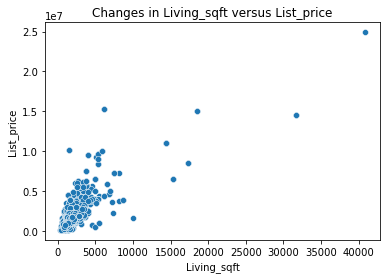

In [17]:
#draw scatter plot for the relation between living_sqft and List_price 
sns.scatterplot(x="Living_sqft",
                    y="List_price",
                    data=df)
# sns.regplot('Living_sqft','List_price',data=df)
plt.title('Changes in %s versus %s' %('Living_sqft','List_price'))

(0.0, 14000000.0)

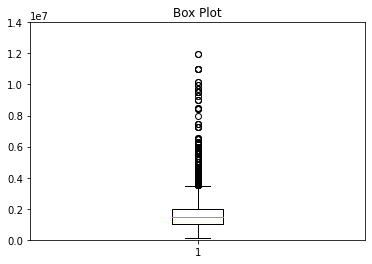

In [21]:
# draw boxplot to see the distribution of data inside List_price
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
#fig1.suptitle('Box Plot')
ax1.boxplot(df['List_price'])
ax1.set_ylim([0, 14000000]) #function boxplot returns to a dictionary, contains the following keys. 
# plt.show()

## Living_sqft

<AxesSubplot:title={'center':'Comparison over Age Group'}>

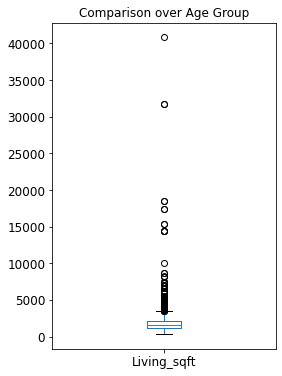

In [18]:
# Check the living_sqft
df['Living_sqft'].plot.box(title = 'Comparison over Age Group', figsize = (4,6), fontsize = 12)

In [19]:
# We will assume that any value more than 7000 sqft is an outlier
(df['Living_sqft']> 7000).sum() # No. of rows with outliers

25

In [20]:
#Drop the 25 rows with extreme values 
df.drop(df[df['Living_sqft']> 7000].index, inplace = True)

In [26]:
df.shape

(2837, 37)

<AxesSubplot:title={'center':'Living SQFT Distribution '}>

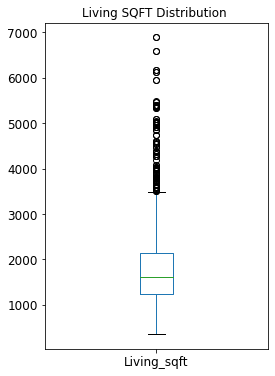

In [22]:
# Check the living_sqft after removing extreme values
df['Living_sqft'].plot.box(title = 'Living SQFT Distribution ', figsize = (4,6), fontsize = 12)

(0.0, 16060292.08045978)

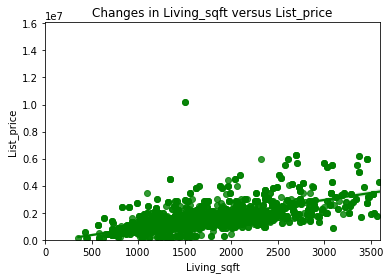

In [27]:
# Checking the variation of List_price with living_sqft using regplot
g = sns.regplot(x = 'Living_sqft',y = 'List_price',data=df, color = 'green')
plt.title('Changes in %s versus %s' %('Living_sqft','List_price'))
g.set_xlim(0, 3600)
g.set_ylim(0,)

## Beds

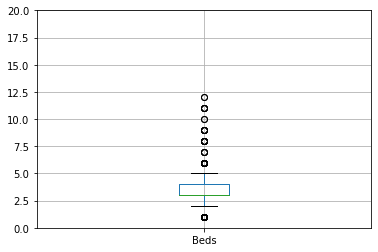

In [23]:
#Draw a box plot for beds
fig, ax = plt.subplots()
box = df.loc[:, ['Beds']].boxplot()
# ax.margins(y=0.05)
ax.set_ylim([0, 20])# the y_limit is set to 20 for the whiskers to be visisble on the plot.
plt.show()

In [29]:
df.drop(index = list(df[(df['Beds'] > 7)].index), inplace = True) 
#finding the rows with beds greater than 7 (deleting the outliers)

In [30]:
df.Beds.isna().sum() & df.Baths.isna().sum() ##sum the records have null values in both beds and baths if any

69

In [24]:
#dropping records have null values in both beds and baths 
df.dropna(subset=['Beds','Baths'],how='all', inplace = True) 

Text(0.5, 1.0, 'Changes in Beds versus List_price')

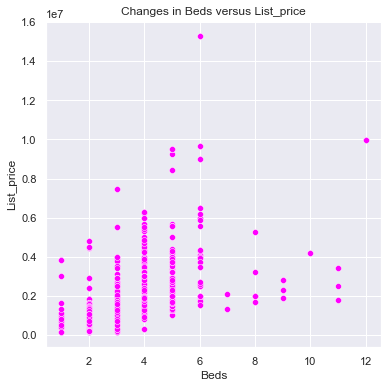

In [25]:
# check the number of beds relation with price using scatter plot 
sns.set(rc = {'figure.figsize':(6,6)})
sns.scatterplot(x= 'Beds',y = 'List_price',data=df, color = 'magenta')
plt.title('Changes in %s versus %s' %('Beds','List_price'))

## Baths

In [29]:
#check the null values in baths if any
df.Baths.isna().sum()

0

In [28]:
#fill the missing values baths with median value
df["Baths"] = df["Baths"].fillna(value = df['Baths'].median())
print(df.shape)
df.Baths.isna().sum()

(2768, 37)


0

Text(0.5, 1.0, 'Changes in Baths versus List_price')

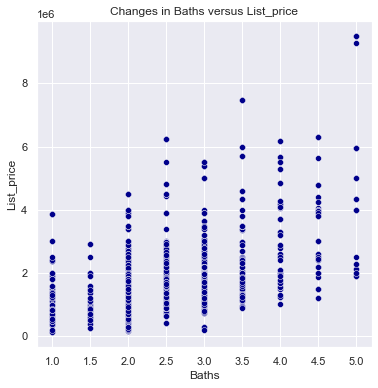

In [32]:
# Scatter plot the relation between prices and baths
sns.set(rc = {'figure.figsize':(6,6)})
sns.scatterplot(x= 'Baths',y = 'List_price',data=df, color = 'darkblue')
plt.title('Changes in %s versus %s' %('Baths','List_price'))

In [36]:
# Most of the distribution is in under 5 baths so will drop the records with more than 5 baths
df.drop(index = list(df[(df['Baths'] >5)].index), inplace = True)

Text(0.5, 1.0, 'Changes in Baths versus List_price')

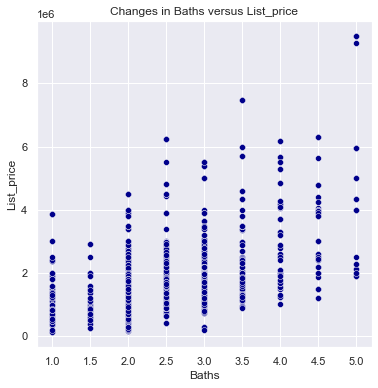

In [34]:
# Scatter plot the relation between prices and the # of baths
sns.set(rc = {'figure.figsize':(6,6)})
sns.scatterplot(x= 'Baths',y = 'List_price',data=df, color = 'darkblue')
plt.title('Changes in %s versus %s' %('Baths','List_price'))

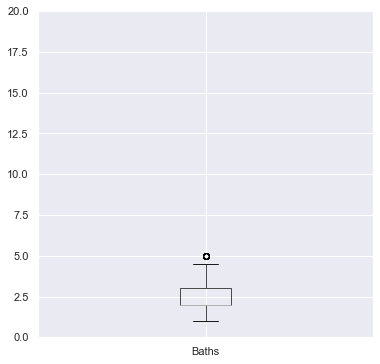

In [35]:
#Drawing boxplot to see the distribution after droping residential units with more than 5 baths 
fig, ax = plt.subplots()
box = df.loc[:, ['Baths']].boxplot()
# ax.margins(y=0.05)
ax.set_ylim([0, 20])# the y_limit is set to 20 for the whiskers to be visisble on the plot.
plt.show()

## Drought Score 

In [37]:
#check the null values in Drought_Score if any 
df.Drought_Score.value_counts()

66.0    1198
71.0      11
61.0       7
60.0       5
64.0       4
62.0       4
65.0       4
67.0       2
Name: Drought_Score, dtype: int64

In [38]:
#Filling the null values using forward fill method
df['Drought_Score'] = df.Drought_Score.fillna(method = 'ffill')

Text(0.5, 1.0, 'Changes in Drought_Score versus List_price')

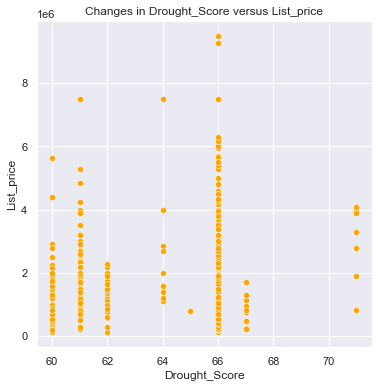

In [39]:
# Scatter plot of Drought_Score vs list price
sns.set(rc = {'figure.figsize':(6,6)})
sns.scatterplot(x= 'Drought_Score',y = 'List_price',data=df, color = 'orange')
plt.title('Changes in %s versus %s' %('Drought_Score','List_price'))

## Transit Score

In [42]:
#check the null values in Transit scores if any and fill using forward filling method
df['Transit_score'] = df.Transit_score.fillna(method = 'ffill')
df.Transit_score.isna().sum()

0

Text(0.5, 1.0, 'Changes in Drought_Score versus List_price')

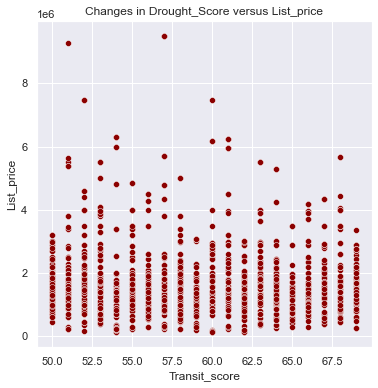

In [43]:
# Check the relation between transit score and price
sns.set(rc = {'figure.figsize':(6,6)})
sns.scatterplot(x= 'Transit_score',y = 'List_price',data=df, color = 'darkred')
plt.title('Changes in %s versus %s' %('Drought_Score','List_price'))

## Neighbourhood_Homes

In [45]:
df.dropna(subset=['Neighbourhood_Homes','Year Built'],how='all', inplace = True) 
#dropping records which have null values in both 'Neighbourhood_Homes' and'Year Built' 

In [46]:
#filling the remaining null records of "Neighbourhood_Homes" with median values. 
df.Neighbourhood_Homes.fillna(df.Neighbourhood_Homes.median(), inplace = True)
df.Neighbourhood_Homes.isna().sum()

0

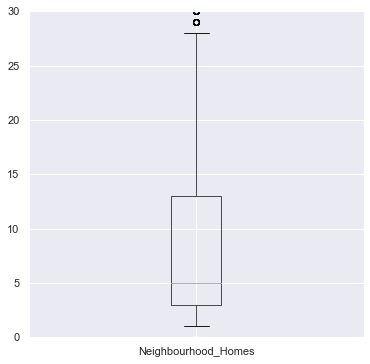

In [47]:
# Draw boxplot to check the data distribution 
fig, ax = plt.subplots()
box = housing_df.loc[:, ['Neighbourhood_Homes']].boxplot()
# ax.margins(y=0.05
ax.set_ylim([0, 60])# the y_limit is set to 60 to include all the values for the whiskers to be visisble on the plot.
plt.show()

In [48]:
# checking the records that are more than 29 
(df['Neighbourhood_Homes']> 29).sum()

269

In [49]:
# To assure accuracy we decided to remove those extrems
df.drop(df[df['Neighbourhood_Homes']> 29].index, inplace = True) # dropping outliers of nbhd_homes sold

## Est. Mo. Payment 

In [50]:
df.dropna(subset = ['Est. Mo. Payment'],inplace = True)

In [51]:
# During web scraping we get plus signs, commas so we will remove them 
# cleaning EST.Mo.Payment
df['Est. Mo. Payment'] = df['Est. Mo. Payment'].replace("\$","", regex = True)
df['Est. Mo. Payment'] = df['Est. Mo. Payment'].replace(",","", regex = True)
#converting data type to float for smoother calculations 
df['Est. Mo. Payment'] = df['Est. Mo. Payment'].astype('float')

In [52]:
#check for nulls
df['Est. Mo. Payment'].isna().sum()

0

## Dropped columns - HOA Dues, Time on Redfin, status, page_fav_all_time_count, page_fav_count_30, page_view_count

In [54]:
#dropping HOA dues, Time on redfin, 'page_fav_all_time_count', 'page_fav_count_30', 'page_view_count' as the missing values are more and status column because it does not 
#add any business value
df.drop(columns = ['HOA Dues', 'Time on Redfin', 'Status','page_fav_all_time_count',
                   'page_fav_count_30', 'page_view_count'], inplace = True)


## Year Built

In [56]:
#dropping the missing value records
df.dropna(subset = ['Year Built'],inplace = True)

In [57]:
df.shape

(2338, 31)

## Address

In [58]:
#splitting the address column

In [59]:
df['Zipcode'] = df["Address"].str[-5:]
df.Zipcode

0       94538
1       94538
2       94538
3       94555
4       94560
        ...  
2846    94566
2847    94588
2848    94566
2850    94566
2855    94588
Name: Zipcode, Length: 2338, dtype: object

## Price_Sq_Ft_

In [61]:
#After web scraping we get plus signs, commas so we will remove them 
# cleaning EST.Mo.Payment and changing data type to float
df['Price/Sq.Ft.'] = df['Price/Sq.Ft.'].replace("\$","", regex = True)
df['Price/Sq.Ft.'] = df['Price/Sq.Ft.'].replace(",","", regex = True)
df['Price/Sq.Ft.'] = df['Price/Sq.Ft.'].astype('float')

## Schools

In [62]:
df.Schools.dtypes

dtype('O')

In [63]:
#check the values in Schools variable
df.Schools.iloc[10:20]

10    [{'Fred E. Weibel Elementary School': '7', 'Jo...
11    [{'Oliveira Elementary School': '7', 'Thornton...
12                                                 [{}]
13    [{'Tom Kitayama Elementary School': '7', 'Cesa...
14    [{'Ardenwood Elementary School': '7', 'Thornto...
15    [{'John F. Kennedy Elementary School': '6', 'N...
16    [{'Ardenwood Elementary School': '7', 'Thornto...
17    [{'Cabrillo Elementary School': '5', 'Centervi...
18    [{'Fred E. Weibel Elementary School': '7', 'Ja...
19    [{'Niles Elementary School': '8', 'Centerville...
Name: Schools, dtype: object

In [64]:
# Define number of schools 
num_schools = []

for i in range(len(df.Schools)):
    try:
        x = df.Schools[i][1:-1].replace("\'", "\"") #using escape sequence to convert single quotes to double quotes in a string
        y = json.loads(x)
        num_schools.append(len(list(y.keys()))) 
    except:
        num_schools.append(np.nan)                   
num_schools

[3,
 3,
 3,
 3,
 3,
 3,
 4,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 nan,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 nan,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 nan,
 3,
 3,
 3,
 4,
 3,
 3,
 nan,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 nan,
 3,
 3,
 3,
 nan,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 0,
 3,
 3,
 nan,
 3,
 3,
 4,
 4,
 nan,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 nan,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 0,
 3,
 0,
 3,
 nan,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,


In [65]:
# defing avg_rating
avg_rating = []
for i in range(len(df.Schools)):
    try:
        x = df.Schools[i][1:-1].replace("\'", "\"") #using escape sequence to convert single quotes to double quotes in a string
        y = json.loads(x)
        values = list(y.values())
        float_lst = [float(item) for item in values]
        avg_rating.append(sum(list(float_lst))/len(list(float_lst)))
    except:
        avg_rating.append(np.nan)                   
avg_rating

[6.666666666666667,
 6.333333333333333,
 6.0,
 8.0,
 nan,
 7.333333333333333,
 nan,
 nan,
 6.333333333333333,
 7.0,
 7.333333333333333,
 7.666666666666667,
 nan,
 6.333333333333333,
 7.666666666666667,
 5.0,
 7.666666666666667,
 6.0,
 nan,
 7.0,
 nan,
 7.333333333333333,
 6.333333333333333,
 nan,
 6.333333333333333,
 5.0,
 7.666666666666667,
 7.666666666666667,
 7.666666666666667,
 7.0,
 8.0,
 7.0,
 7.666666666666667,
 7.0,
 nan,
 9.0,
 7.333333333333333,
 nan,
 8.333333333333334,
 nan,
 7.0,
 7.0,
 7.666666666666667,
 7.0,
 nan,
 9.0,
 7.333333333333333,
 7.0,
 6.333333333333333,
 nan,
 8.333333333333334,
 6.333333333333333,
 nan,
 8.0,
 6.666666666666667,
 8.666666666666666,
 5.0,
 7.666666666666667,
 7.0,
 7.0,
 7.0,
 8.333333333333334,
 7.0,
 7.666666666666667,
 6.0,
 7.666666666666667,
 7.0,
 nan,
 nan,
 7.0,
 7.666666666666667,
 7.333333333333333,
 7.666666666666667,
 nan,
 7.0,
 nan,
 6.333333333333333,
 6.333333333333333,
 7.0,
 nan,
 6.333333333333333,
 7.0,
 nan,
 6.333333333

In [66]:
df = df.assign(No_of_Schools= num_schools)
df = df.assign(Average_rating= avg_rating)
df.head(2)

,List_price,Address,Beds,Baths,Living_sqft,Property Type,Year Built,Est. Mo. Payment,Price/Sq.Ft.,Drought_Score,...,has_chinese_restaurant,has_mexican_restaurant,has_boba,has_starbucks,property_url,has_healthcare_support,has_mall,Zipcode,No_of_Schools,Average_rating
0,1599000.0,"40519 Blacow Rd,Fremont, CA 94538",4.0,3.0,1763.0,Single,1960.0,8947.0,907.0,66.0,...,1,1,1,1,https://www.redfin.com//CA/Fremont/40519-Blaco...,0,1,94538,3.0,6.666667
1,799000.0,"39951 Fremont Blvd #325,Fremont, CA 94538",2.0,2.0,1465.0,Condo,1987.0,4471.0,545.0,66.0,...,1,1,1,1,https://www.redfin.com//CA/Fremont/39951-Fremo...,0,0,94538,3.0,6.333333


In [67]:
df.columns

Index(['List_price', 'Address', 'Beds', 'Baths', 'Living_sqft',
       'Property Type', 'Year Built', 'Est. Mo. Payment', 'Price/Sq.Ft.',
       'Drought_Score', 'Walk_score', 'Neighbourhood_Homes', 'Transit_score',
       'Groceries_stores', 'Services', 'Emergency', 'Shopping',
       'Food_and_Drink', 'Schools', 'Competitive_Score', 'has_supercenter',
       'has_major_indian_grocery', 'has_major_entertainment',
       'has_indian_restaurant', 'has_chinese_restaurant',
       'has_mexican_restaurant', 'has_boba', 'has_starbucks', 'property_url',
       'has_healthcare_support', 'has_mall', 'Zipcode', 'No_of_Schools',
       'Average_rating'],
      dtype='object')

In [ ]:
# Check the number of nulls in the number of schools 
sum(housing_df['No_of_Schools'].isna())

In [ ]:
# Check the number of nulls in the average rating 
sum(housing_df['Average_rating'].isna())

In [69]:
df.No_of_Schools.fillna(method = 'ffill', inplace = True) # filling null values using forward fill method

In [70]:
df.Average_rating.fillna(method = 'ffill', inplace = True) # filling null values using forward fill method

In [71]:
df.isna().sum()

List_price                    0
Address                       0
Beds                          0
Baths                         0
Living_sqft                   0
Property Type                 0
Year Built                    0
Est. Mo. Payment              0
Price/Sq.Ft.                  0
Drought_Score                 0
Walk_score                    0
Neighbourhood_Homes           0
Transit_score                 0
Groceries_stores              0
Services                      0
Emergency                     0
Shopping                      0
Food_and_Drink                0
Schools                       0
Competitive_Score           264
has_supercenter               0
has_major_indian_grocery      0
has_major_entertainment       0
has_indian_restaurant         0
has_chinese_restaurant        0
has_mexican_restaurant        0
has_boba                      0
has_starbucks                 0
property_url                  0
has_healthcare_support        0
has_mall                      0
Zipcode 

In [72]:
df.drop(columns = ['Schools'], inplace = True)

## Competetive Score

In [73]:
df.Competitive_Score.fillna(method = 'ffill', inplace = True) # filling null values using forward fill method beacuse 
#all values are within the 
#range of 90 and 100

In [74]:
df.shape

(2338, 33)

## has_healthcare_support

In [75]:
df.has_healthcare_support.value_counts()

0    2338
Name: has_healthcare_support, dtype: int64

In [76]:
df.has_healthcare_support.isna().sum()

0

In [77]:
#dropping the has_healthcare_support because all values are zeros, no influence on the list price. 
df.drop(columns = ['has_healthcare_support'], inplace = True)

## Property type

In [78]:
df['Property Type'].value_counts() 

Single          1407
Condo            573
Townhouse        233
Double-Wide       55
Duplex            20
Fourplex          16
Single-Wide       15
Multi-Family       6
5+                 4
Triplex            3
Triple-Wide        2
Other              2
Townhome           2
Name: Property Type, dtype: int64

In [79]:
df_out = df[(df['Property Type'] == 'Single') | (df['Property Type'] == 'Condo') | (df['Property Type'] == 'Townhouse')] 

In [80]:
df_out.to_csv("Cleaned_Draft1.csv", index = False)

In [81]:
df1= pd.read_csv('Cleaned_Draft1.csv')

In [82]:
df1.shape

(2213, 32)

In [83]:
df1.columns

Index(['List_price', 'Address', 'Beds', 'Baths', 'Living_sqft',
       'Property Type', 'Year Built', 'Est. Mo. Payment', 'Price/Sq.Ft.',
       'Drought_Score', 'Walk_score', 'Neighbourhood_Homes', 'Transit_score',
       'Groceries_stores', 'Services', 'Emergency', 'Shopping',
       'Food_and_Drink', 'Competitive_Score', 'has_supercenter',
       'has_major_indian_grocery', 'has_major_entertainment',
       'has_indian_restaurant', 'has_chinese_restaurant',
       'has_mexican_restaurant', 'has_boba', 'has_starbucks', 'property_url',
       'has_mall', 'Zipcode', 'No_of_Schools', 'Average_rating'],
      dtype='object')

## Splitting the Address

In [84]:
# Splitting the address
Address = []
City = []
State = []
for i in range(0,len(df1)):
    try:
        a = df1["Address"][i].split(",")
        Address.append(a[0])
    except:
        Address.append(np.nan)
    try:
        City.append(a[-2])
    except:    
        City.append(np.nan)
    try:
        State.append(a[-1])
    except:
        State.append(np.nan)
df1['Address'] = Address
df1.insert(2, 'City', City)  
df1.insert(3, 'State', State)
df1.head(3)

,List_price,Address,City,State,Beds,Baths,Living_sqft,Property Type,Year Built,Est. Mo. Payment,...,has_indian_restaurant,has_chinese_restaurant,has_mexican_restaurant,has_boba,has_starbucks,property_url,has_mall,Zipcode,No_of_Schools,Average_rating
0,1599000.0,40519 Blacow Rd,Fremont,CA 94538,4.0,3.0,1763.0,Single,1960.0,8947.0,...,1,1,1,1,1,https://www.redfin.com//CA/Fremont/40519-Blaco...,1,94538,3.0,6.666667
1,799000.0,39951 Fremont Blvd #325,Fremont,CA 94538,2.0,2.0,1465.0,Condo,1987.0,4471.0,...,1,1,1,1,1,https://www.redfin.com//CA/Fremont/39951-Fremo...,0,94538,3.0,6.333333
2,1480000.0,40219 Laiolo Rd,FREMONT,CA 94538,3.0,2.0,1169.0,Single,1959.0,8282.0,...,1,1,1,1,1,https://www.redfin.com//CA/Fremont/40219-Laiol...,0,94538,3.0,6.000000


In [85]:
df1.City.value_counts().index

Index(['Fremont', 'SAN JOSE', 'SUNNYVALE', 'Hayward', 'SANTA CLARA', 'FREMONT',
       'CUPERTINO', 'PALO ALTO', 'Pleasanton', 'Dublin', 'San Ramon',
       'HAYWARD', 'Newark', 'Santa Clara', 'Sunnyvale', 'San Jose',
       'PLEASANTON', 'CAMPBELL', 'DUBLIN', 'LOS ALTOS', 'Palo Alto',
       'Union City', 'SARATOGA', 'MOUNTAIN VIEW', 'MENLO PARK', 'Cupertino',
       'MILPITAS', 'SAN RAMON', 'LOS GATOS', 'LOS ALTOS HILLS', 'Danville',
       'ALVISO', 'Milpitas', 'UNION CITY', 'EAST PALO ALTO', 'NEWARK'],
      dtype='object')

In [86]:
# Defining Santa Clara and Alameda counties
santa_clara_county = ['SAN JOSE', 'SUNNYVALE', 'SANTA CLARA', 
                       'PALO ALTO', 'CUPERTINO', 'San Jose',  
                       'Santa Clara', 'Sunnyvale', 'LOS ALTOS', 
                       'LOS ALTOS HILLS', 'CAMPBELL', 'Palo Alto',
                      'MOUNTAIN VIEW', 'SARATOGA', 'Cupertino', 
                       'LOS GATOS', 'MILPITAS', 'EAST PALO ALTO', 'Milpitas']

def county(x):
    if x in santa_clara_county:
        return 'Santa Clara'
    else:
        return 'Alameda'

df1['County'] = df1['City'].apply(lambda x: county(x))

In [88]:
df1.State.value_counts()

 CA 94539         193
 CA 94536         168
 CA 95014         140
 CA 95051         123
 CA 94538         114
                 ... 
 CA 95002           2
 CA 94544-8714      1
 CA 94538-2838      1
 CA 94541-3940      1
 CA 94555-3513      1
Name: State, Length: 76, dtype: int64

In [89]:
#refilling the state column with CA
df1.State = 'CA'

In [90]:
df1.State.value_counts()

CA    2213
Name: State, dtype: int64

In [94]:
# Convert City to upper case
df1['City'] = df1.City.str.upper()

In [95]:
df1['City']

0          FREMONT
1          FREMONT
2          FREMONT
3          FREMONT
4           NEWARK
           ...    
2208    PLEASANTON
2209    PLEASANTON
2210    PLEASANTON
2211    PLEASANTON
2212    PLEASANTON
Name: City, Length: 2213, dtype: object

In [97]:
# We therefore strip trailing spaces and replace the remaining spaces 
# with an underscore _. Instead of using the `rename` method, we 
# create a modified copy of `columns` and assign to the `columns` 
# field of the dataframe.
print('Modified column titles with no space and one word for titles:')
df1.columns = [s.strip().replace(' ', '_') for s in df1.columns]
df1.columns = [s.strip().replace('/', '_') for s in df1.columns]
df1.columns = [s.strip().replace('.', '_') for s in df1.columns]
df1.columns

Modified column titles with no space and one word for titles:


Index(['List_price', 'Address', 'City', 'State', 'Beds', 'Baths',
       'Living_sqft', 'Property_Type', 'Year_Built', 'Est__Mo__Payment',
       'Price_Sq_Ft_', 'Drought_Score', 'Walk_score', 'Neighbourhood_Homes',
       'Transit_score', 'Groceries_stores', 'Services', 'Emergency',
       'Shopping', 'Food_and_Drink', 'Competitive_Score', 'has_supercenter',
       'has_major_indian_grocery', 'has_major_entertainment',
       'has_indian_restaurant', 'has_chinese_restaurant',
       'has_mexican_restaurant', 'has_boba', 'has_starbucks', 'property_url',
       'has_mall', 'Zipcode', 'No_of_Schools', 'Average_rating', 'County'],
      dtype='object')

In [98]:
df1.columns

Index(['List_price', 'Address', 'City', 'State', 'Beds', 'Baths',
       'Living_sqft', 'Property_Type', 'Year_Built', 'Est__Mo__Payment',
       'Price_Sq_Ft_', 'Drought_Score', 'Walk_score', 'Neighbourhood_Homes',
       'Transit_score', 'Groceries_stores', 'Services', 'Emergency',
       'Shopping', 'Food_and_Drink', 'Competitive_Score', 'has_supercenter',
       'has_major_indian_grocery', 'has_major_entertainment',
       'has_indian_restaurant', 'has_chinese_restaurant',
       'has_mexican_restaurant', 'has_boba', 'has_starbucks', 'property_url',
       'has_mall', 'Zipcode', 'No_of_Schools', 'Average_rating', 'County'],
      dtype='object')

In [99]:
len(df1.columns)

35

In [100]:
df1.to_csv('Cleaned_data.csv', index = False)